# **Project in IR - Create a Seach Engine for Medical IR**


> - **Authors:**
  - Gargiulo Elio - 869184
  - Piacente Cristian - 866020
- **Course:** Information Retrieval
- **A.Y:** 2024/25
- **University:** Milano Bicocca - Master Degree in Computer Science


> The goal of this project is to develop a search engine capable of retrieving relevant answers to user queries
expressed in natural language. The queries are natural health-related questions harvested from
the NutritionFacts.org website. The goal is to create a search engine that will leverage an index of medical
documents to answer these questions using PyTerrier.

## **Libraries and Importing**

### **Libraries & Configuration**

In [1]:
# For IR tasks
!pip install beir
from beir import util, LoggingHandler
from beir.datasets.data_loader import GenericDataLoader

# For general use
import logging
import pathlib, os
import warnings
warnings.filterwarnings("ignore")  # Improve readability in PyTerrier

# For dataframes
import pandas as pd
pd.set_option('display.max_colwidth', 300)

# For Part I
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re
# Download punkt and stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
# Config
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# For PyTerrier
!pip install python-terrier
import pyterrier as pt

if not pt.started():
  pt.init()

# For Query Expansion
!pip install spacy
!python -m spacy download en_core_web_md
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.2/219.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.2 MB/s eta 0:00:00
  Created wheel for beir: filename=beir-2.0.0-py3-none-any.whl size=63550 sha256=d720ccf0a319b4d7a6b1521af654d4dcf1bcac246f8a275788c893afbaa1c427
  Stored in directory: /root/.cache/pip/wheels/87/4d/5d/5b20c57488e83fc5dab7a9a3442c0555b6c4094d1504a22ac3
  Created wheel for pyt

/usr/local/lib/python3.11/dist-packages/beir/util.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.4/163.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.9/347.9 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.0 MB/s eta 0:00:00
  Created wheel for chest: filename=chest-0.2.3-py3-none-any.whl size=7611 sha256=d6e77c24d366552ac6bc202d021fe63c927e43a800ac658912c2da15b2ec9f6a
  Stored in directory: /root/.cache/pip/wheels/48/57/13

Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
<ipython-input-1-1d1107e99b9e>:41: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### **Importing the Data**

> This part will focus on importing the data correctly, using the code provided by ELearning.

In [2]:
#### Just some code to print debug information to stdout
logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])
#### /print debug information to stdout

#### Download NFCorpus.zip dataset and unzip the dataset
dataset = "nfcorpus"
url = "https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{}.zip".format(dataset)
out_dir = os.path.join(pathlib.Path('./').parent.absolute(), "datasets")
data_path = util.download_and_unzip(url, out_dir)

#### Provide the data_path where NFCorpus has been downloaded and unzipped
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")

/content/datasets/nfcorpus.zip:   0%|          | 0.00/2.34M [00:00<?, ?iB/s]

  0%|          | 0/3633 [00:00<?, ?it/s]

#### **Documents**

> Importing and short analysis of Documents

In [3]:
data = pd.DataFrame.from_dict(corpus, orient='index')
data['doc_id'] = data.index
data.reset_index(drop=True, inplace=True)
data.head()

text  \
0  Recent studies have suggested that statins, an established drug group in the prevention of cardiovascular mortality, could delay or prevent breast cancer recurrence but the effect on disease-specific mortality remains unclear. We evaluated risk of breast cancer death among statin users in a popu...   
1  BACKGROUND: Preclinical studies have shown that statins, particularly simvastatin, can prevent growth in breast cancer cell lines and animal models. We investigated whether statins used after breast cancer diagnosis reduced the risk of breast cancer-specific, or all-cause, mortality in a large c...   
2  The aims of this study were to determine the concentrations of 4-nonylphenol (NP) and 4-octylphenol (OP) in 59 human milk samples and to examine related factors including mothers' demographics and dietary habits. Women who consumed over the median amount of cooking oil had significantly higher O...   
3  Epilepsy or seizure disorder is one of the most common neurological diseases in humans. Although genetic mutations in ion channels and receptors and some other risk factors such as brain injury are linked to epileptogenesis, the underlying cause for the majority of epilepsy cases remains unknown...   
4  Hit Reaction Time latencies (HRT) in the Continuous Performance Test (CPT) measure the speed of visual information processing. The latencies may involve different neuropsychological functions depending on the time from test initiation, i.e., first orientation, learning and habituation, then cogn...   

                                                                                                      title  \
0                             Statin Use and Breast Cancer Survival: A Nationwide Cohort Study from Finland   
1                Statin use after diagnosis of breast cancer and survival: a population-based cohort study.   
2                       Alkylphenols in human milk and their relations to dietary habits in central Taiwan.   
3                      Methylmercury: A Potential Environmental Risk Factor Contributing to Epileptogenesis   
4  Sensitivity of Continuous Performance Test (CPT) at Age 14 Years to Developmental Methylmercury Exposure   

    doc_id  
0   MED-10  
1   MED-14  
2  MED-118  
3  MED-301  
4  MED-306

In [4]:
data.shape

(3633, 3)

#### **Queries**

> Importing and short analysis of Queries

In [5]:
queries = pd.DataFrame.from_dict(queries, orient='index', columns=['query_text'])
queries['query_id'] = queries.index
queries.reset_index(drop=True, inplace=True)
queries.head()

query_text  query_id
0          Do Cholesterol Statin Drugs Cause Breast Cancer?   PLAIN-2
1                       Exploiting Autophagy to Live Longer  PLAIN-12
2  How to Reduce Exposure to Alkylphenols Through Your Diet  PLAIN-23
3                 What’s Driving America’s Obesity Problem?  PLAIN-33
4                     Who Should be Careful About Curcumin?  PLAIN-44

In [6]:
queries.shape

(323, 2)

#### **Relevance Judgments**

> Importing and short analysis of QRels

In [7]:
flat_qrels = [{'query_id': query_id, 'doc_id': doc_id, 'relevance': relevance}
              for query_id, inner_dict in qrels.items()
              for doc_id, relevance in inner_dict.items()]

qrels_df = pd.DataFrame(flat_qrels)
qrels_df.sample(10)

query_id    doc_id  relevance
8302   PLAIN-2051  MED-1773          1
9169   PLAIN-2102  MED-2165          1
12009  PLAIN-3362  MED-5041          2
7782   PLAIN-1909  MED-4053          1
2159    PLAIN-660  MED-4070          1
7386   PLAIN-1877  MED-3592          1
2445    PLAIN-711  MED-1695          1
5233   PLAIN-1453  MED-1577          1
1021    PLAIN-227  MED-5335          1
2250    PLAIN-660  MED-3279          1

In [8]:
qrels_df.shape

(12334, 3)

## **PART I: Analysis of the Dataset**

> The first part of the project is focused on analyzing documents, queries and qrels, specifically their distributions, sizes and particular signs.

> The analysis will start with the tokenization, normalization (while also removing the stopwords) and stemming (with lemmatization). This will prepare the data for the plots and other analysis.

> Each section is focused on analyzing Documents (text and title), Queries (Text) and QRels.



### **Common and Useful Functions**

> Functions that will be used during the analysis part.

In [9]:
# Preprocess a text. It returns tokens, stemmed tokens and lemmatized tokens.

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercase and remove punctuation
    tokens = [word.lower() for word in tokens if word.isalnum()]
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    return tokens, stemmed_tokens, lemmatized_tokens

In [10]:
# Function to add annotations to the bars.

def add_annotations(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [11]:
# Function to create a Word Cloud.

def create_wordcloud(tokens, title=''):
    text = ' '.join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

### **Document Analysis**

#### **Document Text Analysis**

In [12]:
# Create a copy of the dataframe, to avoid modifying the original one
data_text_copy = data.copy()

# Process the documents
data_text_copy['original_text_tokens'], data_text_copy['stemmed_text_tokens'], data_text_copy['lemmatized_text_tokens'] = zip(*data_text_copy['text'].map(preprocess_text))

##### **Tokens Analysis**

In [13]:
# Compute statistics for original, stemmed, and lemmatized tokens
data_text_copy['original_term_count'] = data_text_copy['original_text_tokens'].apply(lambda x: len(set(x)))
data_text_copy['stemmed_term_count'] = data_text_copy['stemmed_text_tokens'].apply(lambda x: len(set(x)))
data_text_copy['lemmatized_term_count'] = data_text_copy['lemmatized_text_tokens'].apply(lambda x: len(set(x)))

In [14]:
data_text_copy.sample(10)

text  \
1954  INTRODUCTION: Although penile blood flow (PBF) has been recommended as an additional diagnostic test in identifying erectile dysfunction (ED) patients at risk for latent cardiovascular disease, no study has ever assessed the possible association of PBF and the relational component of sexual func...   
1194  BACKGROUND: China is increasingly facing the challenge of control of the growing burden of non-communicable diseases. We assessed the epidemiology of Alzheimer's disease and other forms of dementia in China between 1990, and 2010, to improve estimates of the burden of disease, analyse time trend...   
745   Using data from 16 published reports, the authors correlated macroscopic disc degeneration grades with age, sex, and spine level in 600 lumbar intervertebral discs from 273 cadavers (ages: 0-96 years). Male discs were more degenerated than female discs at most ages; significantly so in the secon...   
3186  BACKGROUND & AIMS: The diagnostic criteria for celiac disease require small-bowel mucosal villous atrophy with crypt hyperplasia (Marsh III). However, mucosal damage develops gradually and patients may evince clinical symptoms before histologic changes appear. Endomysial antibodies are specific ...   
3167  PURPOSE OF REVIEW: To summarize recent findings and current concepts in the beneficial effects of berry consumption on brain function during aging. RECENT FINDINGS: Berryfruit supplementation has continued to demonstrate efficacy in reversing age-related cognitive decline in animal studies. In t...   
3548  PURPOSE OF REVIEW: Brown adipose tissue (BAT), which is present in humans, plays an important role in oxidation of fatty acids and glucose. The purpose of this review is to highlight an important role for L-arginine in regulating BAT growth and development, thereby reducing obesity in mammals. R...   
2759  Left subclavian arterioesophageal fistula resulting from chicken bone ingestion is a rare occurrence. The authors report the death of a 42-year-old Thai female with mental retardation who presented to the hospital with severe hematemesis and arrested Death occurred about 24 hours after laparotom...   
3524  BACKGROUND: Hypertriglyceridemia is now accepted as a risk factor for coronary heart disease, although the mechanism behind the increased risk is not well understood. The present study was undertaken to investigate the effects of triglyceridemia on endothelial function, because impaired endothel...   
2680  Scope Observational studies have evaluated the relationship between green tea intake and cancers of the ovary and endometrium, but we are not aware of the published studies on green tea intake and risk of human papillomavirus (HPV)-related cancers of the cervix, vagina, or vulva. Methods and res...   
2516  Cui and associates show that healthy individuals have natural autoantibodies (NAAs) specific for myeloperoxidase, proteinase 3, and glomerular basement membrane (GBM) with the same specificity as anti-neutrophil cytoplasmic antibodies and anti-GBM antibodies that are pathogenic. Although Ehrlich...   

                                                                                                                                                 title  \
1954                                                     Male sexuality and cardiovascular risk. A cohort study in patients with erectile dysfunction.   
1194                            Epidemiology of Alzheimer's disease and other forms of dementia in China, 1990-2010: a systematic review and analysis.   
745                                                     Lumbar disc degeneration: correlation with age, sex, and spine level in 600 autopsy specimens.   
3186                                                              Diagnosing mild enteropathy celiac disease: a randomized, controlled clinical study.   
3167                                                                       Recent advances in berry supplementation and age-related

##### **Vocabulary Sizes**

In [15]:
# Vocabulary for each representation
original_text_vocab = set(token for doc in data_text_copy['original_text_tokens'] for token in doc)
stemmed_text_vocab = set(token for doc in data_text_copy['stemmed_text_tokens'] for token in doc)
lemmatized_text_vocab = set(token for doc in data_text_copy['lemmatized_text_tokens'] for token in doc)

In [16]:
original_text_size = len(original_text_vocab)
stemmed_text_size = len(stemmed_text_vocab)
lemmatized_text_size = len(lemmatized_text_vocab)

In [17]:
print("Vocabulary Size Analysis for Document Text:")

texts = {
    "Type": ["Original", "Stemmed", "Lemmatized"],
    "Vocabulary Size": [original_text_size, stemmed_text_size, lemmatized_text_size],
    "vs Original": [0, stemmed_text_size - original_text_size, lemmatized_text_size - original_text_size],
    "vs Stemmed": [original_text_size - stemmed_text_size, 0, lemmatized_text_size - stemmed_text_size],
    "vs Lemmatized": [original_text_size - lemmatized_text_size, stemmed_text_size - lemmatized_text_size, 0]
}

# Build the Df
df_texts = pd.DataFrame(texts)

# Print the df
df_texts

Vocabulary Size Analysis for Document Text:


Type  Vocabulary Size  vs Original  vs Stemmed  vs Lemmatized
0    Original            24283            0        7018           2266
1     Stemmed            17265        -7018           0          -4752
2  Lemmatized            22017        -2266        4752              0

##### **Text Length Distribution - Histogram**

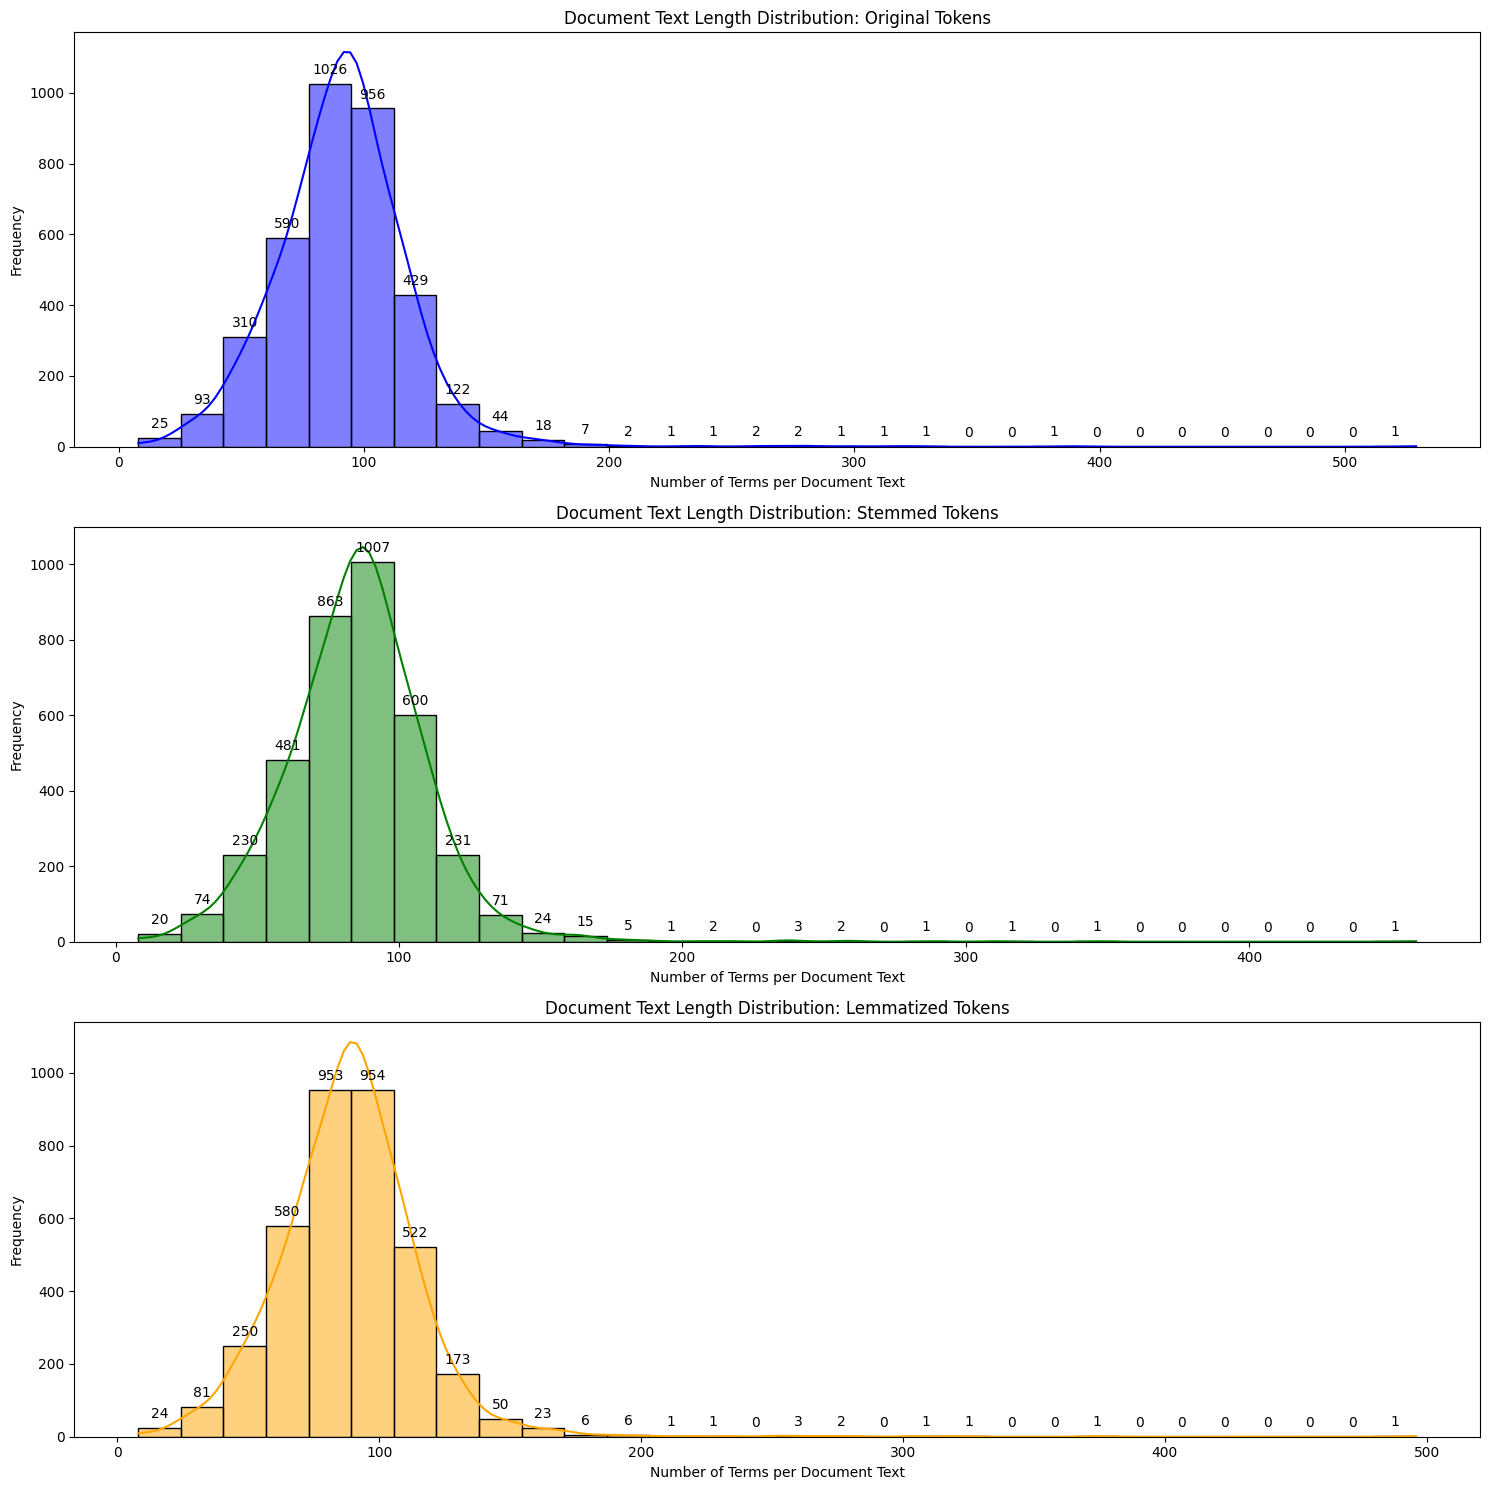

In [18]:
# Set up the figure
plt.figure(figsize=(15, 15))

# Plot Original Term Count
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
ax1 = sns.histplot(data_text_copy['original_term_count'], color='blue', kde=True, bins=30)
plt.xlabel("Number of Terms per Document Text")
plt.ylabel("Frequency")
plt.title("Document Text Length Distribution: Original Tokens")
add_annotations(ax1)

# Plot Stemmed Term Count
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
ax2 = sns.histplot(data_text_copy['stemmed_term_count'], color='green', kde=True, bins=30)
plt.xlabel("Number of Terms per Document Text")
plt.ylabel("Frequency")
plt.title("Document Text Length Distribution: Stemmed Tokens")
add_annotations(ax2)

# Plot Lemmatized Term Count
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
ax3 = sns.histplot(data_text_copy['lemmatized_term_count'], color='orange', kde=True, bins=30)
plt.xlabel("Number of Terms per Document Text")
plt.ylabel("Frequency")
plt.title("Document Text Length Distribution: Lemmatized Tokens")
add_annotations(ax3)

# Adjust layout
plt.tight_layout()
plt.show()

##### **Text Distribution - Word Cloud**

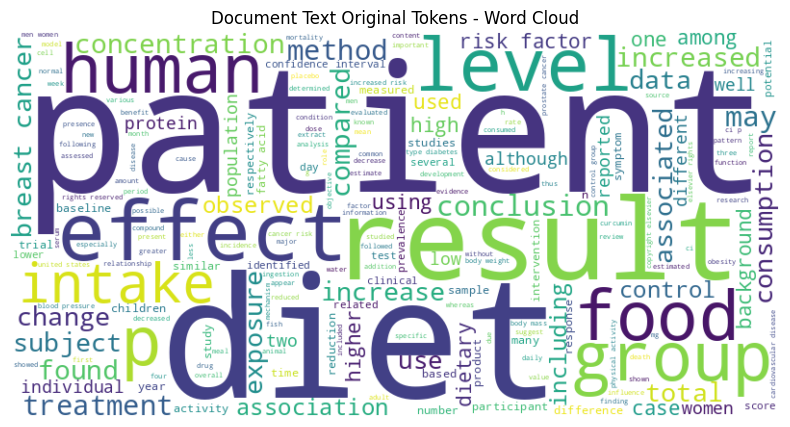

In [19]:
# Plot Original Term Count
create_wordcloud([token for sublist in data_text_copy['original_text_tokens'] for token in sublist], "Document Text Original Tokens - Word Cloud")

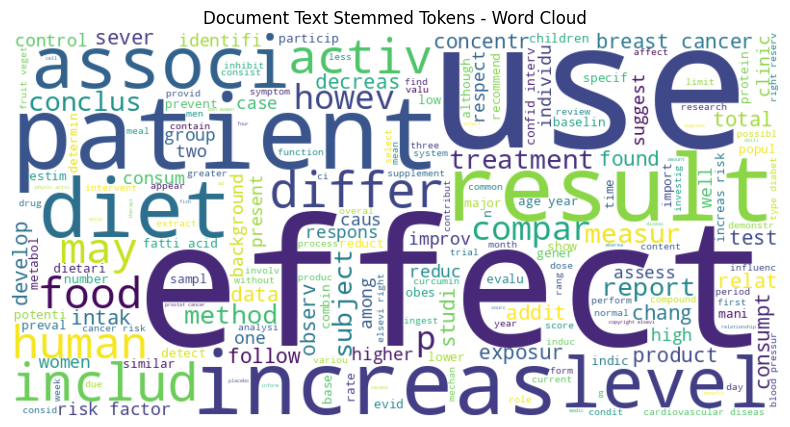

In [20]:
# Plot Stemmed Term Count
create_wordcloud([token for sublist in data_text_copy['stemmed_text_tokens'] for token in sublist], "Document Text Stemmed Tokens - Word Cloud")

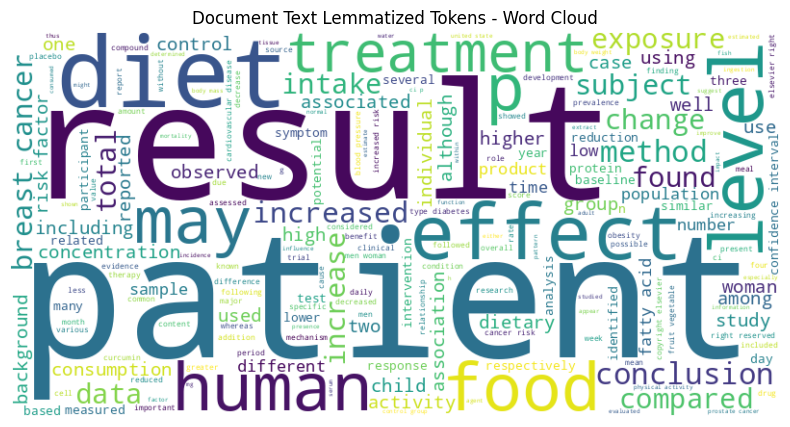

In [21]:
# Plot Lemmatized Term Count
create_wordcloud([token for sublist in data_text_copy['lemmatized_text_tokens'] for token in sublist], "Document Text Lemmatized Tokens - Word Cloud")

##### **Tails of the Distribution Analysis**

###### **Lower Tail Analysis**

In [22]:
# Filter the dataframe for the lower tail, i.e. number of terms < 25
lower_tail_text = data_text_copy[
    (data_text_copy['original_term_count'] < 25) |
    (data_text_copy['stemmed_term_count'] < 25) |
    (data_text_copy['lemmatized_term_count'] < 25)
]

# Order by original_term_count in ascending order (top 10)
lower_tail_text.sort_values(by='original_term_count', ascending=True).head(10)

text  \
216                                                                                                                                                                                           Linaclotide (Linzess) for irritable bowel syndrome with constipation and for chronic idiopathic constipation.   
1413                                                                                                                                                                                        A historical view on how our agricultural systems evolved and how they are contributing to obesity and disease.   
1511                                                                                                                                                                                                     U.S. and European regulators and researchers disagree over risks of a common class of surfactants.   
3316                                                                                                                                                                                                             Evidence supports a trial period of eliminating colourings and preservatives from the diet   
2818                                                                                                                                                                                          Purple discoloration of the large bowel at autopsy was related to beetroot ingestion and post-mortem changes.   
722                                                                                                                                                                                             ESC is to create an inventory of cardiovascular disease registries and a task force on data standardization   
3152                                                                                                                             The art of the musical anus is reviewed in the light of its most prominent performers and of anorectal physiological aspects related to this specific musical performance.   
2022  We present a case of a 14-year-old previously healthy boy with acute hepatotoxicity after noni berry juice consumption. As the popularity of noni berry consumption continues to increase, heightened awareness of the relation between noni berry consumption and acute hepatotoxicity is important.   
1285                                                                                             The global demand for more affordable therapeutics and concerns about side effects of commonly used drugs are refocusing interest on Eastern traditional medicines, particularly those of India and China.   
2251                                                                                                                      Daniel K Sokol argues that on rare occasions benignly deceiving patients can be morally acceptable, and he has devised a decision checklist to help doctors facing such a dilemma   

                                                                                                             title  \
216   Linaclotide (Linzess) for Irritable Bowel syndrome With Constipation and For Chronic Idiopathic Constipation   
1413                                                                 Agricultural policies, food and public health   
1511                                                     European bans on surfactant trigger transatlantic debate.   
3316                                                                              Food additives and hyperactivity   
2818                                                                                 The case of the purple colon.   
722                                                  Cardiovascular disease data to be standardized across Europe.   
3152                                                                            [Flatufonia--or the musical anus].   
2022           Ac

###### **Upper Tail Analysis**

In [23]:
# Filter the dataframe for the upper tail, i.e. number of terms > 200
upper_tail_text = data_text_copy[
    (data_text_copy['original_term_count'] > 200) |
    (data_text_copy['stemmed_term_count'] > 200) |
    (data_text_copy['lemmatized_term_count'] > 200)
]

# Order by original_term_count in descending order (top 10)
upper_tail_text.sort_values(by='original_term_count', ascending=False).head(10)

text  \
164   Capsicum-derived ingredients function as skin-conditioning agents--miscellaneous, external analgesics, flavoring agents, or fragrance components in cosmetics. These ingredients are used in 19 cosmetic products at concentrations as high as 5%. Cosmetic-grade material may be extracted using hexane...   
226   The present studies explored whether faecal retention in the colon is a causative factor in functional bowel disease, appendicitis, and haemorrhoids. Faecal retention was characterized by colon transit time (CTT) after radio-opaque marker ingestion and estimation of faecal loading on abdominal r...   
1402  BACKGROUND AND METHODS: We estimated the prevalence of self-reported asthma in adult Indians and examined several risk factors influencing disease prevalence. Analysis is based on 99 574 women and 56 742 men aged 20–49 years included in India’s third National Family Health Survey, 2005–2006. Mul...   
1084  BACKGROUND: Reliable and timely information on the leading causes of death in populations, and how these are changing, is a crucial input into health policy debates. In the Global Burden of Diseases, Injuries, and Risk Factors Study 2010 (GBD 2010), we aimed to estimate annual deaths for the wor...   
1276  Background There is overwhelming evidence that behavioural factors influence health, but their combined impact on the general population is less well documented. We aimed to quantify the potential combined impact of four health behaviours on mortality in men and women living in the general commu...   
478   Background Meta-analyses of antidepressant medications have reported only modest benefits over placebo treatment, and when unpublished trial data are included, the benefit falls below accepted criteria for clinical significance. Yet, the efficacy of the antidepressants may also depend on the sev...   
2961  A widespread misconception has been developing among the Canadian public and among physicians. It is increasingly believed that consumption of dietary cholesterol and egg yolks is harmless. There are good reasons for long-standing recommendations that dietary cholesterol should be limited to les...   
3543  Background Knowledge of the number of deaths caused by risk factors is needed for health policy and priority setting. Our aim was to estimate the mortality effects of the following 12 modifiable dietary, lifestyle, and metabolic risk factors in the United States (US) using consistent and compara...   
96    Hydrogen peroxide is an oxidising agent that is used in a number of household products, including general-purpose disinfectants, chlorine-free bleaches, fabric stain removers, contact lens disinfectants and hair dyes, and it is a component of some tooth whitening products. In industry, the princ...   
2055  BACKGROUND: : Jet-lag commonly affects air travellers who cross several time zones. It results from the body's internal rhythms being out of step with the day-night cycle at the destination. Melatonin is a pineal hormone that plays a central part in regulating bodily rhythms and has been used as...   

                                                                                                                                                       title  \
164   Final report on the safety assessment of capsicum annuum extract, capsicum annuum fruit extract, capsicum annuum resin, capsicum annuum fruit powde...   
226                        Faecal retention: a common cause in functional bowel disorders, appendicitis and haemorrhoids--with medical and surgical therapy.   
1402                                            Prevalence and risk factors for self-reported asthma in an adult Indian population: a cross-sectional survey   
1084  Global and regional mortality from 235 causes of death for 20 age groups in 1990 and 2010: a systematic analysis for the Global Burden of Disease S...   
1276                                      Combined Impact of Health Behaviours and Mortality in Men a

#### **Document Title Analysis**

In [24]:
# Create a copy of the dataframe, to avoid modifying the original one
data_title_copy = data.copy()

# Process the documents
data_title_copy['original_title_tokens'], data_title_copy['stemmed_title_tokens'], data_title_copy['lemmatized_title_tokens'] = zip(*data_title_copy['title'].map(preprocess_text))

##### **Tokens Analysis**

In [25]:
# Compute statistics for original, stemmed, and lemmatized tokens
data_title_copy['original_term_count'] = data_title_copy['original_title_tokens'].apply(lambda x: len(set(x)))
data_title_copy['stemmed_term_count'] = data_title_copy['stemmed_title_tokens'].apply(lambda x: len(set(x)))
data_title_copy['lemmatized_term_count'] = data_title_copy['lemmatized_title_tokens'].apply(lambda x: len(set(x)))

In [26]:
data_title_copy.sample(10)

text  \
915   As a hard tissue dental disease, dental erosion has a multifactorial etiology. The majority of dental erosion that originates from extrinsic sources is the result of dietary intake, particularly acidic beverages. Several preventive means have been proposed to minimize the damage to the dentition...   
1196  CONTEXT: Alzheimer disease (AD) represents a major and increasing public health problem. If populations were identified with significantly lower or higher incidence rates of AD, the search for risk factors in the genesis of AD could be greatly enhanced. OBJECTIVE: To compare incidence rates of d...   
2257  A group of 200 patients who presented in general practice with symptoms but no abnormal physical signs and in whom no definite diagnosis was made were randomly selected for one of four consultations: a consultation conducted in a "positive manner," with and without treatment, and a consultation ...   
860   BACKGROUND: Short-term studies in adolescents have generally shown an enhancement of calcium absorption by inulin-type fructans (prebiotics). Results have been inconsistent; however, and no studies have been conducted to determine whether this effect persists with long-term use. OBJECTIVE: The o...   
1729  Background: Methylmercury (MeHg) is a known neuro-toxicant. Emerging evidence indicates it may have adverse effects on the neuro-logic and other body systems at common low levels of exposure. Impacts of MeHg exposure could vary by individual susceptibility or be confounded by bene-ficial nutrien...   
3008  In East Greenland polar bears (Ursus maritimus), anthropogenic organohalogen compounds (OHCs) (e.g., polychlorinated biphenyls, dichlorodiphenyltrichloroethane, and polybrominated diphenyl ethers) contributed to renal lesions and are believed to reduce bone mineral density. Because OHCs are also...   
1549  PURPOSE: We reviewed studies from 1990 to 2010 on using aromatherapy for people with anxiety or anxiety symptoms and examined their clinical effects. METHODS: The review was conducted on available electronic databases to extract journal articles that evaluated the anxiolytic effects of aromather...   
1964  OBJECTIVE: To assess the association between erectile dysfunction (ED) and the long-term risk of coronary artery disease (CAD) and the role of age as a modifier of this association. PARTICIPANTS AND METHODS: From January 1, 1996, to December 31, 2005, we biennially screened a random sample of 14...   
3581  The present study investigated the effects of a diet and exercise intervention on known breast cancer (BCa) risk factors, including estrogen, obesity, insulin, and insulin-like growth factor-I (IGF-I), in overweight/obese, postmenopausal women. In addition, using the subjects' pre- and postinter...   
3091  The relation between diet, lifestyle, and acute myeloid leukemia was assessed in a US cohort of 491,163 persons from the NIH–AARP Diet and Health Study (1995–2003). A total of 338 incident cases of acute myeloid leukemia were ascertained. Multivariate Cox models were utilized to estimate hazard ...   

                                                                                                                                                       title  \
915                                                                                Influence of drinking patterns of carbonated beverages on dental erosion.   
1196  Incidence of dementia and Alzheimer disease in 2 communities: Yoruba residing in Ibadan, Nigeria, and African Americans residing in Indianapolis, I...   
2257                                                                                   General practice consultations: is there any point in being positive?   
860          A combination of prebiotic short- and long-chain inulin-type fructans enhances calcium absorption and bone mineralization in young adolescents.   
1729                                                                                Evidence on the H

##### **Vocabulary Sizes**

In [27]:
# Vocabulary for each representation
original_title_vocab = set(token for doc in data_title_copy['original_title_tokens'] for token in doc)
stemmed_title_vocab = set(token for doc in data_title_copy['stemmed_title_tokens'] for token in doc)
lemmatized_title_vocab = set(token for doc in data_title_copy['lemmatized_title_tokens'] for token in doc)

In [28]:
# Get the sizes
original_title_size = len(original_title_vocab)
stemmed_title_size = len(stemmed_title_vocab)
lemmatized_title_size = len(lemmatized_title_vocab)

In [29]:
print("Vocabulary Size Analysis for Document Title:")

titles = {
    "Type": ["Original", "Stemmed", "Lemmatized"],
    "Vocabulary Size": [original_title_size, stemmed_title_size, lemmatized_title_size],
    "vs Original": [0, stemmed_title_size - original_title_size, lemmatized_title_size - original_title_size],
    "vs Stemmed": [original_title_size - stemmed_title_size, 0, lemmatized_title_size - stemmed_title_size],
    "vs Lemmatized": [original_title_size - lemmatized_title_size, stemmed_title_size - lemmatized_title_size, 0]
}

# Build the Df
df_titles = pd.DataFrame(titles)

# Print the df
df_titles

Vocabulary Size Analysis for Document Title:


Type  Vocabulary Size  vs Original  vs Stemmed  vs Lemmatized
0    Original             6125            0        1321            529
1     Stemmed             4804        -1321           0           -792
2  Lemmatized             5596         -529         792              0

##### **Title Length Distribution - Histogram**

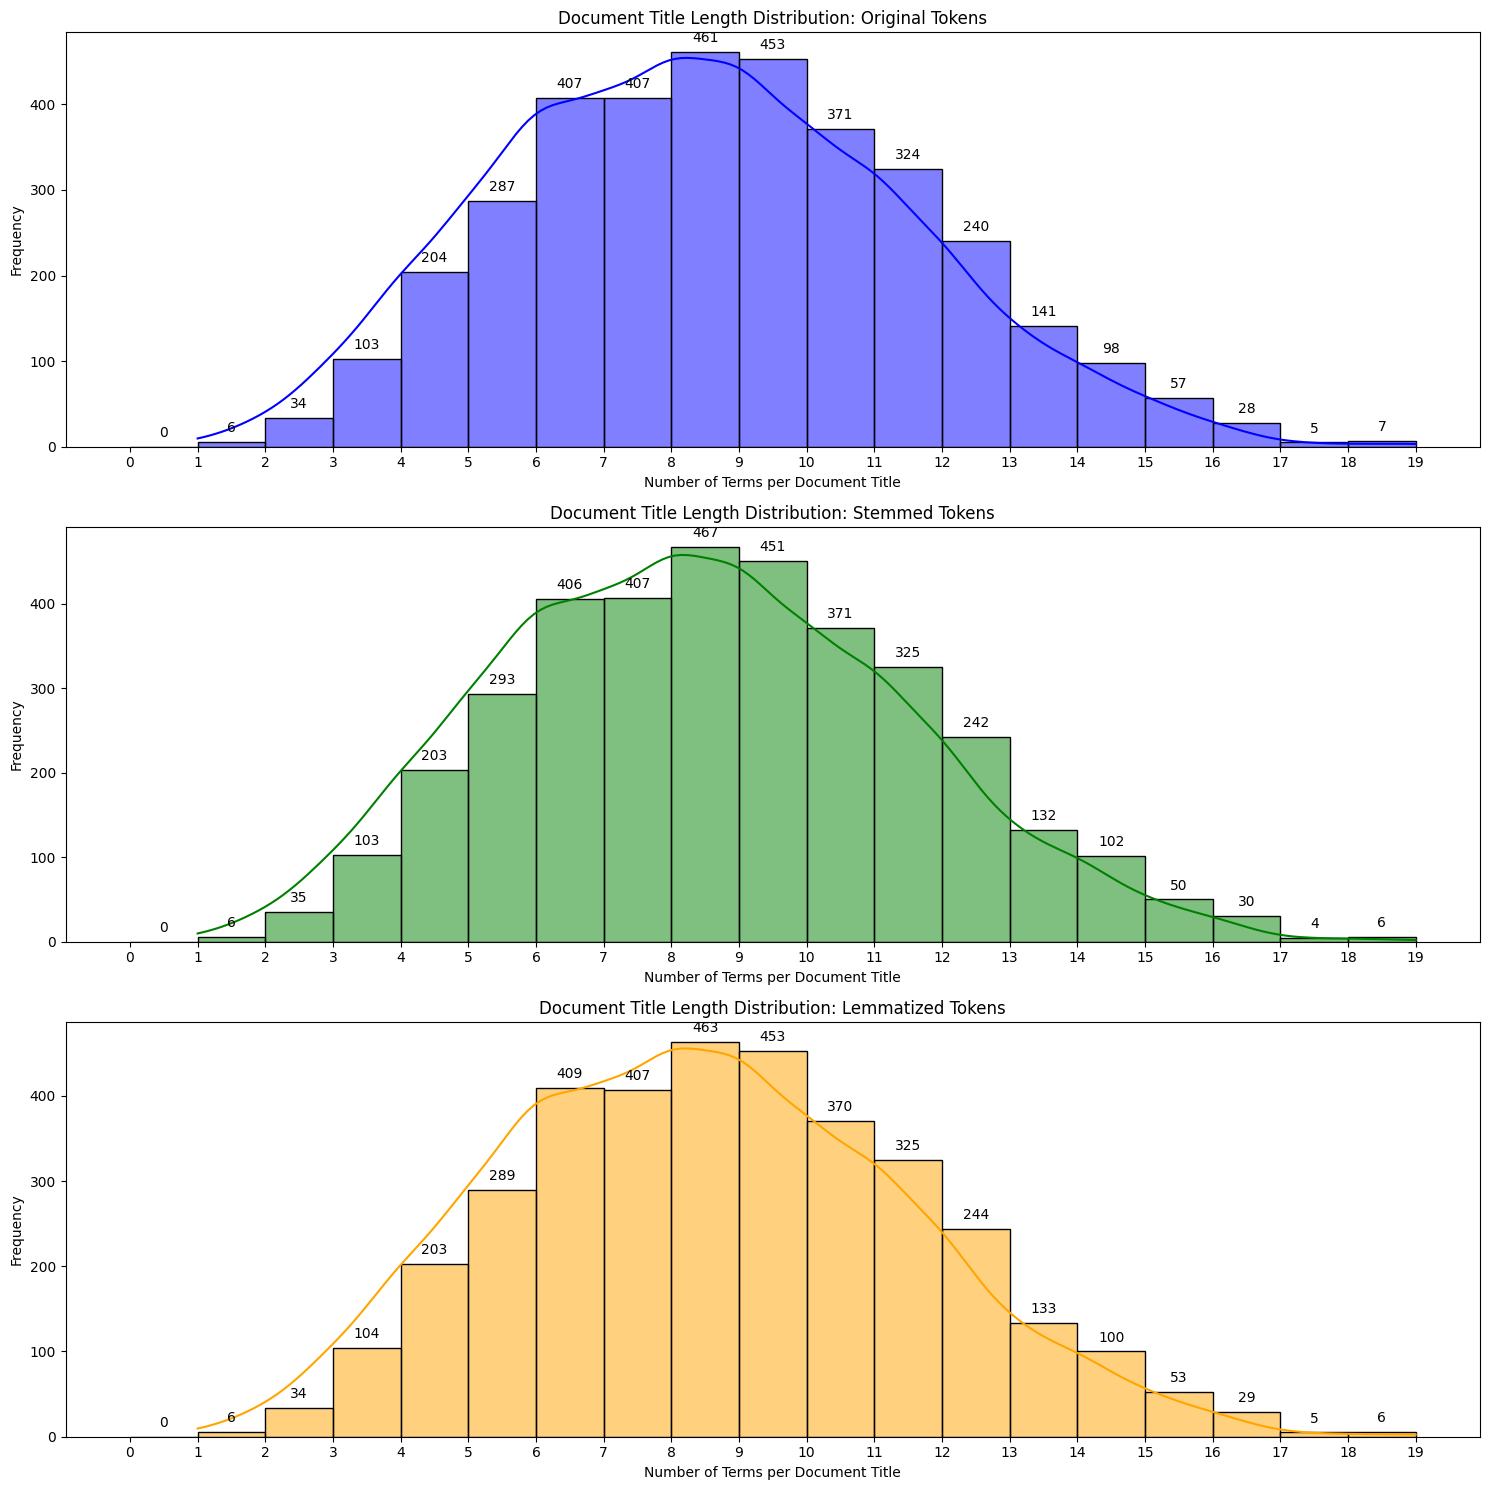

In [30]:
# Set up the figure
plt.figure(figsize=(15, 15))

# Plot Original Term Count
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
ax1 = sns.histplot(data_title_copy['original_term_count'], color='blue', kde=True, bins=np.arange(0, data_title_copy['original_term_count'].max() + 1, 1))
plt.xlabel("Number of Terms per Document Title")
plt.ylabel("Frequency")
plt.title("Document Title Length Distribution: Original Tokens")
plt.xticks(np.arange(0, data_title_copy['original_term_count'].max() + 1, 1))  # Set ticks at every bin edge
add_annotations(ax1)

# Plot Stemmed Term Count
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
ax2 = sns.histplot(data_title_copy['stemmed_term_count'], color='green', kde=True, bins=np.arange(0, data_title_copy['stemmed_term_count'].max() + 1, 1))
plt.xlabel("Number of Terms per Document Title")
plt.ylabel("Frequency")
plt.title("Document Title Length Distribution: Stemmed Tokens")
plt.xticks(np.arange(0, data_title_copy['stemmed_term_count'].max() + 1, 1))  # Set ticks at every bin edge
add_annotations(ax2)

# Plot Lemmatized Term Count
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
ax3 = sns.histplot(data_title_copy['lemmatized_term_count'], color='orange', kde=True, bins=np.arange(0, data_title_copy['lemmatized_term_count'].max() + 1, 1))
plt.xlabel("Number of Terms per Document Title")
plt.ylabel("Frequency")
plt.title("Document Title Length Distribution: Lemmatized Tokens")
plt.xticks(np.arange(0, data_title_copy['lemmatized_term_count'].max() + 1, 1))  # Set ticks at every bin edge
add_annotations(ax3)

# Adjust layout
plt.tight_layout()
plt.show()

##### **Title Distribution - Word Cloud**

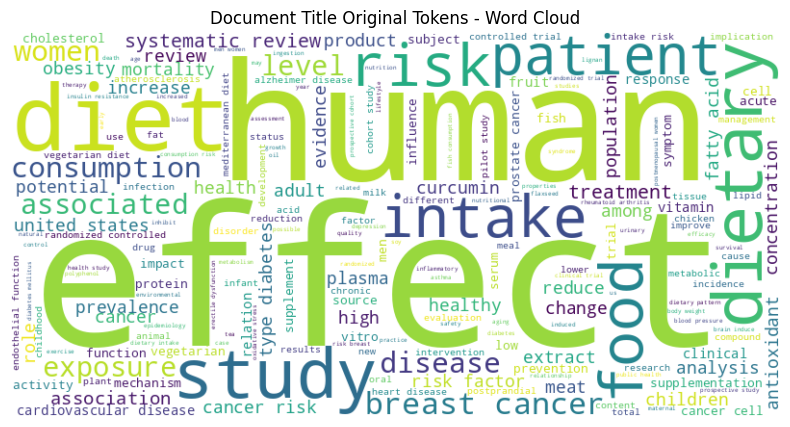

In [31]:
# Plot Original Term Count
create_wordcloud([token for sublist in data_title_copy['original_title_tokens'] for token in sublist], "Document Title Original Tokens - Word Cloud")

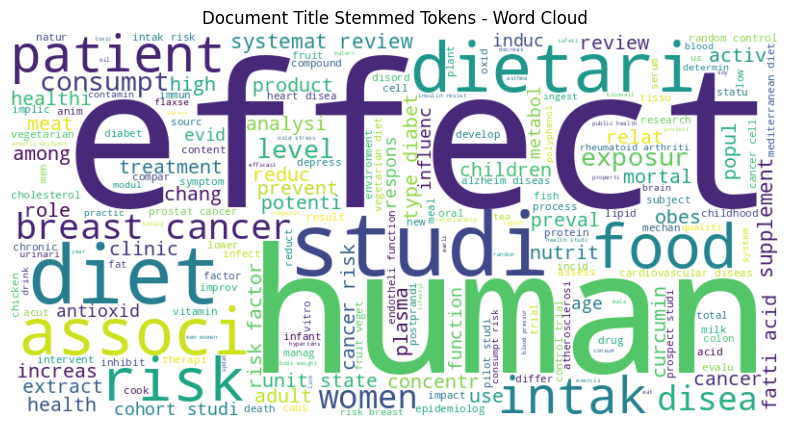

In [32]:
# Plot Stemmed Term Count
create_wordcloud([token for sublist in data_title_copy['stemmed_title_tokens'] for token in sublist], "Document Title Stemmed Tokens - Word Cloud")

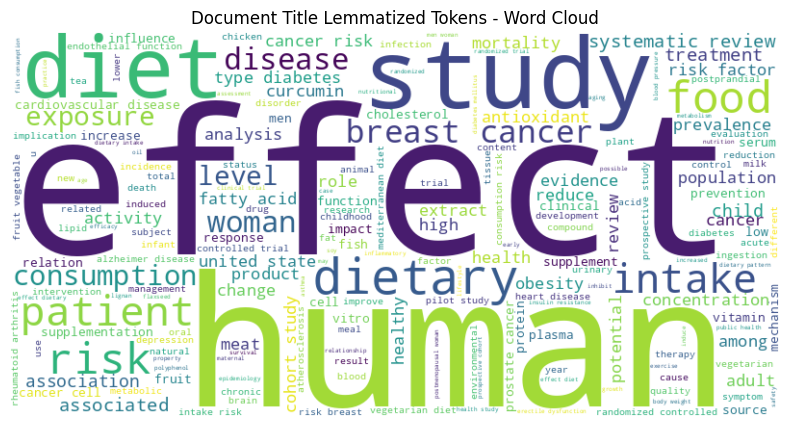

In [33]:
# Plot Lemmatized Term Count
create_wordcloud([token for sublist in data_title_copy['lemmatized_title_tokens'] for token in sublist], "Document Title Lemmatized Tokens - Word Cloud")

##### **Tails of the Distribution Analysis**

###### **Lower Tail Analysis**

In [34]:
# Filter the dataframe for the lower tail, i.e. number of terms < 3
lower_tail_title = data_title_copy[
    (data_title_copy['original_term_count'] < 3) |
    (data_title_copy['stemmed_term_count'] < 3) |
    (data_title_copy['lemmatized_term_count'] < 3)
]

# Order by original_term_count in ascending order (top 10)
lower_tail_title.sort_values(by='original_term_count', ascending=True).head(10)

text  \
11    Dysmenorrhea is the leading cause of recurrent short-term school absence in adolescent girls and a common problem in women of reproductive age. Risk factors for dysmenorrhea include nulliparity, heavy menstrual flow, smoking, and depression. Empiric therapy can be initiated based on a typical hi...   
2767  OBJECTIVE: The beneficial effects of human caffeine consumption deserve clarification. METHODS: A detailed literature review was conducted and summarized. RESULTS: A large body of scientific evidence describes the beneficial effects of human caffeine consumption on a number of physiologic system...   
2295  OBJECTIVE: To review the current management of women with breast pain. OPTIONS: The effect of various treatment modes and health practices, including medications, was considered for the management of both cyclical and noncyclical breast pain. OUTCOMES: Effective and timely management of the woma...   
2050  Melatonin has been detected in bacteria, eukaryotic unicells, macroalgae, plants, fungi and various taxa of invertebrates. Although precise determinations are missing in many of these organisms and the roles of melatonin are still unknown, investigations in some species allow more detailed concl...   
3467  Xerophthalmia and keratomalacia are public health problems of great magnitude which are usually associated with multiple vitamin and protein deficiencies. The authors report the case of a 27-year-old commune member who subjected herself to a bizarre protein and vitamin deficient diet for many mo...   
3081  Many deep-sea fishes store large amounts of wax esters in their body for buoyancy control. Some of them are frequently caught as by-catch of tuna and other fishes. The most noteworthy ones include escolar and oilfish. The accumulation of the indigestible wax esters in the rectum through consumpt...   
1083  Beyond obvious functions in haemostasis and thrombosis, platelets are considered to be essential in proinflammatory surroundings such as atherosclerosis, allergy, rheumatoid arthritis and even cancer. In atherosclerosis, platelets facilitate the recruitment of inflammatory cells towards the lesi...   
177   Introduction: Much of our knowledge and treatment of complicated diverticulitis (CD) are based on outdated literature reporting mortality rates of 10%. Practice parameters recommend elective resection after 2 episodes of diverticulitis to reduce morbidity and mortality. The aim of this study is ...   
1455  In traditional cultures, balancing health with a balanced lifestyle was a core belief. The diseases of modern civilization were rare. Indigenous people have patterns of illness very different from Western civilization; yet, they rapidly develop diseases once exposed to Western foods and lifestyl...   
1273  Aging is a natural and complex physiological process influenced by many factors, some of which are modifiable. As the number of older individuals continues to increase, it is important to develop interventions that can be easily implemented and contribute to "successful aging". In addition to a ...   

                               title    doc_id          original_title_tokens  \
11                     Dysmenorrhea.   MED-557                 [dysmenorrhea]   
2767  Caffeine-Not just a stimulant.  MED-4438                    [stimulant]   
2295                      Mastalgia.  MED-3800                    [mastalgia]   
2050       Non-vertebrate melatonin.  MED-3522                    [melatonin]   
3467                  Keratomalacia.  MED-5221                [keratomalacia]   
3081        Fish-induced keriorrhea.  MED-4811                   [keriorrhea]   
1083   Platelets in atherosclerosis.  MED-2080   [platelets, atherosclerosis]   
177       Complicated Diverticulitis   MED-974  [complicated, diverticulitis]   
1455  Traditional non-Western diets.  MED-2572           [traditional, diets]   
1273         Exercise and longevity.  MED-2300          [exercise, longevity]   

         

###### **Upper Tail Analysis**

In [35]:
# Filter the dataframe for the upper tail, i.e. number of terms > 16
upper_tail_title = data_title_copy[
    (data_title_copy['original_term_count'] > 16) |
    (data_title_copy['stemmed_term_count'] > 16) |
    (data_title_copy['lemmatized_term_count'] > 16)
]

# Order by original_term_count in descending order (top 10)
upper_tail_title.sort_values(by='original_term_count', ascending=False).head(10)

text  \
288   The effect of an uncooked extreme vegan diet on fecal microflora was studied by direct stool sample gas-liquid chromatography (GLC) of bacterial cellular fatty acids and by quantitative bacterial culture by using classical microbiological techniques of isolation, identification, and enumeration ...   
2820  Fourier transform infrared (FT-IR) spectroscopy and Raman spectroscopy were used to study the cell injury and inactivation of Campylobacter jejuni from exposure to antioxidants from garlic. C. jejuni was treated with various concentrations of garlic concentrate and garlic-derived organosulfur co...   
2605  Summary Background Insulin-like growth factor 1 (IGF1) stimulates mitosis and inhibits apoptosis. Some published results have shown an association between circulating IGF1 and breast-cancer risk, but it has been unclear whether this relationship is consistent or whether it is modified by IGF bin...   
1633  Scope The incidence of cancer is significantly lower in regions where turmeric is heavily consumed. Whether lower cancer incidence is due to turmeric was investigated by examining its effects on tumor cell proliferation, on pro-inflammatory transcription factors NF-κB and STAT3, and on associate...   
2489  Background Alterations in the intestinal bacterial flora are believed to be contributing factors to many chronic inflammatory and degenerative diseases including rheumatic diseases. While microbiological fecal culture analysis is now increasingly used, little is known about the relationship of c...   
3537  Summary Background Quantification of the disease burden caused by different risks informs prevention by providing an account of health loss different to that provided by a disease-by-disease analysis. No complete revision of global disease burden caused by risk factors has been done since a comp...   
2469  We previously reported an association between prenatal exposure to airborne PAH and lower birth weight, birth length and head circumference. The main goal of the present analysis was to assess the possible impact of co-exposure to PAH-containing of barbecued meat consumed during pregnancy on bir...   
403   Contrary to concerns that fructose may have adverse metabolic effects, there is evidence that small, ‘catalytic’ doses ( ≤ 10 g/meal) of fructose decrease the glycaemic response to high-glycaemic index meals in human subjects. To assess the longer-term effects of ‘catalytic’ doses of fructose, w...   
1099  Bile acid binding capacity has been related to the cholesterol-lowering potential of foods and food fractions. Lowered recirculation of bile acids results in utilization of cholesterol to synthesize bile acid and reduced fat absorption. Secondary bile acids have been associated with increased ri...   
699   Background: As sodium, potassium and fluid intake are related to hypertension, an established risk factor for renal cell cancer (RCC), they may be independent risk factors for RCC. Methods: The Netherlands Cohort Study (NLCS) with case-cohort design included 120 852 participants aged 55–69 years...   

                                                                                                                                                                                                                                           title  \
288                                                      An uncooked vegan diet shifts the profile of human fecal microflora: computerized analysis of direct stool sample gas-liquid chromatography profiles of bacterial cellular fatty acids.   
2820  Investigating Antibacterial Effects of Garlic (Allium sativum) Concentrate and Garlic-Derived Organosulfur Compounds on Campylobacter jejuni by Using Fourier Transform Infrared Spectroscopy, Raman Spectroscopy, and Electron Microscopy   
2605                                                                                      Insulin-like growth factor 1 (IGF1), IGF binding protein 3 (IGFBP3), and breast

### **Query Text Analysis**

In [36]:
# Create a copy of the dataframe, to avoid modifying the original one
queries_copy = queries.copy()

# Process the queries
queries_copy['original_query_tokens'], queries_copy['stemmed_query_tokens'], queries_copy['lemmatized_query_tokens'] = zip(*queries['query_text'].map(preprocess_text))

#### **Tokens Analysis**

In [37]:
# Compute statistics for original, stemmed, and lemmatized tokens
queries_copy['original_term_count'] = queries_copy['original_query_tokens'].apply(lambda x: len(set(x)))
queries_copy['stemmed_term_count'] = queries_copy['stemmed_query_tokens'].apply(lambda x: len(set(x)))
queries_copy['lemmatized_term_count'] = queries_copy['lemmatized_query_tokens'].apply(lambda x: len(set(x)))

In [38]:
queries_copy.sample(10)

query_text    query_id  \
158                                okra  PLAIN-1752   
169                          pineapples  PLAIN-1867   
114                        goji berries  PLAIN-1275   
235  Diabetics Should Take Their Pulses  PLAIN-2570   
80                            chickpeas   PLAIN-892   
223            Are Organic Foods Safer?  PLAIN-2450   
125                               IGF-1  PLAIN-1398   
131                        kidney beans  PLAIN-1463   
91                             deafness  PLAIN-1008   
113      Global Burden of Disease Study  PLAIN-1262   

                original_query_tokens             stemmed_query_tokens  \
158                            [okra]                           [okra]   
169                      [pineapples]                       [pineappl]   
114                   [goji, berries]                    [goji, berri]   
235         [diabetics, take, pulses]             [diabet, take, puls]   
80                        [chickpeas]                       [chickpea]   
223           [organic, foods, safer]             [organ, food, safer]   
125                                []                               []   
131                   [kidney, beans]                   [kidney, bean]   
91                         [deafness]                           [deaf]   
113  [global, burden, disease, study]  [global, burden, diseas, studi]   

              lemmatized_query_tokens  original_term_count  \
158                            [okra]                    1   
169                       [pineapple]                    1   
114                     [goji, berry]                    2   
235           [diabetic, take, pulse]                    3   
80                         [chickpea]                    1   
223            [organic, food, safer]                    3   
125                                []                    0   
131                    [kidney, bean]                    2   
91                         [deafness]                    1   
113  [global, burden, disease, study]                    4   

     stemmed_term_count  lemmatized_term_count  
158                   1                      1  
169                   1                      1  
114                   2                      2  
235                   3                      3  
80                    1                      1  
223                   3                      3  
125                   0                      0  
131                   2                      2  
91                    1                      1  
113                   4                      4

#### **Vocabulary Sizes**

In [39]:
# Vocabulary for each representation
original_query_vocab = set(token for doc in queries_copy['original_query_tokens'] for token in doc)
stemmed_query_vocab = set(token for doc in queries_copy['stemmed_query_tokens'] for token in doc)
lemmatized_query_vocab = set(token for doc in queries_copy['lemmatized_query_tokens'] for token in doc)

In [40]:
original_query_size = len(original_query_vocab)
stemmed_query_size = len(stemmed_query_vocab)
lemmatized_query_size = len(lemmatized_query_vocab)

In [41]:
print("Vocabulary Size Analysis for Queries:")

query = {
    "Type": ["Original", "Stemmed", "Lemmatized"],
    "Vocabulary Size": [original_query_size, stemmed_query_size, lemmatized_query_size],
    "vs Original": [0, stemmed_query_size - original_query_size, lemmatized_query_size - original_query_size],
    "vs Stemmed": [original_query_size - stemmed_query_size, 0, lemmatized_query_size - stemmed_query_size],
    "vs Lemmatized": [original_query_size - lemmatized_query_size, stemmed_query_size - lemmatized_query_size, 0]
}

# Build the Df
df_query = pd.DataFrame(query)

# Print the df
df_query

Vocabulary Size Analysis for Queries:


Type  Vocabulary Size  vs Original  vs Stemmed  vs Lemmatized
0    Original              568            0          43             21
1     Stemmed              525          -43           0            -22
2  Lemmatized              547          -21          22              0

#### **Query Text Distribution - Histogram**

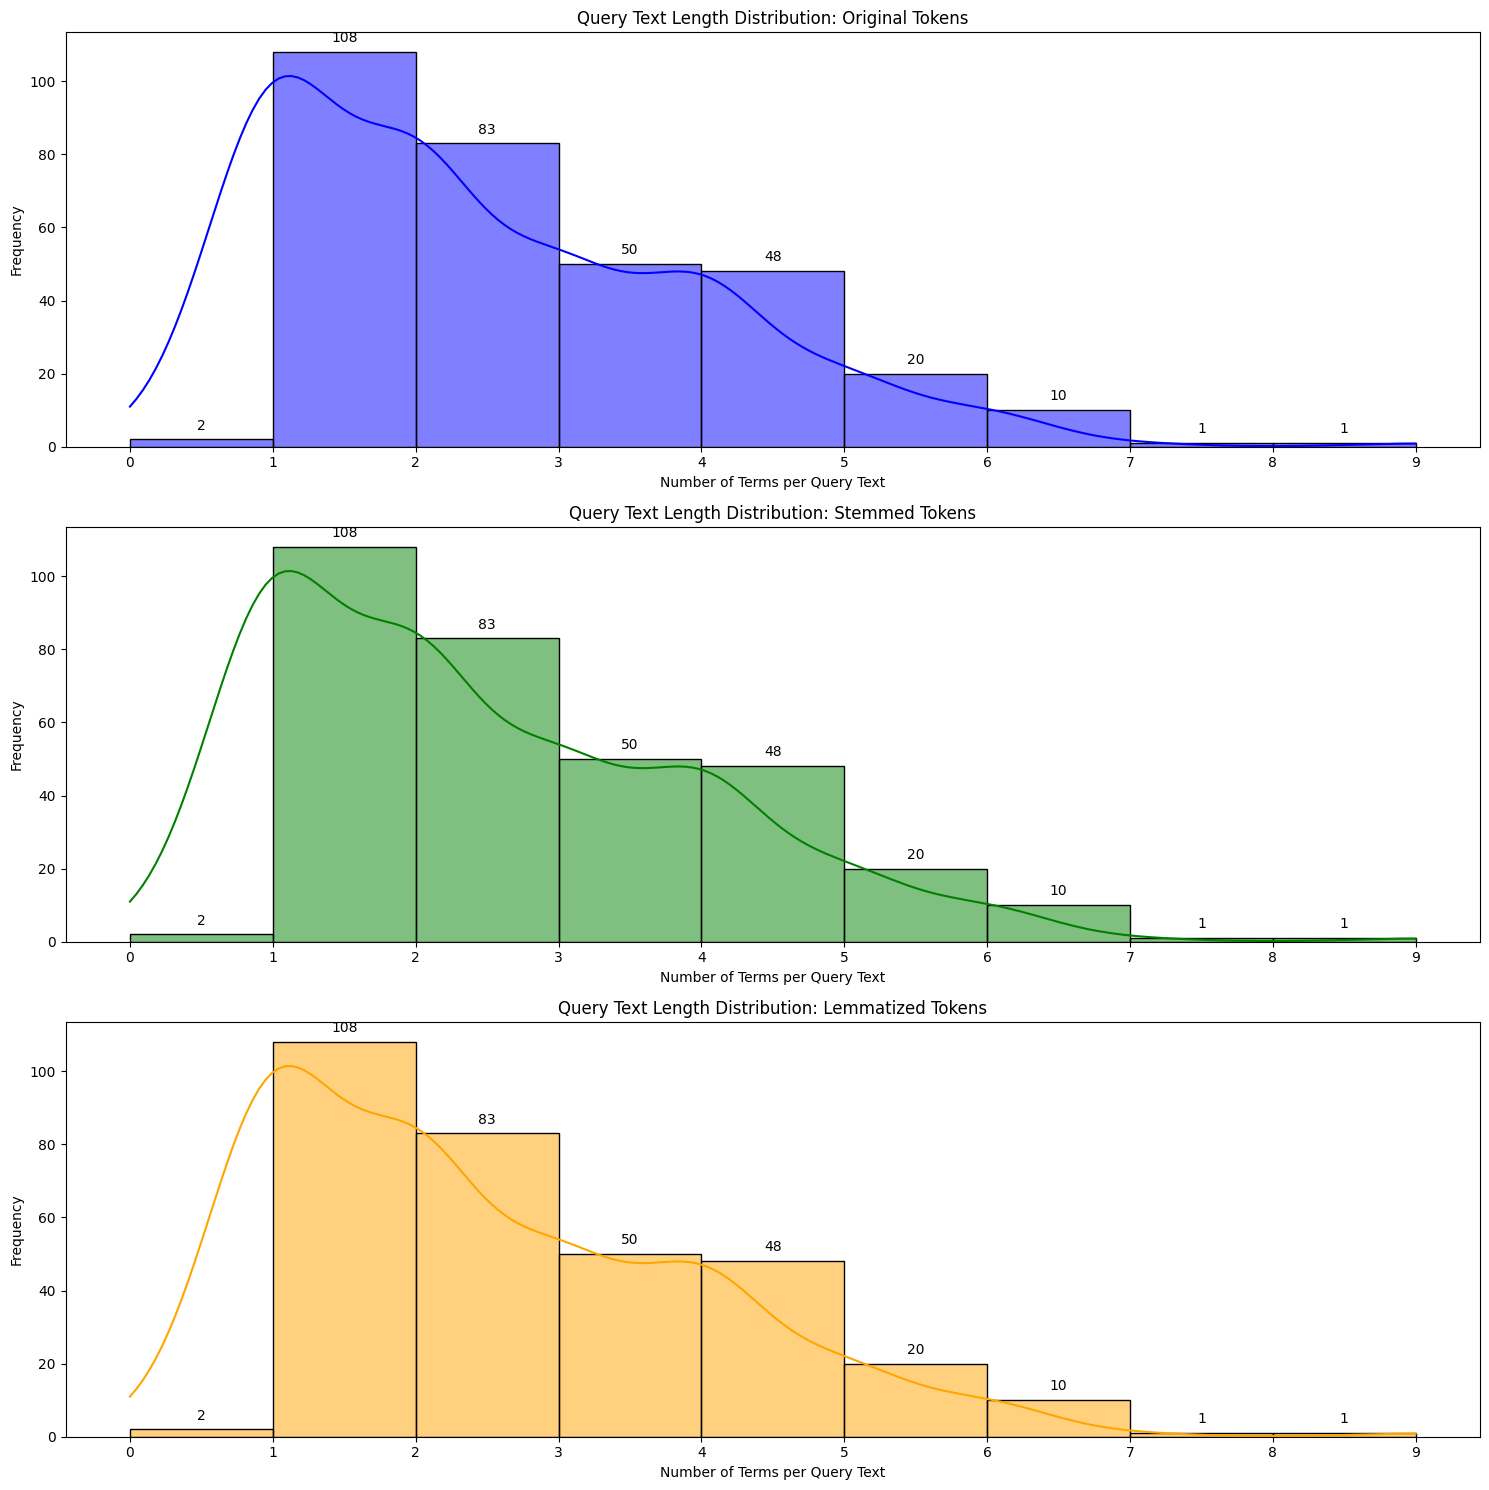

In [42]:
# Set up the figure
plt.figure(figsize=(15, 15))

# Plot Original Term Count
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
ax1 = sns.histplot(queries_copy['original_term_count'], color='blue', kde=True, bins=np.arange(0, queries_copy['original_term_count'].max() + 1, 1))
plt.xlabel("Number of Terms per Query Text")
plt.ylabel("Frequency")
plt.title("Query Text Length Distribution: Original Tokens")
plt.xticks(np.arange(0, queries_copy['original_term_count'].max() + 1, 1))  # Set ticks at every bin edge
add_annotations(ax1)

# Plot Stemmed Term Count
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
ax2 = sns.histplot(queries_copy['stemmed_term_count'], color='green', kde=True, bins=np.arange(0, queries_copy['stemmed_term_count'].max() + 1, 1))
plt.xlabel("Number of Terms per Query Text")
plt.ylabel("Frequency")
plt.title("Query Text Length Distribution: Stemmed Tokens")
plt.xticks(np.arange(0, queries_copy['stemmed_term_count'].max() + 1, 1))  # Set ticks at every bin edge
add_annotations(ax2)

# Plot Lemmatized Term Count
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
ax3 = sns.histplot(queries_copy['lemmatized_term_count'], color='orange', kde=True, bins=np.arange(0, queries_copy['lemmatized_term_count'].max() + 1, 1))
plt.xlabel("Number of Terms per Query Text")
plt.ylabel("Frequency")
plt.title("Query Text Length Distribution: Lemmatized Tokens")
plt.xticks(np.arange(0, queries_copy['lemmatized_term_count'].max() + 1, 1))  # Set ticks at every bin edge
add_annotations(ax3)

# Adjust layout
plt.tight_layout()
plt.show()

#### **Query Text Distribution - Word Cloud**

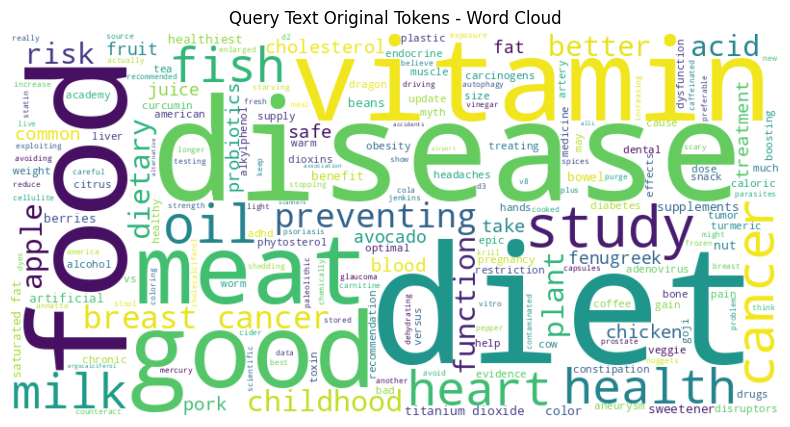

In [43]:
# Plot Original Term Count
create_wordcloud([token for sublist in queries_copy['original_query_tokens'] for token in sublist], "Query Text Original Tokens - Word Cloud")

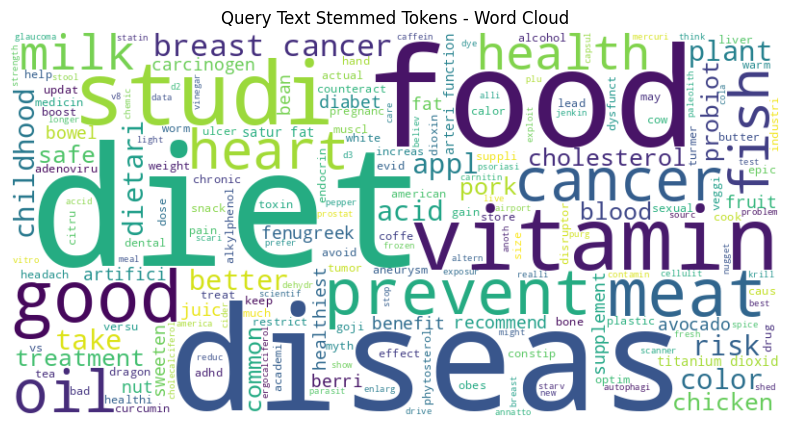

In [44]:
# Plot Stemmed Term Count
create_wordcloud([token for sublist in queries_copy['stemmed_query_tokens'] for token in sublist], "Query Text Stemmed Tokens - Word Cloud")

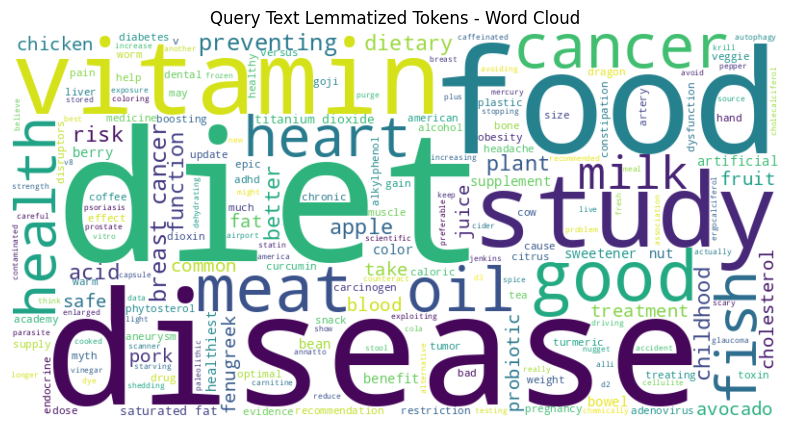

In [45]:
# Plot Lemmatized Term Count
create_wordcloud([token for sublist in queries_copy['lemmatized_query_tokens'] for token in sublist], "Query Text Lemmatized Tokens - Word Cloud")

#### **Tails of the Distribution Analysis**

##### **Lower Tail Analysis**

In [46]:
# Filter the dataframe for the lower tail, i.e. number of terms < 1
lower_tail_query = queries_copy[
    (queries_copy['original_term_count'] < 1) |
    (queries_copy['stemmed_term_count'] < 1) |
    (queries_copy['lemmatized_term_count'] < 1)
]

# Order by original_term_count in ascending order
lower_tail_query.sort_values(by='original_term_count', ascending=True)

query_text    query_id original_query_tokens stemmed_query_tokens  \
44   African-American   PLAIN-499                    []                   []   
125             IGF-1  PLAIN-1398                    []                   []   

    lemmatized_query_tokens  original_term_count  stemmed_term_count  \
44                       []                    0                   0   
125                      []                    0                   0   

     lemmatized_term_count  
44                       0  
125                      0

##### **Upper Tail Analysis**

In [47]:
# Filter the dataframe for the upper tail, i.e. number of terms > 5
upper_tail_query = queries_copy[
    (queries_copy['original_term_count'] > 5) |
    (queries_copy['stemmed_term_count'] > 5) |
    (queries_copy['lemmatized_term_count'] > 5)
]

# Order by original_term_count in descending order (top 10)
upper_tail_query.sort_values(by='original_term_count', ascending=False).head(10)

query_text  \
274  Pharmacists Versus Health Food Store Employees: Who Gives Better Advice?   
31                   Dioxins Stored in Our Own Fat May Increase Diabetes Risk   
11                                 How Citrus Might Help Keep Your Hands Warm   
0                            Do Cholesterol Statin Drugs Cause Breast Cancer?   
32                Didn't another study show carnitine was good for the heart?   
38                   Are krill oil supplements better than fish oil capsules?   
242                        Chicken Salmonella Thanks to Meat Industry Lawsuit   
41         Is vitamin D3 (cholecalciferol) preferable to D2 (ergocalciferol)?   
255                     Flaxseeds & Breast Cancer Survival: Clinical Evidence   
256                                    Do Fruit & Nut Bars Cause Weight Gain?   

       query_id  \
274  PLAIN-2960   
31    PLAIN-344   
11    PLAIN-123   
0       PLAIN-2   
32    PLAIN-358   
38    PLAIN-430   
242  PLAIN-2640   
41    PLAIN-468   
255  PLAIN-2770   
256  PLAIN-2780   

                                                            original_query_tokens  \
274  [pharmacists, versus, health, food, store, employees, gives, better, advice]   
31                          [dioxins, stored, fat, may, increase, diabetes, risk]   
11                                       [citrus, might, help, keep, hands, warm]   
0                             [cholesterol, statin, drugs, cause, breast, cancer]   
32                                 [another, study, show, carnitine, good, heart]   
38                         [krill, oil, supplements, better, fish, oil, capsules]   
242                        [chicken, salmonella, thanks, meat, industry, lawsuit]   
41                 [vitamin, d3, cholecalciferol, preferable, d2, ergocalciferol]   
255                     [flaxseeds, breast, cancer, survival, clinical, evidence]   
256                                       [fruit, nut, bars, cause, weight, gain]   

                                                       stemmed_query_tokens  \
274  [pharmacist, versu, health, food, store, employe, give, better, advic]   
31                         [dioxin, store, fat, may, increas, diabet, risk]   
11                                   [citru, might, help, keep, hand, warm]   
0                         [cholesterol, statin, drug, caus, breast, cancer]   
32                              [anoth, studi, show, carnitin, good, heart]   
38                      [krill, oil, supplement, better, fish, oil, capsul]   
242                   [chicken, salmonella, thank, meat, industri, lawsuit]   
41               [vitamin, d3, cholecalciferol, prefer, d2, ergocalciferol]   
255                          [flaxse, breast, cancer, surviv, clinic, evid]   
256                                   [fruit, nut, bar, caus, weight, gain]   

                                                       lemmatized_query_tokens  \
274  [pharmacist, versus, health, food, store, employee, give, better, advice]   
31                        [dioxin, stored, fat, may, increase, diabetes, risk]   
11                                     [citrus, might, help, keep, hand, warm]   
0                           [cholesterol, statin, drug, cause, breast, cancer]   
32                              [another, study, show, carnitine, good, heart]   
38                        [krill, oil, supplement, better, fish, oil, capsule]   
242                     [chicken, salmonella, thanks, meat, industry, lawsuit]   
41              [vitamin, d3, cholecalciferol, preferable, d2, ergocalciferol]   
255                   [flaxseed, breast, cancer, survival, clinical, evidence]   
256                                     [fruit, nut, bar, cause, weight, gain]   

     original_term_count  stemmed_term_count  lemmatized_term_count  
274                    9                   9                      9  
31                     7                   7                      7  
11                     6                   6  

### **Relevance Judgement Analysis**

#### **Relevance Scores**

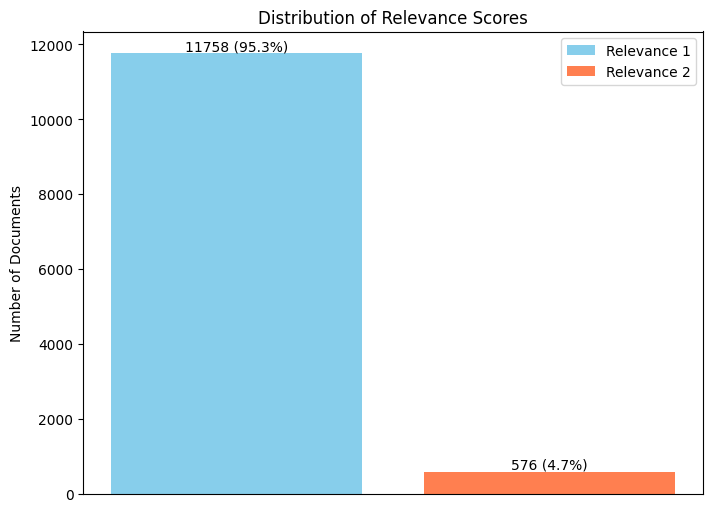

In [48]:
relevance_counts = qrels_df['relevance'].value_counts()
plt.figure(figsize=(8, 6))

# Create bars with different colors for relevance scores 1 and 2
bars1 = plt.bar(1, relevance_counts.get(1, 0), color='skyblue', label='Relevance 1')
bars2 = plt.bar(2, relevance_counts.get(2, 0), color='coral', label='Relevance 2')

plt.xlabel("") # Remove x-axis labels
plt.ylabel("Number of Documents")
plt.title("Distribution of Relevance Scores")

# Add percentage labels above each bar
total_docs = len(qrels_df)

# Calculate percentages and create labels
percentage1 = (relevance_counts.get(1, 0) / total_docs) * 100 if total_docs > 0 else 0
percentage2 = (relevance_counts.get(2, 0) / total_docs) * 100 if total_docs > 0 else 0

# Add text labels above bars
plt.text(bars1[0].get_x() + bars1[0].get_width()/2, bars1[0].get_height(), f"{int(relevance_counts.get(1,0))} ({percentage1:.1f}%)", va='bottom', ha='center')
plt.text(bars2[0].get_x() + bars2[0].get_width()/2, bars2[0].get_height(), f"{int(relevance_counts.get(2,0))} ({percentage2:.1f}%)", va='bottom', ha='center')


# Add a legend
plt.legend()
plt.xticks([]) # Remove x-axis ticks

plt.show()

#### **QRels Distribution**

In [49]:
# More statistics about the qrels analysis
qrels_per_query = qrels_df.groupby('query_id').size()
print("Qrels distribution per query:\n", qrels_per_query.describe())

Qrels distribution per query:
 count    323.000000
mean      38.185759
std       71.813225
min        1.000000
25%        5.000000
50%       16.000000
75%       39.500000
max      475.000000
dtype: float64


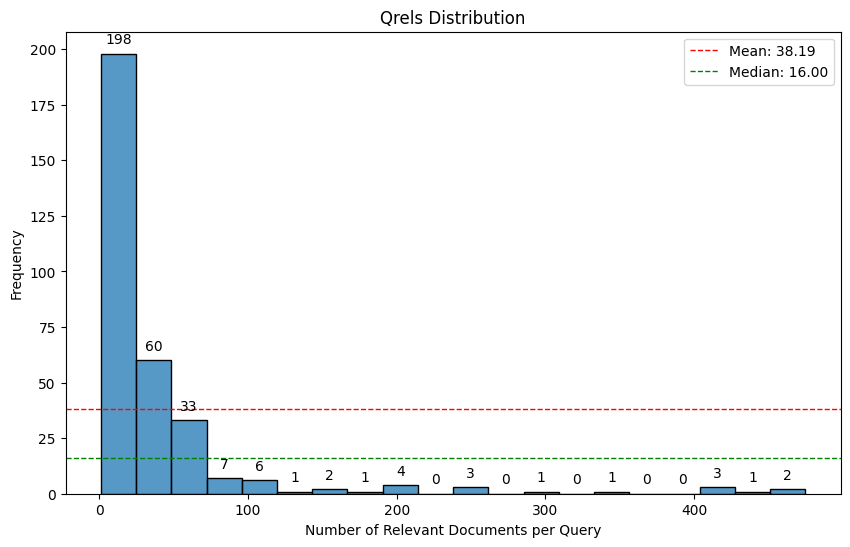

In [50]:
# Visualize qrels distribution
plt.figure(figsize=(10, 6))
ax = sns.histplot(qrels_per_query, bins=20, kde=False)
plt.xlabel("Number of Relevant Documents per Query")
plt.ylabel("Frequency")
plt.title("Qrels Distribution")
# Add mean and median lines
plt.axhline(qrels_per_query.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {qrels_per_query.mean():.2f}')
plt.axhline(qrels_per_query.median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {qrels_per_query.median():.2f}')
plt.legend()

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### **Particular Cases Analysis**

In [51]:
# Identify queries with the minimum and maximum number of relevant documents
min_relevant_queries = qrels_per_query[qrels_per_query == 1]
max_relevant_queries = qrels_per_query[qrels_per_query == 475]

# Create DataFrames for minimum and maximum relevant queries
min_relevant_df = (
    pd.DataFrame({'query_id': min_relevant_queries.index, 'num_relevant_docs': min_relevant_queries.values})
    .merge(qrels_df, on='query_id')  # Merge with qrels_df to get doc_id and relevance
    .merge(data, on='doc_id')        # Merge with data to get document text and title
    .merge(queries, on='query_id')   # Merge with queries dataframe to get query text
)

max_relevant_df = (
    pd.DataFrame({'query_id': max_relevant_queries.index, 'num_relevant_docs': max_relevant_queries.values})
    .merge(qrels_df, on='query_id')  # Merge with qrels_df to get doc_id and relevance
    .merge(data, on='doc_id')        # Merge with data to get document text and title
    .merge(queries, on='query_id')   # Merge with queries dataframe to get query text
)

##### **Minimum Number of Docs Retrieved**

In [52]:
# Count how many distinct queries have the extreme case with MIN number of docs
min_relevant_df['query_id'].nunique()

23

In [53]:
# Minimum number of docs retrieved (1)
min_relevant_df.sample(10)

query_id  num_relevant_docs    doc_id  relevance  \
8   PLAIN-2081                  1  MED-4303          1   
17   PLAIN-520                  1  MED-5155          1   
13  PLAIN-3026                  1  MED-4470          2   
14  PLAIN-3074                  1  MED-4555          2   
18   PLAIN-603                  1  MED-4413          1   
0   PLAIN-1028                  1  MED-4686          1   
10  PLAIN-2167                  1  MED-2722          1   
15  PLAIN-3116                  1  MED-5331          2   
1   PLAIN-1130                  1  MED-4165          1   
3   PLAIN-1331                  1  MED-4375          1   

                                                                                                                                                                                                                                                                                                           text  \
8   Four out of eight 'healthier' oils-namely, almond oil, avocado oil, hazelnut oil and macadamia nut oil-studied were rich sources of monounsaturated fatty acids like olive oil. Grape seed oil, rice barn oil (marketed recently), toasted sesame oil and walnut oil contained high levels of essential ...   
17  Objective: To determine if a supplement of soy protein improves body composition, body fat distribution, and glucose and insulin metabolism in non-diabetic postmenopausal women compared to an isocaloric casein placebo. Design: Randomized, double-blind, placebo-controlled 3-month trial Setting: C...   
13  The properties of N-nitroso compounds (NNC) and of vitamins C and E are briefly described. The author reviews the ability of vitamins C and E to inhibit NNC formation in chemical systems, in nitrite-preserved meat, in experimental animals and in humans. Dietary vitamins C and E both produced 30%...   
14  BACKGROUND: Abdominal aortic aneurysm (AAA) disease is an insidious condition with an 85% chance of death after rupture. Ultrasound screening can reduce mortality, but its use is advocated only for a limited subset of the population at risk. METHODS: We used data from a retrospective cohort of 3...   
18  Estimation of total antioxidant intake is the first step to investigate the protective effects of antioxidants on oxidative stress-mediated disease. The present study was designed to develop an algorithm to estimate total antioxidant capacity (TAC) of the US diet. TAC of individual antioxidants ...   
0   There is ample reason to believe that diets rich in phytochemicals provide protection from vascular diseases and many cancers; direct antioxidant activity as well as modulation of enzyme expression or hormone activity contribute to this effect. Phytochemicals derived from diverse foods presumabl...   
10  Background Obesity and physical inactivity are associated with several chronic conditions, increased medical care costs, and premature death. Methods We used the Behavioral Risk Factor Surveillance System (BRFSS), a state-based random-digit telephone survey that covers the majority of United Sta...   
15  A global health transition is currently underway. The burden of non-communicable diseases (NCDs) is increasing rapidly in the developing world, very much as a result of changes in lifestyles. In addition to changes in tobacco use and physical activity, major changes are taking place in diets, co...   
1   Ergothioneine is a native membrane-impermeable thiol compound that is specifically accumulated in cells via the organic cation transporter OCTN1. In humans, OCTN1 and ergothioneine have been implicated in the etiopathogenesis of autoimmune disorders. However, available evidence about dietary sou...   
3   There is widespread concern over the presence of Hg in fish consumed by humans. While studies have been focused on determining the Hg concentration in sport fish and some commercial fish, little attention has been directed to canned tuna; it is widely held that concentrations are low. In the 

##### **Maximum Number of Docs Retrieved**

In [54]:
# Count how many distinct queries have the extreme case with MAX number of docs
max_relevant_df['query_id'].nunique()

1

In [55]:
# Maximum number of docs retrieved (475)
max_relevant_df.sample(10)

query_id  num_relevant_docs    doc_id  relevance  \
262  PLAIN-660                475  MED-2517          1   
403  PLAIN-660                475  MED-3822          1   
80   PLAIN-660                475  MED-1231          1   
385  PLAIN-660                475  MED-3780          1   
92   PLAIN-660                475  MED-1380          1   
320  PLAIN-660                475  MED-3235          1   
40   PLAIN-660                475  MED-2807          1   
243  PLAIN-660                475  MED-3498          1   
100  PLAIN-660                475  MED-1401          1   
326  PLAIN-660                475  MED-3275          1   

                                                                                                                                                                                                                                                                                                            text  \
262  Many experts in the biology of ageing believe that pharmacological interventions to slow ageing are a matter of ‘when’ rather than ‘if’. A leading target for such interventions is the nutrient response pathway defined by the mechanistic target of rapamycin (mTOR). Inhibition of this pathway exte...   
403  Only a limited number of studies on cellulite have been published in the international literature and many of them reach somewhat antithetical conclusions. Consequently, it is not yet possible to reconcile the extreme differences of opinion which have lingered on for years concerning the nature ...   
80   BACKGROUND: Fiber intake is associated with lower cardiovascular disease risk. Whether arterial stiffness is influenced by lifetime fiber intake is not known. Any such association could explain, at least in part, the cardioprotective effects attributed to fiber intake. OBJECTIVE: The objective w...   
385  Metabolomics studies hold promise for discovery of pathways linked to disease processes. Cardiovascular disease (CVD) represents the leading cause of death and morbidity worldwide. A metabolomics approach was used to generate unbiased small molecule metabolic profiles in plasma that predict risk...   
92   Objective To investigate the relative importance of the individual components of the Mediterranean diet in generating the inverse association of increased adherence to this diet and overall mortality. Design Prospective cohort study. Setting Greek segment of the European Prospective Investigatio...   
320  Background Maintaining muscle mass while aging is important to prevent falls and fractures. Metabolic acidosis promotes muscle wasting, and the net acid load from diets that are rich in net acid–producing protein and cereal grains relative to their content of net alkali–producing fruit and veget...   
40   In a previous three-month study of Meriva, a proprietary curcumin-phosphatidylcholine phytosome complex, decreased joint pain and improvement in joint function were observed in 50 osteoarthritis (OA) patients. Since OA is a chronic condition requiring prolonged treatment, the long-term efficacy ...   
243  Acrylamide is a heat-induced carcinogen compound that is found in some foods consequently to cooking or other thermal processes. In the second French Total Diet Study (TDS), acrylamide was analysed in 192 food samples collected in mainland France to be representative of the population diet and p...   
100  The link between iron intake as well as body iron stores and coronary heart disease (CHD) has been contentiously debated, and the epidemiologic evidence is inconsistent. We aimed to quantitatively summarize the literature on the association between dietary iron intake/body iron stores and CHD ri...   
326                          In tissue cultures of normal adult and malignant mammalian cells, homocystine has been substituted for methionine in a medium rich in folic acid and cyanocobalamin. Normal adult cells thrive. Three highly malignant cell types from three different species, in

## **PART II: Basic Retrieval Pipelines**

> The second part is focused on Retrieval Pipelines and the evaluation of different experiments using TF-IDF and BM25. In this project PorterStemmer and SnowballStemmer have been used as Stemmers, while the indexing has been done on text, title and both title and text of the documents.

> Preparing the data for the experiments.

In [56]:
# --------- DOCS ---------

# Copy of the document data df
data_copy = data.copy()

# Rename the 'doc_id' column to 'docno' as required by PyTerrier
data_copy = data_copy.rename(columns={"doc_id": "docno"})

# --------- QUERIES ---------

# Copy of the queries df
queries_copy = queries.copy()

# Rename the 'query_id' and 'query_text' columns to 'qid' and 'query' as required by PyTerrier
queries_copy = queries_copy.rename(columns={"query_id": "qid", "query_text": "query"})

# Sanitize the queries
queries_copy['query'] = queries_copy['query'].str.replace(r"[^\w\s]", "", regex=True)

# --------- QRELS ---------

# Copy of the qrels df
qrels_df_copy = qrels_df.copy()

# Rename the 'query_id', 'doc_id', 'relevance' columns to 'qid', 'docno', 'label' as required by PyTerrier
qrels_df_copy = qrels_df_copy.rename(columns={"query_id": "qid", "doc_id": "docno", "relevance": "label"})

In [57]:
data_copy.head(1)

text  \
0  Recent studies have suggested that statins, an established drug group in the prevention of cardiovascular mortality, could delay or prevent breast cancer recurrence but the effect on disease-specific mortality remains unclear. We evaluated risk of breast cancer death among statin users in a popu...   

                                                                           title  \
0  Statin Use and Breast Cancer Survival: A Nationwide Cohort Study from Finland   

    docno  
0  MED-10

In [58]:
queries_copy.head(1)

query      qid
0  Do Cholesterol Statin Drugs Cause Breast Cancer  PLAIN-2

In [59]:
qrels_df_copy.head(1)

qid     docno  label
0  PLAIN-2  MED-2427      2

In [60]:
# Specify the directory where the index will be saved
index_path = './medical_ir_index'

### **Indexing Only The Doc Titles**

#### **Stemmer: PorterStemmer**

##### **Index the Collection**

In [61]:
# Use PorterStemmer to reduce words to their root form during indexing
pt.set_property("termpipelines", "PorterStemmer")

# Create the IterDictIndexer for field-based indexing
indexer = pt.IterDictIndexer(index_path, text_attrs=['title'], fields=True, overwrite=True)

# Index only the 'title' field of the documents
index_ref = indexer.index(data_copy.to_dict(orient="records"))
print(f"Created index at {index_ref.toString()}")

# Show the Java object type
print(f"\nindex_ref type is {index_ref.getClass().getName()}")

# Shows the generated files for the index
print("\nGenerated index files:")
!ls -lh "$index_path"

Created index at ./medical_ir_index/data.properties

index_ref type is org.terrier.querying.IndexRef

Generated index files:
total 1.1M
-rw-r--r-- 1 root root  60K Jan 27 01:36 data.direct.bf
-rw-r--r-- 1 root root  75K Jan 27 01:36 data.document.fsarrayfile
-rw-r--r-- 1 root root  58K Jan 27 01:36 data.inverted.bf
-rw-r--r-- 1 root root 447K Jan 27 01:36 data.lexicon.fsomapfile
-rw-r--r-- 1 root root 1017 Jan 27 01:36 data.lexicon.fsomaphash
-rw-r--r-- 1 root root  20K Jan 27 01:36 data.lexicon.fsomapid
-rw-r--r-- 1 root root 231K Jan 27 01:36 data.meta-0.fsomapfile
-rw-r--r-- 1 root root  29K Jan 27 01:36 data.meta.idx
-rw-r--r-- 1 root root  85K Jan 27 01:36 data.meta.zdata
-rw-r--r-- 1 root root 4.3K Jan 27 01:36 data.properties


In [62]:
# Convert the IndexRef into a PyTerrier index object for querying or analysis
index = pt.IndexFactory.of(index_ref)

# Show the Java object type
print(f"index type is {index.getClass().getName()}")

index type is org.terrier.structures.IndexOnDisk


In [63]:
# Statistics about the indexed collection (number of docs, terms, tokens, ...)
print(index.getCollectionStatistics().toString())

Number of documents: 3633
Number of terms: 5075
Number of postings: 33108
Number of fields: 1
Number of tokens: 33787
Field names: [title]
Positions:   false



In [64]:
# Access the lexicon
lexicon = index.getLexicon()

# Create a list to store terms and their frequencies (the length is the number of terms)
term_frequencies = []

# Extract terms and their frequencies
for term, le in lexicon:
  frequency = le.getFrequency()
  term_frequencies.append((term, frequency))

# Sort terms by frequency in ascending order
term_frequencies.sort(key=lambda x: x[1])  # Sort by frequency (2nd element in tuple)

# Display the top 10 terms with the lowest frequency
print("Top 10 Terms with Lowest Frequency:")
for term, freq in term_frequencies[:10]:
    print(f"Term: {term}, Frequency: {freq}")

# Display the top 10 terms with the highest frequency
print("\nTop 10 Terms with Highest Frequency:")
for term, freq in term_frequencies[-10:]:
    print(f"Term: {term}, Frequency: {freq}")

Top 10 Terms with Lowest Frequency:
Term: 00, Frequency: 1
Term: 013, Frequency: 1
Term: 101, Frequency: 1
Term: 115, Frequency: 1
Term: 1202, Frequency: 1
Term: 13, Frequency: 1
Term: 134, Frequency: 1
Term: 136, Frequency: 1
Term: 138, Frequency: 1
Term: 13c, Frequency: 1

Top 10 Terms with Highest Frequency:
Term: consumpt, Frequency: 223
Term: intak, Frequency: 265
Term: human, Frequency: 312
Term: diseas, Frequency: 315
Term: diet, Frequency: 323
Term: dietari, Frequency: 340
Term: studi, Frequency: 402
Term: cancer, Frequency: 442
Term: risk, Frequency: 442
Term: effect, Frequency: 448


##### **Standard Retrieval Pipeline**

In [65]:
bm25 = pt.terrier.Retriever(index, wmodel="BM25")
tfidf = pt.terrier.Retriever(index, wmodel="TF_IDF")

##### **Offline Retrieval Effectiveness Evaluation**

In [66]:
# Run queries using BM25
bm25_results = bm25.transform(queries_copy)

# Run queries using TF-IDF
tfidf_results = tfidf.transform(queries_copy)

In [67]:
# Evaluate BM25
bm25_metrics = pt.Utils.evaluate(bm25_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF
tfidf_metrics = pt.Utils.evaluate(tfidf_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 metrics
print("BM25 Metrics:")
print(bm25_metrics)

# Print TF-IDF metrics
print("\nTF-IDF Metrics:")
print(tfidf_metrics)

BM25 Metrics:
{'P.10': 0.1687306501547989, 'recall.10': 0.10940218993358437, 'map': 0.09871495866395952, 'ndcg': 0.20266874287314254}

TF-IDF Metrics:
{'P.10': 0.1684210526315791, 'recall.10': 0.10928008367481293, 'map': 0.09856050052568166, 'ndcg': 0.20251348812418085}


In [68]:
# Export data for ASPIRE

# --------- QUERIES ---------

# Prepare queries DataFrame
queries_output = queries_copy[["qid", "query"]]

# Save as TSV without header, filename with ".txt" extension
queries_output.to_csv("queries_Gargiulo_Piacente.txt", sep="\t", index=False, header=False)


# --------- QRELS ---------

# Prepare qrels DataFrame

qrels_output = qrels_df_copy.copy()
qrels_output["iteration"] = "Q0"  # Add iteration column
qrels_output = qrels_output[["qid", "iteration", "docno", "label"]]

# Save as TSV without header, filename with ".txt" extension
qrels_output.to_csv("qrels_Gargiulo_Piacente.txt", sep="\t", index=False, header=False)


# --------- RETRIEVAL RUNS ---------

# Prepare BM25 DataFrame
bm25_output = bm25_results.copy()
bm25_output["iteration"] = "Q0"  # Add iteration column
bm25_output = bm25_output[["qid", "iteration", "docno", "rank", "score"]]
bm25_output = bm25_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
bm25_output.to_csv("bm25_Gargiulo_Piacente_only_title_PorterStemmer.csv", sep=",", index=False, header=True)


# Prepare TF-IDF DataFrame
tfidf_output = tfidf_results.copy()
tfidf_output["iteration"] = "Q0"  # Add iteration column
tfidf_output = tfidf_output[["qid", "iteration", "docno", "rank", "score"]]
tfidf_output = tfidf_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
tfidf_output.to_csv("tfidf_Gargiulo_Piacente_only_title_PorterStemmer.csv", sep=",", index=False, header=True)

##### **In-Depth Analysis of Queries**

###### **Inconsistencies: relevant pairs not in qrels**

In [69]:
# Create a set of <qid, docno> pairs from qrels_df_copy
qrels_pairs = set(zip(qrels_df_copy['qid'], qrels_df_copy['docno']))

# Find pairs in bm25_results that are not in qrels_pairs
missing_pairs = []
for _, row in bm25_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document titles SINCE WE'RE INDEXING ONLY DOC TITLES
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TEXT
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'title']]
print("All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0         PLAIN-2   2728  MED-4391     4  10.779867   
1         PLAIN-2   3096  MED-4826     5  10.540632   
2         PLAIN-2    346  MED-1193     6  10.463770   
3         PLAIN-2   1609  MED-2792     7  10.152644   
4         PLAIN-2   1836  MED-3199     8   9.900596   
...           ...    ...       ...   ...        ...   
34478  PLAIN-3472   1053  MED-2049    24   6.183385   
34479  PLAIN-3472    356  MED-1204    25   5.910556   
34480  PLAIN-3472   2024  MED-3495    26   5.910556   
34481  PLAIN-3472    671  MED-1575    27   5.709745   
34482  PLAIN-3472   1633  MED-2820    28   4.742903   

                                                       query  \
0            Do Cholesterol Statin Drugs Cause Breast Cancer   
1            Do Cholesterol Statin Drugs Cause Breast Cancer   
2            Do Cholesterol Statin Drugs Cause Breast Cancer   
3            Do Cholesterol Statin Drugs Cause Breast Cancer   
4            Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                      ...   
34478  How Doctors Responded to Being Named a Leading Killer   
34479  How Doctors Responded to Being Named a Leading Killer   
34480  How Doctors Responded to Being Named a Leading Killer   
34481  How Doctors Responded to Being Named a Leading Killer   
34482  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                        title  
0                                                                                                                                                              Lifestyle related causes of cancer and chemoprevention through phytonutrients.  
1                                                                                                                                                                             Macronutrients, fatty acids, cholesterol and pancreatic cancer.  
2                                                                           The effects of lowering LDL cholesterol with statin therapy in people at low risk of vascular disease: meta-analysis of individual data from 27 randomised trials  
3                                                                                                              Cholesterol oxides in Indian ghee: possible cause of unexplained high risk of atherosclerosis in Indian immigrant populations.  
4                                                                                                               Potential risks resulting from fruit/vegetable-drug interactions: effects on drug-metabolizing enzymes and drug transporters.  
...                                                                                                                                                                                                                                       ...  
34478                         Beneficial immunostimulatory effect of short-term Chlorella supplementation: enhancement of Natural Killer cell activity and early inflammatory response (Randomized, double-blinded, placebo-controlled trial)  
34479                                                                                  Cholesterol crystals cause mechanical damage to biological membranes: a proposed mechanism of plaque rupture and erosion leading to arterial thromb...  
34480                                                                                  Exposure to common food additive carrageenan leads to reduced sulfatase activity and increase in sulfated glycosaminoglycans in human epithelial cells  
34481                                                                                    Changes in expression and distribution of claudin 2, 5 and 8 lead to discontinuous tight juncti



Most frequent query texts:


query
Counteracting the Effects of Dioxins Through Diet           713
Stool Size and Breast Cancer Risk                           712
Breast Cancer and Diet                                      692
Cancer Risk From CT Scan Radiation                          688
Dietary Treatment of Crohns Disease                         684
Global Burden of Disease Study                              681
Dioxins Stored in Our Own Fat May Increase Diabetes Risk    680
Iowa Womens Health Study                                    662
Do Cholesterol Statin Drugs Cause Breast Cancer             561
Flaxseeds  Breast Cancer Survival Clinical Evidence         549
Name: count, dtype: int64



Least frequent query texts:


query
adenovirus 36        1
seafood              1
worms                1
prunes               1
beans                1
Dr Dean Ornish       1
cortisol             1
Dr Walter Willett    1
nuts                 1
leucine              1
Name: count, dtype: int64

In [70]:
# Count the total number of retrieved documents per query in bm25_results
retrieved_doc_counts = bm25_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in BM25 results:


qid                                                      query
561      PLAIN-12                        Exploiting Autophagy to Live Longer
6995    PLAIN-358  Didnt another study show carnitine was good for the heart
7835    PLAIN-395                What about pepper plus turmeric in V8 juice
8903    PLAIN-478                                                  accidents
9169    PLAIN-603                                                   Arkansas
9632    PLAIN-691                                            bioavailability
9759    PLAIN-751                                                 BRCA genes
9777    PLAIN-761                                                breast pain
9939    PLAIN-782                                        Bush administration
9964    PLAIN-817                                               canker sores
9973    PLAIN-872                                      chanterelle mushrooms
10019   PLAIN-966                                                   cortisol
10055  PLAIN-1018                                                        DHA
10527  PLAIN-1050                                             Dr Dean Ornish
10528  PLAIN-1066                                          Dr Walter Willett
10535  PLAIN-1119                                              energy drinks
10625  PLAIN-1161                                                 fava beans
10836  PLAIN-1249                                       genetic manipulation
12031  PLAIN-1353                                                     hernia
12094  PLAIN-1409                                          industrial toxins
13567  PLAIN-1547                                               lyme disease
14517  PLAIN-1690                               National Academy of Sciences
14559  PLAIN-1700                                           Native Americans
15008  PLAIN-1784                                                  oxen meat
15835  PLAIN-1887                                           poisonous plants
15979  PLAIN-1995                                                    red tea
16059  PLAIN-2009                                             rhabdomyolysis
16178  PLAIN-2113                                                soil health
16373  PLAIN-2145                                              St Johns wort
16377  PLAIN-2177                                                     sulfur
16384  PLAIN-2250                                                tongue worm
16868  PLAIN-2321                                             veggie chicken
16949  PLAIN-2343                                                  vitamin K
17064  PLAIN-2364                                                weight gain
17132  PLAIN-2375                                                    whiting
17146  PLAIN-2386                                                      worms
24610  PLAIN-2760                                 Eating Healthy on a Budget
26563  PLAIN-2840                                Benefits of Fenugreek Seeds
26843  PLAIN-2900     Boosting Good Bacteria in the Colon Without Probiotics
28080  PLAIN-2950                                         Unsafe at Any Feed
29046  PLAIN-3014                          Sometimes the Enzyme Myth Is True
29110  PLAIN-3037                              Out of the Lab Onto the Track
29440  PLAIN-3116                 Dietary Guidelines From Dairies to Berries
29928  PLAIN-3171                                    Convergence of Evidence
30602  PLAIN-3211                                       Overdosing on Greens
31530  PLAIN-3261                                        Update on Herbalife
33530  PLAIN-3372                                   The Healthiest Sweetener
33549  PLAIN-3392                               Healthiest Airplane Beverage
34454  PLAIN-3472      How Doctors Responded to Being Named a Leading Killer

Shape of the resulting DataFrame: (49, 2)


In [71]:
# Find pairs in tfidf_results that are not in qrels_pairs
missing_pairs = []
for _, row in tfidf_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document titles SINCE WE'RE INDEXING ONLY DOC TITLES
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TEXT
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'title']]
print("All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):


qid  docid     docno  rank     score  \
0         PLAIN-2   2728  MED-4391     4  6.142978   
1         PLAIN-2   3096  MED-4826     5  5.994804   
2         PLAIN-2    346  MED-1193     6  5.760419   
3         PLAIN-2   2315  MED-3832     7  5.676823   
4         PLAIN-2   1980  MED-3447     8  5.660540   
...           ...    ...       ...   ...       ...   
34478  PLAIN-3472   1053  MED-2049    24  3.423631   
34479  PLAIN-3472    356  MED-1204    25  3.245931   
34480  PLAIN-3472   2024  MED-3495    26  3.245931   
34481  PLAIN-3472    671  MED-1575    27  3.135651   
34482  PLAIN-3472   1633  MED-2820    28  2.604685   

                                                       query  \
0            Do Cholesterol Statin Drugs Cause Breast Cancer   
1            Do Cholesterol Statin Drugs Cause Breast Cancer   
2            Do Cholesterol Statin Drugs Cause Breast Cancer   
3            Do Cholesterol Statin Drugs Cause Breast Cancer   
4            Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                      ...   
34478  How Doctors Responded to Being Named a Leading Killer   
34479  How Doctors Responded to Being Named a Leading Killer   
34480  How Doctors Responded to Being Named a Leading Killer   
34481  How Doctors Responded to Being Named a Leading Killer   
34482  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                        title  
0                                                                                                                                                              Lifestyle related causes of cancer and chemoprevention through phytonutrients.  
1                                                                                                                                                                             Macronutrients, fatty acids, cholesterol and pancreatic cancer.  
2                                                                           The effects of lowering LDL cholesterol with statin therapy in people at low risk of vascular disease: meta-analysis of individual data from 27 randomised trials  
3                                                                                                                              Do phytoestrogens reduce the risk of breast cancer and breast cancer recurrence? What clinicians need to know.  
4                                                                                                                                                                                                             Seaweed prevents breast cancer?  
...                                                                                                                                                                                                                                       ...  
34478                         Beneficial immunostimulatory effect of short-term Chlorella supplementation: enhancement of Natural Killer cell activity and early inflammatory response (Randomized, double-blinded, placebo-controlled trial)  
34479                                                                                  Cholesterol crystals cause mechanical damage to biological membranes: a proposed mechanism of plaque rupture and erosion leading to arterial thromb...  
34480                                                                                  Exposure to common food additive carrageenan leads to reduced sulfatase activity and increase in sulfated glycosaminoglycans in human epithelial cells  
34481                                                                                    Changes in expression and distribution of claudin 2, 5 and 8 lead to discontinuous tight junctions and barr



Most frequent query texts:


query
Counteracting the Effects of Dioxins Through Diet           713
Stool Size and Breast Cancer Risk                           712
Breast Cancer and Diet                                      692
Cancer Risk From CT Scan Radiation                          688
Dietary Treatment of Crohns Disease                         684
Global Burden of Disease Study                              681
Dioxins Stored in Our Own Fat May Increase Diabetes Risk    680
Iowa Womens Health Study                                    662
Do Cholesterol Statin Drugs Cause Breast Cancer             561
Flaxseeds  Breast Cancer Survival Clinical Evidence         549
Name: count, dtype: int64



Least frequent query texts:


query
adenovirus 36        1
seafood              1
worms                1
prunes               1
beans                1
Dr Dean Ornish       1
cortisol             1
Dr Walter Willett    1
nuts                 1
leucine              1
Name: count, dtype: int64

In [72]:
# Count the total number of retrieved documents per query in tfidf_results
retrieved_doc_counts = tfidf_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
561      PLAIN-12                        Exploiting Autophagy to Live Longer
6995    PLAIN-358  Didnt another study show carnitine was good for the heart
7835    PLAIN-395                What about pepper plus turmeric in V8 juice
8903    PLAIN-478                                                  accidents
9169    PLAIN-603                                                   Arkansas
9632    PLAIN-691                                            bioavailability
9759    PLAIN-751                                                 BRCA genes
9777    PLAIN-761                                                breast pain
9939    PLAIN-782                                        Bush administration
9964    PLAIN-817                                               canker sores
9973    PLAIN-872                                      chanterelle mushrooms
10019   PLAIN-966                                                   cortisol
10055  PLAIN-1018                                                        DHA
10527  PLAIN-1050                                             Dr Dean Ornish
10528  PLAIN-1066                                          Dr Walter Willett
10535  PLAIN-1119                                              energy drinks
10625  PLAIN-1161                                                 fava beans
10836  PLAIN-1249                                       genetic manipulation
12031  PLAIN-1353                                                     hernia
12094  PLAIN-1409                                          industrial toxins
13567  PLAIN-1547                                               lyme disease
14517  PLAIN-1690                               National Academy of Sciences
14559  PLAIN-1700                                           Native Americans
15008  PLAIN-1784                                                  oxen meat
15835  PLAIN-1887                                           poisonous plants
15979  PLAIN-1995                                                    red tea
16059  PLAIN-2009                                             rhabdomyolysis
16178  PLAIN-2113                                                soil health
16373  PLAIN-2145                                              St Johns wort
16377  PLAIN-2177                                                     sulfur
16384  PLAIN-2250                                                tongue worm
16868  PLAIN-2321                                             veggie chicken
16949  PLAIN-2343                                                  vitamin K
17064  PLAIN-2364                                                weight gain
17132  PLAIN-2375                                                    whiting
17146  PLAIN-2386                                                      worms
24610  PLAIN-2760                                 Eating Healthy on a Budget
26563  PLAIN-2840                                Benefits of Fenugreek Seeds
26843  PLAIN-2900     Boosting Good Bacteria in the Colon Without Probiotics
28080  PLAIN-2950                                         Unsafe at Any Feed
29046  PLAIN-3014                          Sometimes the Enzyme Myth Is True
29110  PLAIN-3037                              Out of the Lab Onto the Track
29440  PLAIN-3116                 Dietary Guidelines From Dairies to Berries
29928  PLAIN-3171                                    Convergence of Evidence
30602  PLAIN-3211                                       Overdosing on Greens
31530  PLAIN-3261                                        Update on Herbalife
33530  PLAIN-3372                                   The Healthiest Sweetener
33549  PLAIN-3392                               Healthiest Airplane Beverage
34454  PLAIN-3472      How Doctors Responded to Being Named a Leading Killer

Shape of the resulting DataFrame: (49, 2)


###### **Inconsistencies: qrels not in relevant pairs**

In [73]:
# Create a set of <qid, docno> pairs from bm25_results
bm25_pairs = set(zip(bm25_results['qid'], bm25_results['docno']))

# Find pairs in qrels_df_copy that are not in bm25_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in bm25_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document titles SINCE WE'RE INDEXING ONLY DOC TITLES
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TEXT
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'title']]
print("All the pairs <qid, docno> in qrels which are not present in BM25 results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in BM25 results:


qid     docno  label  \
0         PLAIN-2  MED-3597      1   
1         PLAIN-2  MED-3598      1   
2         PLAIN-2  MED-3599      1   
3         PLAIN-2  MED-4560      1   
4        PLAIN-12  MED-2513      2   
...           ...       ...    ...   
10637  PLAIN-3472  MED-3623      1   
10638  PLAIN-3472  MED-3624      1   
10639  PLAIN-3472  MED-3625      1   
10640  PLAIN-3472  MED-3626      1   
10641  PLAIN-3472  MED-3627      1   

                                                       query  \
0            Do Cholesterol Statin Drugs Cause Breast Cancer   
1            Do Cholesterol Statin Drugs Cause Breast Cancer   
2            Do Cholesterol Statin Drugs Cause Breast Cancer   
3            Do Cholesterol Statin Drugs Cause Breast Cancer   
4                        Exploiting Autophagy to Live Longer   
...                                                      ...   
10637  How Doctors Responded to Being Named a Leading Killer   
10638  How Doctors Responded to Being Named a Leading Killer   
10639  How Doctors Responded to Being Named a Leading Killer   
10640  How Doctors Responded to Being Named a Leading Killer   
10641  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                      title  
0                                                                                                                      Trans Fat Consumption and Aggression  
1      A prospective study of intake of trans-fatty acids from ruminant fat, partially hydrogenated vegetable oils, and marine oils and mortality from CVD.  
2                                                                                                Updated estimate of trans fat intake by the US population.  
3                                                                                                        Preventing and arresting coronary atherosclerosis.  
4                                                      Insights into the beneficial effect of caloric/ dietary restriction for a healthy and prolonged life  
...                                                                                                                                                     ...  
10637                                              Pediatric CT research elevates public health concerns: low-dose radiation issues are highly politicized.  
10638                                                                                  Estimated risks of radiation-induced fatal cancer from pediatric CT.  
10639            Informed consent and communication of risk from radiological and nuclear medicine examinations: how to escape from a communication inferno  
10640                    Justification of diagnostic medical exposures: some practical issues. Report of an International Atomic Energy Agency Consultation  
10641                                                        Projected cancer risks from computed tomographic scans performed in the United States in 2007.  

[10642 rows x 5 columns]



Most frequent query texts:


query
beans                   460
pork                    453
seafood                 407
smoking                 404
nuts                    390
milk                    386
saturated fat           332
alternative medicine    306
industrial toxins       253
carcinogens             231
Name: count, dtype: int64



Least frequent query texts:


query
canker sores                                                           1
chanterelle mushrooms                                                  1
hearing                                                                1
leeks                                                                  1
domoic acid                                                            1
fava beans                                                             1
norovirus                                                              1
okra                                                                   1
Is Coconut Milk Good For You                                           1
Can antioxidantrich spices counteract the effects of a highfat meal    1
Name: count, dtype: int64

In [74]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in BM25 results:


qid                                                      query
4        PLAIN-12                        Exploiting Autophagy to Live Longer
1023    PLAIN-358  Didnt another study show carnitine was good for the heart
1030    PLAIN-395                What about pepper plus turmeric in V8 juice
1047    PLAIN-478                                                  accidents
1053    PLAIN-499                                            AfricanAmerican
...           ...                                                        ...
10121  PLAIN-3211                                       Overdosing on Greens
10210  PLAIN-3261                                        Update on Herbalife
10400  PLAIN-3372                                   The Healthiest Sweetener
10425  PLAIN-3392                               Healthiest Airplane Beverage
10625  PLAIN-3472      How Doctors Responded to Being Named a Leading Killer

[92 rows x 2 columns]

In [75]:
# Create a set of <qid, docno> pairs from tfidf_results
tfidf_pairs = set(zip(tfidf_results['qid'], tfidf_results['docno']))

# Find pairs in qrels_df_copy that are not in tfidf_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in tfidf_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document titles SINCE WE'RE INDEXING ONLY DOC TITLES
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TEXT
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'title']]

print("All the pairs <qid, docno> in qrels which are not present in TF-IDF results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in TF-IDF results:


qid     docno  label  \
0         PLAIN-2  MED-3597      1   
1         PLAIN-2  MED-3598      1   
2         PLAIN-2  MED-3599      1   
3         PLAIN-2  MED-4560      1   
4        PLAIN-12  MED-2513      2   
...           ...       ...    ...   
10637  PLAIN-3472  MED-3623      1   
10638  PLAIN-3472  MED-3624      1   
10639  PLAIN-3472  MED-3625      1   
10640  PLAIN-3472  MED-3626      1   
10641  PLAIN-3472  MED-3627      1   

                                                       query  \
0            Do Cholesterol Statin Drugs Cause Breast Cancer   
1            Do Cholesterol Statin Drugs Cause Breast Cancer   
2            Do Cholesterol Statin Drugs Cause Breast Cancer   
3            Do Cholesterol Statin Drugs Cause Breast Cancer   
4                        Exploiting Autophagy to Live Longer   
...                                                      ...   
10637  How Doctors Responded to Being Named a Leading Killer   
10638  How Doctors Responded to Being Named a Leading Killer   
10639  How Doctors Responded to Being Named a Leading Killer   
10640  How Doctors Responded to Being Named a Leading Killer   
10641  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                      title  
0                                                                                                                      Trans Fat Consumption and Aggression  
1      A prospective study of intake of trans-fatty acids from ruminant fat, partially hydrogenated vegetable oils, and marine oils and mortality from CVD.  
2                                                                                                Updated estimate of trans fat intake by the US population.  
3                                                                                                        Preventing and arresting coronary atherosclerosis.  
4                                                      Insights into the beneficial effect of caloric/ dietary restriction for a healthy and prolonged life  
...                                                                                                                                                     ...  
10637                                              Pediatric CT research elevates public health concerns: low-dose radiation issues are highly politicized.  
10638                                                                                  Estimated risks of radiation-induced fatal cancer from pediatric CT.  
10639            Informed consent and communication of risk from radiological and nuclear medicine examinations: how to escape from a communication inferno  
10640                    Justification of diagnostic medical exposures: some practical issues. Report of an International Atomic Energy Agency Consultation  
10641                                                        Projected cancer risks from computed tomographic scans performed in the United States in 2007.  

[10642 rows x 5 columns]



Most frequent query texts:


query
beans                   460
pork                    453
seafood                 407
smoking                 404
nuts                    390
milk                    386
saturated fat           332
alternative medicine    306
industrial toxins       253
carcinogens             231
Name: count, dtype: int64



Least frequent query texts:


query
canker sores                                                           1
chanterelle mushrooms                                                  1
hearing                                                                1
leeks                                                                  1
domoic acid                                                            1
fava beans                                                             1
norovirus                                                              1
okra                                                                   1
Is Coconut Milk Good For You                                           1
Can antioxidantrich spices counteract the effects of a highfat meal    1
Name: count, dtype: int64

In [76]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
4        PLAIN-12                        Exploiting Autophagy to Live Longer
1023    PLAIN-358  Didnt another study show carnitine was good for the heart
1030    PLAIN-395                What about pepper plus turmeric in V8 juice
1047    PLAIN-478                                                  accidents
1053    PLAIN-499                                            AfricanAmerican
...           ...                                                        ...
10121  PLAIN-3211                                       Overdosing on Greens
10210  PLAIN-3261                                        Update on Herbalife
10400  PLAIN-3372                                   The Healthiest Sweetener
10425  PLAIN-3392                               Healthiest Airplane Beverage
10625  PLAIN-3472      How Doctors Responded to Being Named a Leading Killer

[92 rows x 2 columns]

###### **Precision@10 per Query**

In [77]:
# Calculate P@10 for each query in bm25_results
bm25_p10_per_query = {}
for qid in bm25_results['qid'].unique():
    query_results = bm25_results[bm25_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    bm25_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
bm25_p10_df = pd.DataFrame(list(bm25_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
bm25_p10_df = pd.merge(bm25_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in BM25 results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in BM25 results:")
display(worst_10_p10)

Top 10 Queries by P@10 in BM25 results:


qid  P@10                                              query
189  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
160  PLAIN-2102   1.0                                            smoking
134  PLAIN-1741   1.0                                               nuts
131  PLAIN-1710   1.0                                 neurocysticercosis
141  PLAIN-1837   1.0                                         pesticides
60    PLAIN-721   0.9                                               BMAA
54    PLAIN-660   0.9                                              beans
43    PLAIN-488   0.9                                      adenovirus 36
139  PLAIN-1805   0.9                                 Parkinsons disease
67    PLAIN-806   0.8                                caloric restriction


Worst 10 Queries by P@10 in BM25 results:


qid  P@10                                               query
99   PLAIN-1249   0.0                                genetic manipulation
57    PLAIN-691   0.0                                     bioavailability
59    PLAIN-711   0.0                                         blood clots
62    PLAIN-751   0.0                                          BRCA genes
182  PLAIN-2460   0.0               Diabetes as a Disease of Fat Toxicity
180  PLAIN-2440   0.0  More Than an Apple a Day Combating Common Diseases
178  PLAIN-2386   0.0                                               worms
177  PLAIN-2375   0.0                                             whiting
176  PLAIN-2364   0.0                                         weight gain
63    PLAIN-761   0.0                                         breast pain

In [78]:
# Calculate P@10 for each query in tfidf_results
tfidf_p10_per_query = {}
for qid in tfidf_results['qid'].unique():
    query_results = tfidf_results[tfidf_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    tfidf_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
tfidf_p10_df = pd.DataFrame(list(tfidf_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
tfidf_p10_df = pd.merge(tfidf_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in TF-IDF results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in TF-IDF results:")
display(worst_10_p10)

Top 10 Queries by P@10 in TF-IDF results:


qid  P@10                                              query
160  PLAIN-2102   1.0                                            smoking
131  PLAIN-1710   1.0                                 neurocysticercosis
134  PLAIN-1741   1.0                                               nuts
141  PLAIN-1837   1.0                                         pesticides
189  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
43    PLAIN-488   0.9                                      adenovirus 36
54    PLAIN-660   0.9                                              beans
60    PLAIN-721   0.9                                               BMAA
139  PLAIN-1805   0.9                                 Parkinsons disease
69    PLAIN-827   0.8                                        carcinogens


Worst 10 Queries by P@10 in TF-IDF results:


qid  P@10                                                   query
225  PLAIN-2900   0.0  Boosting Good Bacteria in the Colon Without Probiotics
57    PLAIN-691   0.0                                         bioavailability
59    PLAIN-711   0.0                                             blood clots
182  PLAIN-2460   0.0                   Diabetes as a Disease of Fat Toxicity
180  PLAIN-2440   0.0      More Than an Apple a Day Combating Common Diseases
178  PLAIN-2386   0.0                                                   worms
177  PLAIN-2375   0.0                                                 whiting
176  PLAIN-2364   0.0                                             weight gain
62    PLAIN-751   0.0                                              BRCA genes
174  PLAIN-2343   0.0                                               vitamin K

#### **Stemmer: SnowballStemmer**

##### **Index the Collection**

In [79]:
# Use SnowballStemmer to reduce words to their root form during indexing
pt.set_property("termpipelines", "SnowballStemmer")

# Create the IterDictIndexer for field-based indexing
indexer = pt.IterDictIndexer(index_path, text_attrs=['title'], fields=True, overwrite=True)

# Index only the 'title' field of the documents
index_ref = indexer.index(data_copy.to_dict(orient="records"))
print(f"Created index at {index_ref.toString()}")

# Show the Java object type
print(f"\nindex_ref type is {index_ref.getClass().getName()}")

# Shows the generated files for the index
print("\nGenerated index files:")
!ls -lh "$index_path"

Created index at ./medical_ir_index/data.properties

index_ref type is org.terrier.querying.IndexRef

Generated index files:
total 1.1M
-rw-r--r-- 1 root root  60K Jan 27 01:36 data.direct.bf
-rw-r--r-- 1 root root  75K Jan 27 01:36 data.document.fsarrayfile
-rw-r--r-- 1 root root  58K Jan 27 01:36 data.inverted.bf
-rw-r--r-- 1 root root 447K Jan 27 01:36 data.lexicon.fsomapfile
-rw-r--r-- 1 root root 1017 Jan 27 01:36 data.lexicon.fsomaphash
-rw-r--r-- 1 root root  20K Jan 27 01:36 data.lexicon.fsomapid
-rw-r--r-- 1 root root 231K Jan 27 01:36 data.meta-0.fsomapfile
-rw-r--r-- 1 root root  29K Jan 27 01:36 data.meta.idx
-rw-r--r-- 1 root root  85K Jan 27 01:36 data.meta.zdata
-rw-r--r-- 1 root root 4.3K Jan 27 01:36 data.properties


In [80]:
# Convert the IndexRef into a PyTerrier index object for querying or analysis
index = pt.IndexFactory.of(index_ref)

# Show the Java object type
print(f"index type is {index.getClass().getName()}")

index type is org.terrier.structures.IndexOnDisk


In [81]:
# Statistics about the indexed collection (number of docs, terms, tokens, ...)
print(index.getCollectionStatistics().toString())

Number of documents: 3633
Number of terms: 5075
Number of postings: 33108
Number of fields: 1
Number of tokens: 33787
Field names: [title]
Positions:   false



In [82]:
# Access the lexicon
lexicon = index.getLexicon()

# Create a list to store terms and their frequencies (the length is the number of terms)
term_frequencies = []

# Extract terms and their frequencies
for term, le in lexicon:
  frequency = le.getFrequency()
  term_frequencies.append((term, frequency))

# Sort terms by frequency in ascending order
term_frequencies.sort(key=lambda x: x[1])  # Sort by frequency (2nd element in tuple)

# Display the top 10 terms with the lowest frequency
print("Top 10 Terms with Lowest Frequency:")
for term, freq in term_frequencies[:10]:
    print(f"Term: {term}, Frequency: {freq}")

# Display the top 10 terms with the highest frequency
print("\nTop 10 Terms with Highest Frequency:")
for term, freq in term_frequencies[-10:]:
    print(f"Term: {term}, Frequency: {freq}")

Top 10 Terms with Lowest Frequency:
Term: 00, Frequency: 1
Term: 013, Frequency: 1
Term: 101, Frequency: 1
Term: 115, Frequency: 1
Term: 1202, Frequency: 1
Term: 13, Frequency: 1
Term: 134, Frequency: 1
Term: 136, Frequency: 1
Term: 138, Frequency: 1
Term: 13c, Frequency: 1

Top 10 Terms with Highest Frequency:
Term: consumpt, Frequency: 223
Term: intak, Frequency: 265
Term: human, Frequency: 312
Term: diseas, Frequency: 315
Term: diet, Frequency: 323
Term: dietari, Frequency: 340
Term: studi, Frequency: 402
Term: cancer, Frequency: 442
Term: risk, Frequency: 442
Term: effect, Frequency: 448


##### **Standard Retrieval Pipeline**

In [83]:
bm25 = pt.terrier.Retriever(index, wmodel="BM25")
tfidf = pt.terrier.Retriever(index, wmodel="TF_IDF")

##### **Offline Retrieval Effectiveness Evaluation**

In [84]:
# Run queries using BM25
bm25_results = bm25.transform(queries_copy)

# Run queries using TF-IDF
tfidf_results = tfidf.transform(queries_copy)

In [85]:
# Evaluate BM25
bm25_metrics = pt.Utils.evaluate(bm25_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF
tfidf_metrics = pt.Utils.evaluate(tfidf_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 metrics
print("BM25 Metrics:")
print(bm25_metrics)

# Print TF-IDF metrics
print("\nTF-IDF Metrics:")
print(tfidf_metrics)

BM25 Metrics:
{'P.10': 0.1687306501547989, 'recall.10': 0.10940218993358437, 'map': 0.09871495866395952, 'ndcg': 0.20266874287314254}

TF-IDF Metrics:
{'P.10': 0.1684210526315791, 'recall.10': 0.10928008367481293, 'map': 0.09856050052568166, 'ndcg': 0.20251348812418085}


In [86]:
# Export data for ASPIRE

# queries and qrels outputs are the same, we don't export them again

# --------- RETRIEVAL RUNS ---------

# Prepare BM25 DataFrame
bm25_output = bm25_results.copy()
bm25_output["iteration"] = "Q0"  # Add iteration column
bm25_output = bm25_output[["qid", "iteration", "docno", "rank", "score"]]
bm25_output = bm25_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
bm25_output.to_csv("bm25_Gargiulo_Piacente_only_title_SnowballStemmer.csv", sep=",", index=False, header=True)


# Prepare TF-IDF DataFrame
tfidf_output = tfidf_results.copy()
tfidf_output["iteration"] = "Q0"  # Add iteration column
tfidf_output = tfidf_output[["qid", "iteration", "docno", "rank", "score"]]
tfidf_output = tfidf_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
tfidf_output.to_csv("tfidf_Gargiulo_Piacente_only_title_SnowballStemmer.csv", sep=",", index=False, header=True)

##### **In-Depth Analysis of Queries**

###### **Inconsistencies: relevant pairs not in qrels**

In [87]:
# Create a set of <qid, docno> pairs from qrels_df_copy
qrels_pairs = set(zip(qrels_df_copy['qid'], qrels_df_copy['docno']))

# Find pairs in bm25_results that are not in qrels_pairs
missing_pairs = []
for _, row in bm25_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document titles SINCE WE'RE INDEXING ONLY DOC TITLES
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TEXT
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'title']]
print("All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0         PLAIN-2   2728  MED-4391     4  10.779867   
1         PLAIN-2   3096  MED-4826     5  10.540632   
2         PLAIN-2    346  MED-1193     6  10.463770   
3         PLAIN-2   1609  MED-2792     7  10.152644   
4         PLAIN-2   1836  MED-3199     8   9.900596   
...           ...    ...       ...   ...        ...   
34478  PLAIN-3472   1053  MED-2049    24   6.183385   
34479  PLAIN-3472    356  MED-1204    25   5.910556   
34480  PLAIN-3472   2024  MED-3495    26   5.910556   
34481  PLAIN-3472    671  MED-1575    27   5.709745   
34482  PLAIN-3472   1633  MED-2820    28   4.742903   

                                                       query  \
0            Do Cholesterol Statin Drugs Cause Breast Cancer   
1            Do Cholesterol Statin Drugs Cause Breast Cancer   
2            Do Cholesterol Statin Drugs Cause Breast Cancer   
3            Do Cholesterol Statin Drugs Cause Breast Cancer   
4            Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                      ...   
34478  How Doctors Responded to Being Named a Leading Killer   
34479  How Doctors Responded to Being Named a Leading Killer   
34480  How Doctors Responded to Being Named a Leading Killer   
34481  How Doctors Responded to Being Named a Leading Killer   
34482  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                        title  
0                                                                                                                                                              Lifestyle related causes of cancer and chemoprevention through phytonutrients.  
1                                                                                                                                                                             Macronutrients, fatty acids, cholesterol and pancreatic cancer.  
2                                                                           The effects of lowering LDL cholesterol with statin therapy in people at low risk of vascular disease: meta-analysis of individual data from 27 randomised trials  
3                                                                                                              Cholesterol oxides in Indian ghee: possible cause of unexplained high risk of atherosclerosis in Indian immigrant populations.  
4                                                                                                               Potential risks resulting from fruit/vegetable-drug interactions: effects on drug-metabolizing enzymes and drug transporters.  
...                                                                                                                                                                                                                                       ...  
34478                         Beneficial immunostimulatory effect of short-term Chlorella supplementation: enhancement of Natural Killer cell activity and early inflammatory response (Randomized, double-blinded, placebo-controlled trial)  
34479                                                                                  Cholesterol crystals cause mechanical damage to biological membranes: a proposed mechanism of plaque rupture and erosion leading to arterial thromb...  
34480                                                                                  Exposure to common food additive carrageenan leads to reduced sulfatase activity and increase in sulfated glycosaminoglycans in human epithelial cells  
34481                                                                                    Changes in expression and distribution of claudin 2, 5 and 8 lead to discontinuous tight juncti



Most frequent query texts:


query
Counteracting the Effects of Dioxins Through Diet           713
Stool Size and Breast Cancer Risk                           712
Breast Cancer and Diet                                      692
Cancer Risk From CT Scan Radiation                          688
Dietary Treatment of Crohns Disease                         684
Global Burden of Disease Study                              681
Dioxins Stored in Our Own Fat May Increase Diabetes Risk    680
Iowa Womens Health Study                                    662
Do Cholesterol Statin Drugs Cause Breast Cancer             561
Flaxseeds  Breast Cancer Survival Clinical Evidence         549
Name: count, dtype: int64



Least frequent query texts:


query
adenovirus 36        1
seafood              1
worms                1
prunes               1
beans                1
Dr Dean Ornish       1
cortisol             1
Dr Walter Willett    1
nuts                 1
leucine              1
Name: count, dtype: int64

In [88]:
# Count the total number of retrieved documents per query in bm25_results
retrieved_doc_counts = bm25_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in BM25 results:


qid                                                      query
561      PLAIN-12                        Exploiting Autophagy to Live Longer
6995    PLAIN-358  Didnt another study show carnitine was good for the heart
7835    PLAIN-395                What about pepper plus turmeric in V8 juice
8903    PLAIN-478                                                  accidents
9169    PLAIN-603                                                   Arkansas
9632    PLAIN-691                                            bioavailability
9759    PLAIN-751                                                 BRCA genes
9777    PLAIN-761                                                breast pain
9939    PLAIN-782                                        Bush administration
9964    PLAIN-817                                               canker sores
9973    PLAIN-872                                      chanterelle mushrooms
10019   PLAIN-966                                                   cortisol
10055  PLAIN-1018                                                        DHA
10527  PLAIN-1050                                             Dr Dean Ornish
10528  PLAIN-1066                                          Dr Walter Willett
10535  PLAIN-1119                                              energy drinks
10625  PLAIN-1161                                                 fava beans
10836  PLAIN-1249                                       genetic manipulation
12031  PLAIN-1353                                                     hernia
12094  PLAIN-1409                                          industrial toxins
13567  PLAIN-1547                                               lyme disease
14517  PLAIN-1690                               National Academy of Sciences
14559  PLAIN-1700                                           Native Americans
15008  PLAIN-1784                                                  oxen meat
15835  PLAIN-1887                                           poisonous plants
15979  PLAIN-1995                                                    red tea
16059  PLAIN-2009                                             rhabdomyolysis
16178  PLAIN-2113                                                soil health
16373  PLAIN-2145                                              St Johns wort
16377  PLAIN-2177                                                     sulfur
16384  PLAIN-2250                                                tongue worm
16868  PLAIN-2321                                             veggie chicken
16949  PLAIN-2343                                                  vitamin K
17064  PLAIN-2364                                                weight gain
17132  PLAIN-2375                                                    whiting
17146  PLAIN-2386                                                      worms
24610  PLAIN-2760                                 Eating Healthy on a Budget
26563  PLAIN-2840                                Benefits of Fenugreek Seeds
26843  PLAIN-2900     Boosting Good Bacteria in the Colon Without Probiotics
28080  PLAIN-2950                                         Unsafe at Any Feed
29046  PLAIN-3014                          Sometimes the Enzyme Myth Is True
29110  PLAIN-3037                              Out of the Lab Onto the Track
29440  PLAIN-3116                 Dietary Guidelines From Dairies to Berries
29928  PLAIN-3171                                    Convergence of Evidence
30602  PLAIN-3211                                       Overdosing on Greens
31530  PLAIN-3261                                        Update on Herbalife
33530  PLAIN-3372                                   The Healthiest Sweetener
33549  PLAIN-3392                               Healthiest Airplane Beverage
34454  PLAIN-3472      How Doctors Responded to Being Named a Leading Killer

Shape of the resulting DataFrame: (49, 2)


In [89]:
# Find pairs in tfidf_results that are not in qrels_pairs
missing_pairs = []
for _, row in tfidf_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document titles SINCE WE'RE INDEXING ONLY DOC TITLES
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TEXT
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'title']]
print("All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):


qid  docid     docno  rank     score  \
0         PLAIN-2   2728  MED-4391     4  6.142978   
1         PLAIN-2   3096  MED-4826     5  5.994804   
2         PLAIN-2    346  MED-1193     6  5.760419   
3         PLAIN-2   2315  MED-3832     7  5.676823   
4         PLAIN-2   1980  MED-3447     8  5.660540   
...           ...    ...       ...   ...       ...   
34478  PLAIN-3472   1053  MED-2049    24  3.423631   
34479  PLAIN-3472    356  MED-1204    25  3.245931   
34480  PLAIN-3472   2024  MED-3495    26  3.245931   
34481  PLAIN-3472    671  MED-1575    27  3.135651   
34482  PLAIN-3472   1633  MED-2820    28  2.604685   

                                                       query  \
0            Do Cholesterol Statin Drugs Cause Breast Cancer   
1            Do Cholesterol Statin Drugs Cause Breast Cancer   
2            Do Cholesterol Statin Drugs Cause Breast Cancer   
3            Do Cholesterol Statin Drugs Cause Breast Cancer   
4            Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                      ...   
34478  How Doctors Responded to Being Named a Leading Killer   
34479  How Doctors Responded to Being Named a Leading Killer   
34480  How Doctors Responded to Being Named a Leading Killer   
34481  How Doctors Responded to Being Named a Leading Killer   
34482  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                        title  
0                                                                                                                                                              Lifestyle related causes of cancer and chemoprevention through phytonutrients.  
1                                                                                                                                                                             Macronutrients, fatty acids, cholesterol and pancreatic cancer.  
2                                                                           The effects of lowering LDL cholesterol with statin therapy in people at low risk of vascular disease: meta-analysis of individual data from 27 randomised trials  
3                                                                                                                              Do phytoestrogens reduce the risk of breast cancer and breast cancer recurrence? What clinicians need to know.  
4                                                                                                                                                                                                             Seaweed prevents breast cancer?  
...                                                                                                                                                                                                                                       ...  
34478                         Beneficial immunostimulatory effect of short-term Chlorella supplementation: enhancement of Natural Killer cell activity and early inflammatory response (Randomized, double-blinded, placebo-controlled trial)  
34479                                                                                  Cholesterol crystals cause mechanical damage to biological membranes: a proposed mechanism of plaque rupture and erosion leading to arterial thromb...  
34480                                                                                  Exposure to common food additive carrageenan leads to reduced sulfatase activity and increase in sulfated glycosaminoglycans in human epithelial cells  
34481                                                                                    Changes in expression and distribution of claudin 2, 5 and 8 lead to discontinuous tight junctions and barr



Most frequent query texts:


query
Counteracting the Effects of Dioxins Through Diet           713
Stool Size and Breast Cancer Risk                           712
Breast Cancer and Diet                                      692
Cancer Risk From CT Scan Radiation                          688
Dietary Treatment of Crohns Disease                         684
Global Burden of Disease Study                              681
Dioxins Stored in Our Own Fat May Increase Diabetes Risk    680
Iowa Womens Health Study                                    662
Do Cholesterol Statin Drugs Cause Breast Cancer             561
Flaxseeds  Breast Cancer Survival Clinical Evidence         549
Name: count, dtype: int64



Least frequent query texts:


query
adenovirus 36        1
seafood              1
worms                1
prunes               1
beans                1
Dr Dean Ornish       1
cortisol             1
Dr Walter Willett    1
nuts                 1
leucine              1
Name: count, dtype: int64

In [90]:
# Count the total number of retrieved documents per query in tfidf_results
retrieved_doc_counts = tfidf_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
561      PLAIN-12                        Exploiting Autophagy to Live Longer
6995    PLAIN-358  Didnt another study show carnitine was good for the heart
7835    PLAIN-395                What about pepper plus turmeric in V8 juice
8903    PLAIN-478                                                  accidents
9169    PLAIN-603                                                   Arkansas
9632    PLAIN-691                                            bioavailability
9759    PLAIN-751                                                 BRCA genes
9777    PLAIN-761                                                breast pain
9939    PLAIN-782                                        Bush administration
9964    PLAIN-817                                               canker sores
9973    PLAIN-872                                      chanterelle mushrooms
10019   PLAIN-966                                                   cortisol
10055  PLAIN-1018                                                        DHA
10527  PLAIN-1050                                             Dr Dean Ornish
10528  PLAIN-1066                                          Dr Walter Willett
10535  PLAIN-1119                                              energy drinks
10625  PLAIN-1161                                                 fava beans
10836  PLAIN-1249                                       genetic manipulation
12031  PLAIN-1353                                                     hernia
12094  PLAIN-1409                                          industrial toxins
13567  PLAIN-1547                                               lyme disease
14517  PLAIN-1690                               National Academy of Sciences
14559  PLAIN-1700                                           Native Americans
15008  PLAIN-1784                                                  oxen meat
15835  PLAIN-1887                                           poisonous plants
15979  PLAIN-1995                                                    red tea
16059  PLAIN-2009                                             rhabdomyolysis
16178  PLAIN-2113                                                soil health
16373  PLAIN-2145                                              St Johns wort
16377  PLAIN-2177                                                     sulfur
16384  PLAIN-2250                                                tongue worm
16868  PLAIN-2321                                             veggie chicken
16949  PLAIN-2343                                                  vitamin K
17064  PLAIN-2364                                                weight gain
17132  PLAIN-2375                                                    whiting
17146  PLAIN-2386                                                      worms
24610  PLAIN-2760                                 Eating Healthy on a Budget
26563  PLAIN-2840                                Benefits of Fenugreek Seeds
26843  PLAIN-2900     Boosting Good Bacteria in the Colon Without Probiotics
28080  PLAIN-2950                                         Unsafe at Any Feed
29046  PLAIN-3014                          Sometimes the Enzyme Myth Is True
29110  PLAIN-3037                              Out of the Lab Onto the Track
29440  PLAIN-3116                 Dietary Guidelines From Dairies to Berries
29928  PLAIN-3171                                    Convergence of Evidence
30602  PLAIN-3211                                       Overdosing on Greens
31530  PLAIN-3261                                        Update on Herbalife
33530  PLAIN-3372                                   The Healthiest Sweetener
33549  PLAIN-3392                               Healthiest Airplane Beverage
34454  PLAIN-3472      How Doctors Responded to Being Named a Leading Killer

Shape of the resulting DataFrame: (49, 2)


###### **Inconsistencies: qrels not in relevant pairs**

In [91]:
# Create a set of <qid, docno> pairs from bm25_results
bm25_pairs = set(zip(bm25_results['qid'], bm25_results['docno']))

# Find pairs in qrels_df_copy that are not in bm25_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in bm25_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document titles SINCE WE'RE INDEXING ONLY DOC TITLES
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TEXT
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'title']]
print("All the pairs <qid, docno> in qrels which are not present in BM25 results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in BM25 results:


qid     docno  label  \
0         PLAIN-2  MED-3597      1   
1         PLAIN-2  MED-3598      1   
2         PLAIN-2  MED-3599      1   
3         PLAIN-2  MED-4560      1   
4        PLAIN-12  MED-2513      2   
...           ...       ...    ...   
10637  PLAIN-3472  MED-3623      1   
10638  PLAIN-3472  MED-3624      1   
10639  PLAIN-3472  MED-3625      1   
10640  PLAIN-3472  MED-3626      1   
10641  PLAIN-3472  MED-3627      1   

                                                       query  \
0            Do Cholesterol Statin Drugs Cause Breast Cancer   
1            Do Cholesterol Statin Drugs Cause Breast Cancer   
2            Do Cholesterol Statin Drugs Cause Breast Cancer   
3            Do Cholesterol Statin Drugs Cause Breast Cancer   
4                        Exploiting Autophagy to Live Longer   
...                                                      ...   
10637  How Doctors Responded to Being Named a Leading Killer   
10638  How Doctors Responded to Being Named a Leading Killer   
10639  How Doctors Responded to Being Named a Leading Killer   
10640  How Doctors Responded to Being Named a Leading Killer   
10641  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                      title  
0                                                                                                                      Trans Fat Consumption and Aggression  
1      A prospective study of intake of trans-fatty acids from ruminant fat, partially hydrogenated vegetable oils, and marine oils and mortality from CVD.  
2                                                                                                Updated estimate of trans fat intake by the US population.  
3                                                                                                        Preventing and arresting coronary atherosclerosis.  
4                                                      Insights into the beneficial effect of caloric/ dietary restriction for a healthy and prolonged life  
...                                                                                                                                                     ...  
10637                                              Pediatric CT research elevates public health concerns: low-dose radiation issues are highly politicized.  
10638                                                                                  Estimated risks of radiation-induced fatal cancer from pediatric CT.  
10639            Informed consent and communication of risk from radiological and nuclear medicine examinations: how to escape from a communication inferno  
10640                    Justification of diagnostic medical exposures: some practical issues. Report of an International Atomic Energy Agency Consultation  
10641                                                        Projected cancer risks from computed tomographic scans performed in the United States in 2007.  

[10642 rows x 5 columns]



Most frequent query texts:


query
beans                   460
pork                    453
seafood                 407
smoking                 404
nuts                    390
milk                    386
saturated fat           332
alternative medicine    306
industrial toxins       253
carcinogens             231
Name: count, dtype: int64



Least frequent query texts:


query
canker sores                                                           1
chanterelle mushrooms                                                  1
hearing                                                                1
leeks                                                                  1
domoic acid                                                            1
fava beans                                                             1
norovirus                                                              1
okra                                                                   1
Is Coconut Milk Good For You                                           1
Can antioxidantrich spices counteract the effects of a highfat meal    1
Name: count, dtype: int64

In [92]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in BM25 results:


qid                                                      query
4        PLAIN-12                        Exploiting Autophagy to Live Longer
1023    PLAIN-358  Didnt another study show carnitine was good for the heart
1030    PLAIN-395                What about pepper plus turmeric in V8 juice
1047    PLAIN-478                                                  accidents
1053    PLAIN-499                                            AfricanAmerican
...           ...                                                        ...
10121  PLAIN-3211                                       Overdosing on Greens
10210  PLAIN-3261                                        Update on Herbalife
10400  PLAIN-3372                                   The Healthiest Sweetener
10425  PLAIN-3392                               Healthiest Airplane Beverage
10625  PLAIN-3472      How Doctors Responded to Being Named a Leading Killer

[92 rows x 2 columns]

In [93]:
# Create a set of <qid, docno> pairs from tfidf_results
tfidf_pairs = set(zip(tfidf_results['qid'], tfidf_results['docno']))

# Find pairs in qrels_df_copy that are not in tfidf_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in tfidf_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document titles SINCE WE'RE INDEXING ONLY DOC TITLES
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TEXT
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'title']]

print("All the pairs <qid, docno> in qrels which are not present in TF-IDF results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in TF-IDF results:


qid     docno  label  \
0         PLAIN-2  MED-3597      1   
1         PLAIN-2  MED-3598      1   
2         PLAIN-2  MED-3599      1   
3         PLAIN-2  MED-4560      1   
4        PLAIN-12  MED-2513      2   
...           ...       ...    ...   
10637  PLAIN-3472  MED-3623      1   
10638  PLAIN-3472  MED-3624      1   
10639  PLAIN-3472  MED-3625      1   
10640  PLAIN-3472  MED-3626      1   
10641  PLAIN-3472  MED-3627      1   

                                                       query  \
0            Do Cholesterol Statin Drugs Cause Breast Cancer   
1            Do Cholesterol Statin Drugs Cause Breast Cancer   
2            Do Cholesterol Statin Drugs Cause Breast Cancer   
3            Do Cholesterol Statin Drugs Cause Breast Cancer   
4                        Exploiting Autophagy to Live Longer   
...                                                      ...   
10637  How Doctors Responded to Being Named a Leading Killer   
10638  How Doctors Responded to Being Named a Leading Killer   
10639  How Doctors Responded to Being Named a Leading Killer   
10640  How Doctors Responded to Being Named a Leading Killer   
10641  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                      title  
0                                                                                                                      Trans Fat Consumption and Aggression  
1      A prospective study of intake of trans-fatty acids from ruminant fat, partially hydrogenated vegetable oils, and marine oils and mortality from CVD.  
2                                                                                                Updated estimate of trans fat intake by the US population.  
3                                                                                                        Preventing and arresting coronary atherosclerosis.  
4                                                      Insights into the beneficial effect of caloric/ dietary restriction for a healthy and prolonged life  
...                                                                                                                                                     ...  
10637                                              Pediatric CT research elevates public health concerns: low-dose radiation issues are highly politicized.  
10638                                                                                  Estimated risks of radiation-induced fatal cancer from pediatric CT.  
10639            Informed consent and communication of risk from radiological and nuclear medicine examinations: how to escape from a communication inferno  
10640                    Justification of diagnostic medical exposures: some practical issues. Report of an International Atomic Energy Agency Consultation  
10641                                                        Projected cancer risks from computed tomographic scans performed in the United States in 2007.  

[10642 rows x 5 columns]



Most frequent query texts:


query
beans                   460
pork                    453
seafood                 407
smoking                 404
nuts                    390
milk                    386
saturated fat           332
alternative medicine    306
industrial toxins       253
carcinogens             231
Name: count, dtype: int64



Least frequent query texts:


query
canker sores                                                           1
chanterelle mushrooms                                                  1
hearing                                                                1
leeks                                                                  1
domoic acid                                                            1
fava beans                                                             1
norovirus                                                              1
okra                                                                   1
Is Coconut Milk Good For You                                           1
Can antioxidantrich spices counteract the effects of a highfat meal    1
Name: count, dtype: int64

In [94]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
4        PLAIN-12                        Exploiting Autophagy to Live Longer
1023    PLAIN-358  Didnt another study show carnitine was good for the heart
1030    PLAIN-395                What about pepper plus turmeric in V8 juice
1047    PLAIN-478                                                  accidents
1053    PLAIN-499                                            AfricanAmerican
...           ...                                                        ...
10121  PLAIN-3211                                       Overdosing on Greens
10210  PLAIN-3261                                        Update on Herbalife
10400  PLAIN-3372                                   The Healthiest Sweetener
10425  PLAIN-3392                               Healthiest Airplane Beverage
10625  PLAIN-3472      How Doctors Responded to Being Named a Leading Killer

[92 rows x 2 columns]

###### **Precision@10 per Query**

In [95]:
# Calculate P@10 for each query in bm25_results
bm25_p10_per_query = {}
for qid in bm25_results['qid'].unique():
    query_results = bm25_results[bm25_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    bm25_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
bm25_p10_df = pd.DataFrame(list(bm25_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
bm25_p10_df = pd.merge(bm25_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in BM25 results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in BM25 results:")
display(worst_10_p10)

Top 10 Queries by P@10 in BM25 results:


qid  P@10                                              query
189  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
160  PLAIN-2102   1.0                                            smoking
134  PLAIN-1741   1.0                                               nuts
131  PLAIN-1710   1.0                                 neurocysticercosis
141  PLAIN-1837   1.0                                         pesticides
60    PLAIN-721   0.9                                               BMAA
54    PLAIN-660   0.9                                              beans
43    PLAIN-488   0.9                                      adenovirus 36
139  PLAIN-1805   0.9                                 Parkinsons disease
67    PLAIN-806   0.8                                caloric restriction


Worst 10 Queries by P@10 in BM25 results:


qid  P@10                                               query
99   PLAIN-1249   0.0                                genetic manipulation
57    PLAIN-691   0.0                                     bioavailability
59    PLAIN-711   0.0                                         blood clots
62    PLAIN-751   0.0                                          BRCA genes
182  PLAIN-2460   0.0               Diabetes as a Disease of Fat Toxicity
180  PLAIN-2440   0.0  More Than an Apple a Day Combating Common Diseases
178  PLAIN-2386   0.0                                               worms
177  PLAIN-2375   0.0                                             whiting
176  PLAIN-2364   0.0                                         weight gain
63    PLAIN-761   0.0                                         breast pain

In [96]:
# Calculate P@10 for each query in tfidf_results
tfidf_p10_per_query = {}
for qid in tfidf_results['qid'].unique():
    query_results = tfidf_results[tfidf_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    tfidf_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
tfidf_p10_df = pd.DataFrame(list(tfidf_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
tfidf_p10_df = pd.merge(tfidf_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in TF-IDF results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in TF-IDF results:")
display(worst_10_p10)

Top 10 Queries by P@10 in TF-IDF results:


qid  P@10                                              query
160  PLAIN-2102   1.0                                            smoking
131  PLAIN-1710   1.0                                 neurocysticercosis
134  PLAIN-1741   1.0                                               nuts
141  PLAIN-1837   1.0                                         pesticides
189  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
43    PLAIN-488   0.9                                      adenovirus 36
54    PLAIN-660   0.9                                              beans
60    PLAIN-721   0.9                                               BMAA
139  PLAIN-1805   0.9                                 Parkinsons disease
69    PLAIN-827   0.8                                        carcinogens


Worst 10 Queries by P@10 in TF-IDF results:


qid  P@10                                                   query
225  PLAIN-2900   0.0  Boosting Good Bacteria in the Colon Without Probiotics
57    PLAIN-691   0.0                                         bioavailability
59    PLAIN-711   0.0                                             blood clots
182  PLAIN-2460   0.0                   Diabetes as a Disease of Fat Toxicity
180  PLAIN-2440   0.0      More Than an Apple a Day Combating Common Diseases
178  PLAIN-2386   0.0                                                   worms
177  PLAIN-2375   0.0                                                 whiting
176  PLAIN-2364   0.0                                             weight gain
62    PLAIN-751   0.0                                              BRCA genes
174  PLAIN-2343   0.0                                               vitamin K

### **Indexing Only The Doc Text**

#### **Stemmer: PorterStemmer**

##### **Index the Collection**

In [97]:
# Use PorterStemmer to reduce words to their root form during indexing
pt.set_property("termpipelines", "PorterStemmer")

# Create the IterDictIndexer for field-based indexing
indexer = pt.IterDictIndexer(index_path, text_attrs=['text'], fields=True, overwrite=True)

# Index only the 'text' field of the documents
index_ref = indexer.index(data_copy.to_dict(orient="records"))
print(f"Created index at {index_ref.toString()}")

# Show the Java object type
print(f"\nindex_ref type is {index_ref.getClass().getName()}")

# Shows the generated files for the index
print("\nGenerated index files:")
!ls -lh "$index_path"

Created index at ./medical_ir_index/data.properties

index_ref type is org.terrier.querying.IndexRef

Generated index files:
total 3.1M
-rw-r--r-- 1 root root 521K Jan 27 01:36 data.direct.bf
-rw-r--r-- 1 root root  75K Jan 27 01:36 data.document.fsarrayfile
-rw-r--r-- 1 root root 487K Jan 27 01:36 data.inverted.bf
-rw-r--r-- 1 root root 1.6M Jan 27 01:36 data.lexicon.fsomapfile
-rw-r--r-- 1 root root 1017 Jan 27 01:36 data.lexicon.fsomaphash
-rw-r--r-- 1 root root  72K Jan 27 01:36 data.lexicon.fsomapid
-rw-r--r-- 1 root root 231K Jan 27 01:36 data.meta-0.fsomapfile
-rw-r--r-- 1 root root  29K Jan 27 01:36 data.meta.idx
-rw-r--r-- 1 root root  85K Jan 27 01:36 data.meta.zdata
-rw-r--r-- 1 root root 4.3K Jan 27 01:36 data.properties


In [98]:
# Convert the IndexRef into a PyTerrier index object for querying or analysis
index = pt.IndexFactory.of(index_ref)

# Show the Java object type
print(f"index type is {index.getClass().getName()}")

index type is org.terrier.structures.IndexOnDisk


In [99]:
# Statistics about the indexed collection (number of docs, terms, tokens, ...)
print(index.getCollectionStatistics().toString())

Number of documents: 3633
Number of terms: 18315
Number of postings: 331393
Number of fields: 1
Number of tokens: 534114
Field names: [text]
Positions:   false



In [100]:
# Access the lexicon
lexicon = index.getLexicon()

# Create a list to store terms and their frequencies (the length is the number of terms)
term_frequencies = []

# Extract terms and their frequencies
for term, le in lexicon:
  frequency = le.getFrequency()
  term_frequencies.append((term, frequency))

# Sort terms by frequency in ascending order
term_frequencies.sort(key=lambda x: x[1])  # Sort by frequency (2nd element in tuple)

# Display the top 10 terms with the lowest frequency
print("Top 10 Terms with Lowest Frequency:")
for term, freq in term_frequencies[:10]:
    print(f"Term: {term}, Frequency: {freq}")

# Display the top 10 terms with the highest frequency
print("\nTop 10 Terms with Highest Frequency:")
for term, freq in term_frequencies[-10:]:
    print(f"Term: {term}, Frequency: {freq}")

Top 10 Terms with Lowest Frequency:
Term: 0011, Frequency: 1
Term: 0013, Frequency: 1
Term: 0014, Frequency: 1
Term: 0016, Frequency: 1
Term: 0017, Frequency: 1
Term: 0018, Frequency: 1
Term: 0023, Frequency: 1
Term: 0027, Frequency: 1
Term: 0028, Frequency: 1
Term: 0034, Frequency: 1

Top 10 Terms with Highest Frequency:
Term: increas, Frequency: 2855
Term: intak, Frequency: 2886
Term: cancer, Frequency: 2971
Term: effect, Frequency: 3354
Term: associ, Frequency: 3516
Term: 2, Frequency: 3542
Term: risk, Frequency: 3615
Term: studi, Frequency: 5008
Term: 1, Frequency: 5322
Term: 0, Frequency: 7938


##### **Standard Retrieval Pipeline**

In [101]:
bm25 = pt.terrier.Retriever(index, wmodel="BM25")
tfidf = pt.terrier.Retriever(index, wmodel="TF_IDF")

##### **Offline Retrieval Effectiveness Evaluation**

In [102]:
# Run queries using BM25
bm25_results = bm25.transform(queries_copy)

# Run queries using TF-IDF
tfidf_results = tfidf.transform(queries_copy)

In [103]:
# Evaluate BM25
bm25_metrics = pt.Utils.evaluate(bm25_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF
tfidf_metrics = pt.Utils.evaluate(tfidf_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 metrics
print("BM25 Metrics:")
print(bm25_metrics)

# Print TF-IDF metrics
print("\nTF-IDF Metrics:")
print(tfidf_metrics)

BM25 Metrics:
{'P.10': 0.22631578947368425, 'recall.10': 0.14499983962507235, 'map': 0.14585079693678293, 'ndcg': 0.29482678556880193}

TF-IDF Metrics:
{'P.10': 0.22724458204334358, 'recall.10': 0.14646754057148076, 'map': 0.14554434100146818, 'ndcg': 0.29452859607334014}


In [104]:
# Export data for ASPIRE

# queries and qrels outputs are the same, we don't export them again

# --------- RETRIEVAL RUNS ---------

# Prepare BM25 DataFrame
bm25_output = bm25_results.copy()
bm25_output["iteration"] = "Q0"  # Add iteration column
bm25_output = bm25_output[["qid", "iteration", "docno", "rank", "score"]]
bm25_output = bm25_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
bm25_output.to_csv("bm25_Gargiulo_Piacente_only_text_PorterStemmer.csv", sep=",", index=False, header=True)


# Prepare TF-IDF DataFrame
tfidf_output = tfidf_results.copy()
tfidf_output["iteration"] = "Q0"  # Add iteration column
tfidf_output = tfidf_output[["qid", "iteration", "docno", "rank", "score"]]
tfidf_output = tfidf_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
tfidf_output.to_csv("tfidf_Gargiulo_Piacente_only_text_PorterStemmer.csv", sep=",", index=False, header=True)

##### **In-Depth Analysis of Queries**

###### **Inconsistencies: relevant pairs not in qrels**

In [105]:
# Create a set of <qid, docno> pairs from qrels_df_copy
qrels_pairs = set(zip(qrels_df_copy['qid'], qrels_df_copy['docno']))

# Find pairs in bm25_results that are not in qrels_pairs
missing_pairs = []
for _, row in bm25_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document text SINCE WE'RE INDEXING ONLY DOC TEXT
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TITLE
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'text']]
print("All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0          PLAIN-2    346  MED-1193     3  22.091854   
1          PLAIN-2   3097  MED-4827     6  20.052932   
2          PLAIN-2    940  MED-1887     7  19.060513   
3          PLAIN-2    358  MED-1207    10  17.993052   
4          PLAIN-2   1443  MED-2525    11  17.446604   
...            ...    ...       ...   ...        ...   
113296  PLAIN-3472   1469  MED-2587   605   2.643134   
113297  PLAIN-3472   2055  MED-3527   606   2.585017   
113298  PLAIN-3472    998  MED-1987   607   2.530343   
113299  PLAIN-3472   1276  MED-2304   608   1.856334   
113300  PLAIN-3472    226  MED-1028   609   1.373320   

                                                        query  \
0             Do Cholesterol Statin Drugs Cause Breast Cancer   
1             Do Cholesterol Statin Drugs Cause Breast Cancer   
2             Do Cholesterol Statin Drugs Cause Breast Cancer   
3             Do Cholesterol Statin Drugs Cause Breast Cancer   
4             Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                       ...   
113296  How Doctors Responded to Being Named a Leading Killer   
113297  How Doctors Responded to Being Named a Leading Killer   
113298  How Doctors Responded to Being Named a Leading Killer   
113299  How Doctors Responded to Being Named a Leading Killer   
113300  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                                                                                               text  
0       Summary Background Statins reduce LDL cholesterol and prevent vascular events, but their net effects in people at low risk of vascular events remain uncertain. Methods This meta-analysis included individual participant data from 22 trials of statin versus control (n=134 537; mean LDL cholesterol...  
1       Background Several prospective studies suggest that use of cholesterol-lowering statin drugs is inversely associated with advanced stage and possibly high-grade prostate cancer. One study reported that men with low cholesterol had a lower risk of high-grade prostate cancer. Given these findings,...  
2       Some practitioners use advanced lipoprotein analysis with the goal of better predicting risk and individualizing lifestyle and drug therapy for cardiovascular prevention. Unfortunately, low-density lipoprotein (LDL) and high-density lipoprotein (HDL) particle number and size, other lipoprotein s...  
3       The response to arterial wall injury is an inflammatory process, which over time becomes integral to the development of atherosclerosis and subsequent plaque instability. However, the underlying injurious agent, critical to this process, has not received much attention. In this review, a model o...  
4       AIMS: Guidelines for cardiovascular disease (CVD) prevention cite high levels of low-density lipoprotein cholesterol (LDL-C) as a major risk factor and recommend LDL-C goals for various risk groups. Lifestyle changes are advised as first-line treatment for patients with high cholesterol, and sta...  
...                                                                                                                                                                                                                                                                                                             ...  
113296  Recent research has demonstrated that successful simultaneous treatment of multiple risk factors including cholesterol, triglycerides, homocysteine, lipoprotein (a) [Lp(a)], fibrinogen, antioxidants, endothelial dysfunction, inflammation, infection, and dietary factors can lead to the regression...  
113297  BACKGROUND: : Jet-lag commonly affects air travellers who cross several t



Most frequent query texts:


query
How can you believe in any scientific study                               1000
Didnt another study show carnitine was good for the heart                 1000
Dietary Guidelines From Dairies to Berries                                 999
Human Neurotransmitters in Plants                                          999
dietary scoring                                                            999
Iowa Womens Health Study                                                   999
lyme disease                                                               999
Pharmacists Versus Health Food Store Employees Who Gives Better Advice     998
Can antioxidantrich spices counteract the effects of a highfat meal        998
Any update on the scary in vitro avocado data                              998
Name: count, dtype: int64



Least frequent query texts:


query
philippines    2
aneurysm       1
pineapples     1
Rutin          1
apnea          1
bagels         1
lard           1
mastitis       1
IGF1           1
deafness       1
Name: count, dtype: int64

In [106]:
# Count the total number of retrieved documents per query in bm25_results
retrieved_doc_counts = bm25_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in BM25 results:


qid                                                      query
21454    PLAIN-358  Didnt another study show carnitine was good for the heart
24448    PLAIN-395                What about pepper plus turmeric in V8 juice
26767    PLAIN-457                How can you believe in any scientific study
28018    PLAIN-478                                                  accidents
28215    PLAIN-510                                           airport scanners
28218    PLAIN-520                                                       Alli
29420    PLAIN-603                                                   Arkansas
30959    PLAIN-645                                                     bagels
31834    PLAIN-751                                                 BRCA genes
32365    PLAIN-782                                        Bush administration
32636    PLAIN-817                                               canker sores
32700    PLAIN-872                                      chanterelle mushrooms
33967   PLAIN-1008                                                   deafness
35545   PLAIN-1066                                          Dr Walter Willett
35591   PLAIN-1119                                              energy drinks
36327   PLAIN-1161                                                 fava beans
39686   PLAIN-1331                                                    hearing
39744   PLAIN-1353                                                     hernia
42200   PLAIN-1485                                                       lard
42201   PLAIN-1496                                                      leeks
42208   PLAIN-1516                                                    Lindane
47506   PLAIN-1700                                           Native Americans
48901   PLAIN-1784                                                  oxen meat
52009   PLAIN-1897                                      polypropylene plastic
52396   PLAIN-1962                                                    pumpkin
52398   PLAIN-1972                                                    quinine
53465   PLAIN-2113                                                soil health
54390   PLAIN-2167                                                  subsidies
54425   PLAIN-2250                                                tongue worm
54886   PLAIN-2281                                                    turnips
56748   PLAIN-2311                                                       veal
56751   PLAIN-2321                                             veggie chicken
56995   PLAIN-2343                                                  vitamin K
57826   PLAIN-2375                                                    whiting
57940   PLAIN-2386                                                      worms
79470   PLAIN-2760                                 Eating Healthy on a Budget
85839   PLAIN-2840                                Benefits of Fenugreek Seeds
87334   PLAIN-2880                          The Answer to the Pritikin Puzzle
90275   PLAIN-2950                                         Unsafe at Any Feed
93956   PLAIN-3014                          Sometimes the Enzyme Myth Is True
94361   PLAIN-3037                              Out of the Lab Onto the Track
94900   PLAIN-3063                                   Better Than Goji Berries
100519  PLAIN-3211                                       Overdosing on Greens

Shape of the resulting DataFrame: (43, 2)


In [107]:
# Find pairs in tfidf_results that are not in qrels_pairs
missing_pairs = []
for _, row in tfidf_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document text SINCE WE'RE INDEXING ONLY DOC TEXT
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TITLE
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'text']]
print("All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0          PLAIN-2    346  MED-1193     3  12.904083   
1          PLAIN-2   3097  MED-4827     6  11.964541   
2          PLAIN-2    940  MED-1887     7  10.721798   
3          PLAIN-2   1443  MED-2525     9  10.339634   
4          PLAIN-2    358  MED-1207    11  10.313461   
...            ...    ...       ...   ...        ...   
113306  PLAIN-3472   1469  MED-2587   605   1.525627   
113307  PLAIN-3472   2055  MED-3527   606   1.471184   
113308  PLAIN-3472    998  MED-1987   607   1.440068   
113309  PLAIN-3472   1276  MED-2304   608   1.056476   
113310  PLAIN-3472    226  MED-1028   609   0.781583   

                                                        query  \
0             Do Cholesterol Statin Drugs Cause Breast Cancer   
1             Do Cholesterol Statin Drugs Cause Breast Cancer   
2             Do Cholesterol Statin Drugs Cause Breast Cancer   
3             Do Cholesterol Statin Drugs Cause Breast Cancer   
4             Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                       ...   
113306  How Doctors Responded to Being Named a Leading Killer   
113307  How Doctors Responded to Being Named a Leading Killer   
113308  How Doctors Responded to Being Named a Leading Killer   
113309  How Doctors Responded to Being Named a Leading Killer   
113310  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                                                                                               text  
0       Summary Background Statins reduce LDL cholesterol and prevent vascular events, but their net effects in people at low risk of vascular events remain uncertain. Methods This meta-analysis included individual participant data from 22 trials of statin versus control (n=134 537; mean LDL cholesterol...  
1       Background Several prospective studies suggest that use of cholesterol-lowering statin drugs is inversely associated with advanced stage and possibly high-grade prostate cancer. One study reported that men with low cholesterol had a lower risk of high-grade prostate cancer. Given these findings,...  
2       Some practitioners use advanced lipoprotein analysis with the goal of better predicting risk and individualizing lifestyle and drug therapy for cardiovascular prevention. Unfortunately, low-density lipoprotein (LDL) and high-density lipoprotein (HDL) particle number and size, other lipoprotein s...  
3       AIMS: Guidelines for cardiovascular disease (CVD) prevention cite high levels of low-density lipoprotein cholesterol (LDL-C) as a major risk factor and recommend LDL-C goals for various risk groups. Lifestyle changes are advised as first-line treatment for patients with high cholesterol, and sta...  
4       The response to arterial wall injury is an inflammatory process, which over time becomes integral to the development of atherosclerosis and subsequent plaque instability. However, the underlying injurious agent, critical to this process, has not received much attention. In this review, a model o...  
...                                                                                                                                                                                                                                                                                                             ...  
113306  Recent research has demonstrated that successful simultaneous treatment of multiple risk factors including cholesterol, triglycerides, homocysteine, lipoprotein (a) [Lp(a)], fibrinogen, antioxidants, endothelial dysfunction, inflammation, infection, and dietary factors can lead to the regression...  
113307  BACKGROUND: : Jet-lag commonly affects air travellers who cross several t



Most frequent query texts:


query
Didnt another study show carnitine was good for the heart                 1000
lyme disease                                                               999
Dietary Guidelines From Dairies to Berries                                 999
Human Neurotransmitters in Plants                                          999
How can you believe in any scientific study                                999
dietary scoring                                                            999
Can antioxidantrich spices counteract the effects of a highfat meal        998
Pharmacists Versus Health Food Store Employees Who Gives Better Advice     998
Any update on the scary in vitro avocado data                              998
Iowa Womens Health Study                                                   997
Name: count, dtype: int64



Least frequent query texts:


query
philippines    2
aneurysm       1
pineapples     1
Rutin          1
apnea          1
bagels         1
lard           1
mastitis       1
IGF1           1
deafness       1
Name: count, dtype: int64

In [108]:
# Count the total number of retrieved documents per query in tfidf_results
retrieved_doc_counts = tfidf_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
21461    PLAIN-358  Didnt another study show carnitine was good for the heart
24455    PLAIN-395                What about pepper plus turmeric in V8 juice
28024    PLAIN-478                                                  accidents
28221    PLAIN-510                                           airport scanners
28224    PLAIN-520                                                       Alli
29426    PLAIN-603                                                   Arkansas
30965    PLAIN-645                                                     bagels
31840    PLAIN-751                                                 BRCA genes
32371    PLAIN-782                                        Bush administration
32642    PLAIN-817                                               canker sores
32706    PLAIN-872                                      chanterelle mushrooms
33973   PLAIN-1008                                                   deafness
35551   PLAIN-1066                                          Dr Walter Willett
35597   PLAIN-1119                                              energy drinks
36333   PLAIN-1161                                                 fava beans
39691   PLAIN-1331                                                    hearing
39749   PLAIN-1353                                                     hernia
42203   PLAIN-1485                                                       lard
42204   PLAIN-1496                                                      leeks
42211   PLAIN-1516                                                    Lindane
47509   PLAIN-1700                                           Native Americans
48905   PLAIN-1784                                                  oxen meat
52013   PLAIN-1897                                      polypropylene plastic
52400   PLAIN-1962                                                    pumpkin
52402   PLAIN-1972                                                    quinine
53469   PLAIN-2113                                                soil health
54394   PLAIN-2167                                                  subsidies
54429   PLAIN-2250                                                tongue worm
54890   PLAIN-2281                                                    turnips
56752   PLAIN-2311                                                       veal
56755   PLAIN-2321                                             veggie chicken
56999   PLAIN-2343                                                  vitamin K
57830   PLAIN-2375                                                    whiting
57944   PLAIN-2386                                                      worms
79479   PLAIN-2760                                 Eating Healthy on a Budget
85849   PLAIN-2840                                Benefits of Fenugreek Seeds
87344   PLAIN-2880                          The Answer to the Pritikin Puzzle
90285   PLAIN-2950                                         Unsafe at Any Feed
93965   PLAIN-3014                          Sometimes the Enzyme Myth Is True
94370   PLAIN-3037                              Out of the Lab Onto the Track
94909   PLAIN-3063                                   Better Than Goji Berries
100528  PLAIN-3211                                       Overdosing on Greens

Shape of the resulting DataFrame: (42, 2)


###### **Inconsistencies: qrels not in relevant pairs**

In [109]:
# Create a set of <qid, docno> pairs from bm25_results
bm25_pairs = set(zip(bm25_results['qid'], bm25_results['docno']))

# Find pairs in qrels_df_copy that are not in bm25_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in bm25_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document text SINCE WE'RE INDEXING ONLY DOC TEXT
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TITLE
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'text']]
print("All the pairs <qid, docno> in qrels which are not present in BM25 results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in BM25 results:


qid     docno  label  \
0        PLAIN-2  MED-3598      1   
1       PLAIN-12  MED-2513      2   
2       PLAIN-12  MED-5237      2   
3       PLAIN-12  MED-2517      2   
4       PLAIN-12  MED-2518      2   
...          ...       ...    ...   
8860  PLAIN-3472  MED-4247      1   
8861  PLAIN-3472  MED-3623      1   
8862  PLAIN-3472  MED-3624      1   
8863  PLAIN-3472  MED-3625      1   
8864  PLAIN-3472  MED-3627      1   

                                                      query  \
0           Do Cholesterol Statin Drugs Cause Breast Cancer   
1                       Exploiting Autophagy to Live Longer   
2                       Exploiting Autophagy to Live Longer   
3                       Exploiting Autophagy to Live Longer   
4                       Exploiting Autophagy to Live Longer   
...                                                     ...   
8860  How Doctors Responded to Being Named a Leading Killer   
8861  How Doctors Responded to Being Named a Leading Killer   
8862  How Doctors Responded to Being Named a Leading Killer   
8863  How Doctors Responded to Being Named a Leading Killer   
8864  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                                                                                             text  
0     Trans-fatty acids (TFA) have adverse effects on blood lipids, but whether TFA from different sources are associated with risk of CVD remains unresolved. The objective of the present study was to evaluate the association between TFA intake from partially hydrogenated vegetable oils (PHVO), partia...  
1     Over the last several years, new evidence has kept pouring in about the remarkable effect of caloric restriction (CR) on the conspicuous bedfellows- aging and cancer. Through the use of various animal models, it is now well established that by reducing calorie intake one can not only increase li...  
2     Preface In all eukaryotes, the target of rapamycin (TOR) signaling pathway couples energy and nutrient abundance to the execution of cell growth and division, owing to the ability of TOR protein kinase to simultaneously sense energy, nutrients and stress, and, in metazoan, growth factors. Mammal...  
3     Many experts in the biology of ageing believe that pharmacological interventions to slow ageing are a matter of ‘when’ rather than ‘if’. A leading target for such interventions is the nutrient response pathway defined by the mechanistic target of rapamycin (mTOR). Inhibition of this pathway exte...  
4     Aging is not and cannot be programmed. Instead, aging is a continuation of developmental growth, driven by genetic pathways such as mTOR. Ironically, this is often misunderstood as a sort of programmed aging. In contrast, aging is a purposeless quasi-program or, figuratively, a shadow of actual ...  
...                                                                                                                                                                                                                                                                                                           ...  
8860  In a prospective, randomised, controlled trial to determine whether comprehensive lifestyle changes affect coronary atherosclerosis after 1 year, 28 patients were assigned to an experimental group (low-fat vegetarian diet, stopping smoking, stress management training, and moderate exercise) and ...  
8861  This article presents an analysis of issues related to low-dose radiation, with a focus on pediatric computed tomography (CT). It references several early studies that are seldom quoted in radiation research papers, then quantifies the excess lifetime fatal cancer yield attributable to an estima...  
8862  OBJECTIVE: In light of the rapidl



Most frequent query texts:


query
beans                   444
pork                    431
seafood                 377
nuts                    351
milk                    345
smoking                 339
saturated fat           259
alternative medicine    251
industrial toxins       238
carcinogens             192
Name: count, dtype: int64



Least frequent query texts:


query
chanterelle mushrooms                                        1
Apple Juice May Be Worse Than Sugar Water                    1
fava beans                                                   1
norovirus                                                    1
okra                                                         1
Neurobiology of Artificial Sweeteners                        1
What do you think of Dr Jenkins take on paleolithic diets    1
Cholesterol and Lower Back Pain                              1
EPIC Findings on Lymphoma                                    1
Sometimes the Enzyme Myth Is True                            1
Name: count, dtype: int64

In [110]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in BM25 results:


qid                                                      query
818    PLAIN-358  Didnt another study show carnitine was good for the heart
822    PLAIN-395                What about pepper plus turmeric in V8 juice
826    PLAIN-457                How can you believe in any scientific study
834    PLAIN-478                                                  accidents
838    PLAIN-499                                            AfricanAmerican
872    PLAIN-510                                           airport scanners
878    PLAIN-520                                                       Alli
1131   PLAIN-551                                                    amnesia
1161   PLAIN-583                                              antinutrients
1207   PLAIN-603                                                   Arkansas
1252   PLAIN-645                                                     bagels
1838   PLAIN-751                                                 BRCA genes
1847   PLAIN-782                                        Bush administration
1922   PLAIN-817                                               canker sores
2169   PLAIN-872                                      chanterelle mushrooms
2543   PLAIN-997                                             Czechoslovakia
2545  PLAIN-1008                                                   deafness
2695  PLAIN-1066                                          Dr Walter Willett
2707  PLAIN-1098                                                     eggnog
2798  PLAIN-1119                                              energy drinks
2938  PLAIN-1161                                                 fava beans
3000  PLAIN-1214                                                    Fosamax
3324  PLAIN-1309                                                    halibut
3331  PLAIN-1331                                                    hearing
3343  PLAIN-1353                                                     hernia
4089  PLAIN-1485                                                       lard
4143  PLAIN-1496                                                      leeks
4157  PLAIN-1516                                                    Lindane
4404  PLAIN-1611                                                   mesquite
4410  PLAIN-1621                                                    Mevacor
4867  PLAIN-1679                                                 myelopathy
4871  PLAIN-1700                                           Native Americans
5254  PLAIN-1752                                                       okra
5258  PLAIN-1784                                                  oxen meat
5334  PLAIN-1827                                                     Peoria
5541  PLAIN-1897                                      polypropylene plastic
6010  PLAIN-1962                                                    pumpkin
6023  PLAIN-1972                                                    quinine
7212  PLAIN-2113                                                soil health
7228  PLAIN-2134                                                    Splenda
7251  PLAIN-2167                                                  subsidies
7321  PLAIN-2209                                                       taro
7343  PLAIN-2250                                                tongue worm
7385  PLAIN-2271                                                      Tufts
7395  PLAIN-2281                                                    turnips
7410  PLAIN-2311                                                       veal
7412  PLAIN-2321                                             veggie chicken
7478  PLAIN-2343                                                  vitamin K
7497  PLAIN-2375                                                    whiting
7499  PLAIN-2386                                                      worms
7518  PLAIN-2396                                                       Yale
7536  PLAIN-2408                                             

In [111]:
# Create a set of <qid, docno> pairs from tfidf_results
tfidf_pairs = set(zip(tfidf_results['qid'], tfidf_results['docno']))

# Find pairs in qrels_df_copy that are not in tfidf_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in tfidf_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document text SINCE WE'RE INDEXING ONLY DOC TEXT
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TITLE
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'text']]

print("All the pairs <qid, docno> in qrels which are not present in TF-IDF results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in TF-IDF results:


qid     docno  label  \
0        PLAIN-2  MED-3598      1   
1        PLAIN-2  MED-3599      1   
2       PLAIN-12  MED-2513      2   
3       PLAIN-12  MED-5237      2   
4       PLAIN-12  MED-2517      2   
...          ...       ...    ...   
8870  PLAIN-3472  MED-4247      1   
8871  PLAIN-3472  MED-3623      1   
8872  PLAIN-3472  MED-3624      1   
8873  PLAIN-3472  MED-3625      1   
8874  PLAIN-3472  MED-3627      1   

                                                      query  \
0           Do Cholesterol Statin Drugs Cause Breast Cancer   
1           Do Cholesterol Statin Drugs Cause Breast Cancer   
2                       Exploiting Autophagy to Live Longer   
3                       Exploiting Autophagy to Live Longer   
4                       Exploiting Autophagy to Live Longer   
...                                                     ...   
8870  How Doctors Responded to Being Named a Leading Killer   
8871  How Doctors Responded to Being Named a Leading Killer   
8872  How Doctors Responded to Being Named a Leading Killer   
8873  How Doctors Responded to Being Named a Leading Killer   
8874  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                                                                                             text  
0     Trans-fatty acids (TFA) have adverse effects on blood lipids, but whether TFA from different sources are associated with risk of CVD remains unresolved. The objective of the present study was to evaluate the association between TFA intake from partially hydrogenated vegetable oils (PHVO), partia...  
1     The dietary intake of industrially-produced trans fatty acids (IP-TFA) was estimated for the US population (aged 2 years or more), children (aged 2-5 years) and teenage boys (aged 13-18 years) using the 2003-2006 National Health and Nutrition Examination Survey (NHANES) food consumption database...  
2     Over the last several years, new evidence has kept pouring in about the remarkable effect of caloric restriction (CR) on the conspicuous bedfellows- aging and cancer. Through the use of various animal models, it is now well established that by reducing calorie intake one can not only increase li...  
3     Preface In all eukaryotes, the target of rapamycin (TOR) signaling pathway couples energy and nutrient abundance to the execution of cell growth and division, owing to the ability of TOR protein kinase to simultaneously sense energy, nutrients and stress, and, in metazoan, growth factors. Mammal...  
4     Many experts in the biology of ageing believe that pharmacological interventions to slow ageing are a matter of ‘when’ rather than ‘if’. A leading target for such interventions is the nutrient response pathway defined by the mechanistic target of rapamycin (mTOR). Inhibition of this pathway exte...  
...                                                                                                                                                                                                                                                                                                           ...  
8870  In a prospective, randomised, controlled trial to determine whether comprehensive lifestyle changes affect coronary atherosclerosis after 1 year, 28 patients were assigned to an experimental group (low-fat vegetarian diet, stopping smoking, stress management training, and moderate exercise) and ...  
8871  This article presents an analysis of issues related to low-dose radiation, with a focus on pediatric computed tomography (CT). It references several early studies that are seldom quoted in radiation research papers, then quantifies the excess lifetime fatal cancer yield attributable to an estima...  
8872  OBJECTIVE: In light of the rapidl



Most frequent query texts:


query
beans                   444
pork                    431
seafood                 377
nuts                    351
milk                    345
smoking                 339
saturated fat           259
alternative medicine    251
industrial toxins       238
carcinogens             192
Name: count, dtype: int64



Least frequent query texts:


query
fava beans                                                   1
chanterelle mushrooms                                        1
Apple Juice May Be Worse Than Sugar Water                    1
norovirus                                                    1
okra                                                         1
Neurobiology of Artificial Sweeteners                        1
What do you think of Dr Jenkins take on paleolithic diets    1
Cholesterol and Lower Back Pain                              1
EPIC Findings on Lymphoma                                    1
Sometimes the Enzyme Myth Is True                            1
Name: count, dtype: int64

In [112]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
825    PLAIN-358  Didnt another study show carnitine was good for the heart
829    PLAIN-395                What about pepper plus turmeric in V8 juice
840    PLAIN-478                                                  accidents
844    PLAIN-499                                            AfricanAmerican
878    PLAIN-510                                           airport scanners
884    PLAIN-520                                                       Alli
1137   PLAIN-551                                                    amnesia
1167   PLAIN-583                                              antinutrients
1213   PLAIN-603                                                   Arkansas
1258   PLAIN-645                                                     bagels
1844   PLAIN-751                                                 BRCA genes
1853   PLAIN-782                                        Bush administration
1928   PLAIN-817                                               canker sores
2175   PLAIN-872                                      chanterelle mushrooms
2549   PLAIN-997                                             Czechoslovakia
2551  PLAIN-1008                                                   deafness
2701  PLAIN-1066                                          Dr Walter Willett
2713  PLAIN-1098                                                     eggnog
2804  PLAIN-1119                                              energy drinks
2944  PLAIN-1161                                                 fava beans
3006  PLAIN-1214                                                    Fosamax
3330  PLAIN-1309                                                    halibut
3336  PLAIN-1331                                                    hearing
3348  PLAIN-1353                                                     hernia
4092  PLAIN-1485                                                       lard
4146  PLAIN-1496                                                      leeks
4160  PLAIN-1516                                                    Lindane
4407  PLAIN-1611                                                   mesquite
4413  PLAIN-1621                                                    Mevacor
4870  PLAIN-1679                                                 myelopathy
4874  PLAIN-1700                                           Native Americans
5258  PLAIN-1752                                                       okra
5262  PLAIN-1784                                                  oxen meat
5338  PLAIN-1827                                                     Peoria
5545  PLAIN-1897                                      polypropylene plastic
6014  PLAIN-1962                                                    pumpkin
6027  PLAIN-1972                                                    quinine
7216  PLAIN-2113                                                soil health
7232  PLAIN-2134                                                    Splenda
7255  PLAIN-2167                                                  subsidies
7325  PLAIN-2209                                                       taro
7347  PLAIN-2250                                                tongue worm
7389  PLAIN-2271                                                      Tufts
7399  PLAIN-2281                                                    turnips
7414  PLAIN-2311                                                       veal
7416  PLAIN-2321                                             veggie chicken
7482  PLAIN-2343                                                  vitamin K
7501  PLAIN-2375                                                    whiting
7503  PLAIN-2386                                                      worms
7522  PLAIN-2396                                                       Yale
7540  PLAIN-2408                                                     Zoloft
8152  PLAIN-2760                                 Eating Healt

###### **Precision@10 per Query**

In [113]:
# Calculate P@10 for each query in bm25_results
bm25_p10_per_query = {}
for qid in bm25_results['qid'].unique():
    query_results = bm25_results[bm25_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    bm25_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
bm25_p10_df = pd.DataFrame(list(bm25_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
bm25_p10_df = pd.merge(bm25_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in BM25 results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in BM25 results:")
display(worst_10_p10)

Top 10 Queries by P@10 in BM25 results:


qid  P@10                                              query
144  PLAIN-1710   1.0                                 neurocysticercosis
154  PLAIN-1837   1.0                                         pesticides
147  PLAIN-1741   1.0                                               nuts
56    PLAIN-660   1.0                                              beans
62    PLAIN-721   1.0                                               BMAA
168  PLAIN-1983   1.0                                          rapamycin
214  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
43    PLAIN-488   0.9                                      adenovirus 36
14    PLAIN-153   0.9                       How Should I Take Probiotics
175  PLAIN-2061   0.9                                            seafood


Worst 10 Queries by P@10 in BM25 results:


qid  P@10                                               query
205  PLAIN-2440   0.0  More Than an Apple a Day Combating Common Diseases
126  PLAIN-1485   0.0                                                lard
127  PLAIN-1496   0.0                                               leeks
129  PLAIN-1516   0.0                                             Lindane
131  PLAIN-1537   0.0                                       lowcarb diets
132  PLAIN-1547   0.0                                        lyme disease
112  PLAIN-1331   0.0                                             hearing
114  PLAIN-1353   0.0                                              hernia
116  PLAIN-1374   0.0                                hormonal dysfunction
297  PLAIN-3392   0.0                        Healthiest Airplane Beverage

In [114]:
# Calculate P@10 for each query in tfidf_results
tfidf_p10_per_query = {}
for qid in tfidf_results['qid'].unique():
    query_results = tfidf_results[tfidf_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    tfidf_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
tfidf_p10_df = pd.DataFrame(list(tfidf_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
tfidf_p10_df = pd.merge(tfidf_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in TF-IDF results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in TF-IDF results:")
display(worst_10_p10)

Top 10 Queries by P@10 in TF-IDF results:


qid  P@10                                              query
154  PLAIN-1837   1.0                                         pesticides
168  PLAIN-1983   1.0                                          rapamycin
147  PLAIN-1741   1.0                                               nuts
144  PLAIN-1710   1.0                                 neurocysticercosis
62    PLAIN-721   1.0                                               BMAA
56    PLAIN-660   1.0                                              beans
214  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
79    PLAIN-913   0.9                                           cinnamon
43    PLAIN-488   0.9                                      adenovirus 36
175  PLAIN-2061   0.9                                            seafood


Worst 10 Queries by P@10 in TF-IDF results:


qid  P@10                                                  query
121  PLAIN-1429   0.0                               Iowa Womens Health Study
305  PLAIN-3472   0.0  How Doctors Responded to Being Named a Leading Killer
285  PLAIN-3271   0.0                      Saturated Fat  Cancer Progression
293  PLAIN-3352   0.0                           Boosting Heart Nerve Control
42    PLAIN-478   0.0                                              accidents
44    PLAIN-510   0.0                                       airport scanners
45    PLAIN-520   0.0                                                   Alli
47    PLAIN-541   0.0                            American Dental Association
281  PLAIN-3231   0.0                                 Meat  Multiple Myeloma
282  PLAIN-3241   0.0                           Apthous Ulcer Mystery Solved

#### **Stemmer: SnowballStemmer**

##### **Index the Collection**

In [115]:
# Use SnowballStemmer to reduce words to their root form during indexing
pt.set_property("termpipelines", "SnowballStemmer")

# Create the IterDictIndexer for field-based indexing
indexer = pt.IterDictIndexer(index_path, text_attrs=['text'], fields=True, overwrite=True)

# Index only the 'text' field of the documents
index_ref = indexer.index(data_copy.to_dict(orient="records"))
print(f"Created index at {index_ref.toString()}")

# Show the Java object type
print(f"\nindex_ref type is {index_ref.getClass().getName()}")

# Shows the generated files for the index
print("\nGenerated index files:")
!ls -lh "$index_path"

Created index at ./medical_ir_index/data.properties

index_ref type is org.terrier.querying.IndexRef

Generated index files:
total 3.1M
-rw-r--r-- 1 root root 521K Jan 27 01:37 data.direct.bf
-rw-r--r-- 1 root root  75K Jan 27 01:37 data.document.fsarrayfile
-rw-r--r-- 1 root root 487K Jan 27 01:37 data.inverted.bf
-rw-r--r-- 1 root root 1.6M Jan 27 01:37 data.lexicon.fsomapfile
-rw-r--r-- 1 root root 1017 Jan 27 01:37 data.lexicon.fsomaphash
-rw-r--r-- 1 root root  72K Jan 27 01:37 data.lexicon.fsomapid
-rw-r--r-- 1 root root 231K Jan 27 01:37 data.meta-0.fsomapfile
-rw-r--r-- 1 root root  29K Jan 27 01:37 data.meta.idx
-rw-r--r-- 1 root root  85K Jan 27 01:37 data.meta.zdata
-rw-r--r-- 1 root root 4.3K Jan 27 01:37 data.properties


In [116]:
# Convert the IndexRef into a PyTerrier index object for querying or analysis
index = pt.IndexFactory.of(index_ref)

# Show the Java object type
print(f"index type is {index.getClass().getName()}")

index type is org.terrier.structures.IndexOnDisk


In [117]:
# Statistics about the indexed collection (number of docs, terms, tokens, ...)
print(index.getCollectionStatistics().toString())

Number of documents: 3633
Number of terms: 18315
Number of postings: 331393
Number of fields: 1
Number of tokens: 534114
Field names: [text]
Positions:   false



In [118]:
# Access the lexicon
lexicon = index.getLexicon()

# Create a list to store terms and their frequencies (the length is the number of terms)
term_frequencies = []

# Extract terms and their frequencies
for term, le in lexicon:
  frequency = le.getFrequency()
  term_frequencies.append((term, frequency))

# Sort terms by frequency in ascending order
term_frequencies.sort(key=lambda x: x[1])  # Sort by frequency (2nd element in tuple)

# Display the top 10 terms with the lowest frequency
print("Top 10 Terms with Lowest Frequency:")
for term, freq in term_frequencies[:10]:
    print(f"Term: {term}, Frequency: {freq}")

# Display the top 10 terms with the highest frequency
print("\nTop 10 Terms with Highest Frequency:")
for term, freq in term_frequencies[-10:]:
    print(f"Term: {term}, Frequency: {freq}")

Top 10 Terms with Lowest Frequency:
Term: 0011, Frequency: 1
Term: 0013, Frequency: 1
Term: 0014, Frequency: 1
Term: 0016, Frequency: 1
Term: 0017, Frequency: 1
Term: 0018, Frequency: 1
Term: 0023, Frequency: 1
Term: 0027, Frequency: 1
Term: 0028, Frequency: 1
Term: 0034, Frequency: 1

Top 10 Terms with Highest Frequency:
Term: increas, Frequency: 2855
Term: intak, Frequency: 2886
Term: cancer, Frequency: 2971
Term: effect, Frequency: 3354
Term: associ, Frequency: 3516
Term: 2, Frequency: 3542
Term: risk, Frequency: 3615
Term: studi, Frequency: 5008
Term: 1, Frequency: 5322
Term: 0, Frequency: 7938


##### **Standard Retrieval Pipeline**

In [119]:
bm25 = pt.terrier.Retriever(index, wmodel="BM25")
tfidf = pt.terrier.Retriever(index, wmodel="TF_IDF")

##### **Offline Retrieval Effectiveness Evaluation**

In [120]:
# Run queries using BM25
bm25_results = bm25.transform(queries_copy)

# Run queries using TF-IDF
tfidf_results = tfidf.transform(queries_copy)

In [121]:
# Evaluate BM25
bm25_metrics = pt.Utils.evaluate(bm25_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF
tfidf_metrics = pt.Utils.evaluate(tfidf_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 metrics
print("BM25 Metrics:")
print(bm25_metrics)

# Print TF-IDF metrics
print("\nTF-IDF Metrics:")
print(tfidf_metrics)

BM25 Metrics:
{'P.10': 0.22631578947368425, 'recall.10': 0.14499983962507235, 'map': 0.14585079693678293, 'ndcg': 0.29482678556880193}

TF-IDF Metrics:
{'P.10': 0.22724458204334358, 'recall.10': 0.14646754057148076, 'map': 0.14554434100146818, 'ndcg': 0.29452859607334014}


In [122]:
# Export data for ASPIRE

# queries and qrels outputs are the same, we don't export them again

# --------- RETRIEVAL RUNS ---------

# Prepare BM25 DataFrame
bm25_output = bm25_results.copy()
bm25_output["iteration"] = "Q0"  # Add iteration column
bm25_output = bm25_output[["qid", "iteration", "docno", "rank", "score"]]
bm25_output = bm25_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
bm25_output.to_csv("bm25_Gargiulo_Piacente_only_text_SnowballStemmer.csv", sep=",", index=False, header=True)


# Prepare TF-IDF DataFrame
tfidf_output = tfidf_results.copy()
tfidf_output["iteration"] = "Q0"  # Add iteration column
tfidf_output = tfidf_output[["qid", "iteration", "docno", "rank", "score"]]
tfidf_output = tfidf_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
tfidf_output.to_csv("tfidf_Gargiulo_Piacente_only_text_SnowballStemmer.csv", sep=",", index=False, header=True)

##### **In-Depth Analysis of Queries**

###### **Inconsistencies: relevant pairs not in qrels**

In [123]:
# Create a set of <qid, docno> pairs from qrels_df_copy
qrels_pairs = set(zip(qrels_df_copy['qid'], qrels_df_copy['docno']))

# Find pairs in bm25_results that are not in qrels_pairs
missing_pairs = []
for _, row in bm25_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document text SINCE WE'RE INDEXING ONLY DOC TEXT
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TITLE
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'text']]
print("All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0          PLAIN-2    346  MED-1193     3  22.091854   
1          PLAIN-2   3097  MED-4827     6  20.052932   
2          PLAIN-2    940  MED-1887     7  19.060513   
3          PLAIN-2    358  MED-1207    10  17.993052   
4          PLAIN-2   1443  MED-2525    11  17.446604   
...            ...    ...       ...   ...        ...   
113296  PLAIN-3472   1469  MED-2587   605   2.643134   
113297  PLAIN-3472   2055  MED-3527   606   2.585017   
113298  PLAIN-3472    998  MED-1987   607   2.530343   
113299  PLAIN-3472   1276  MED-2304   608   1.856334   
113300  PLAIN-3472    226  MED-1028   609   1.373320   

                                                        query  \
0             Do Cholesterol Statin Drugs Cause Breast Cancer   
1             Do Cholesterol Statin Drugs Cause Breast Cancer   
2             Do Cholesterol Statin Drugs Cause Breast Cancer   
3             Do Cholesterol Statin Drugs Cause Breast Cancer   
4             Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                       ...   
113296  How Doctors Responded to Being Named a Leading Killer   
113297  How Doctors Responded to Being Named a Leading Killer   
113298  How Doctors Responded to Being Named a Leading Killer   
113299  How Doctors Responded to Being Named a Leading Killer   
113300  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                                                                                               text  
0       Summary Background Statins reduce LDL cholesterol and prevent vascular events, but their net effects in people at low risk of vascular events remain uncertain. Methods This meta-analysis included individual participant data from 22 trials of statin versus control (n=134 537; mean LDL cholesterol...  
1       Background Several prospective studies suggest that use of cholesterol-lowering statin drugs is inversely associated with advanced stage and possibly high-grade prostate cancer. One study reported that men with low cholesterol had a lower risk of high-grade prostate cancer. Given these findings,...  
2       Some practitioners use advanced lipoprotein analysis with the goal of better predicting risk and individualizing lifestyle and drug therapy for cardiovascular prevention. Unfortunately, low-density lipoprotein (LDL) and high-density lipoprotein (HDL) particle number and size, other lipoprotein s...  
3       The response to arterial wall injury is an inflammatory process, which over time becomes integral to the development of atherosclerosis and subsequent plaque instability. However, the underlying injurious agent, critical to this process, has not received much attention. In this review, a model o...  
4       AIMS: Guidelines for cardiovascular disease (CVD) prevention cite high levels of low-density lipoprotein cholesterol (LDL-C) as a major risk factor and recommend LDL-C goals for various risk groups. Lifestyle changes are advised as first-line treatment for patients with high cholesterol, and sta...  
...                                                                                                                                                                                                                                                                                                             ...  
113296  Recent research has demonstrated that successful simultaneous treatment of multiple risk factors including cholesterol, triglycerides, homocysteine, lipoprotein (a) [Lp(a)], fibrinogen, antioxidants, endothelial dysfunction, inflammation, infection, and dietary factors can lead to the regression...  
113297  BACKGROUND: : Jet-lag commonly affects air travellers who cross several t



Most frequent query texts:


query
How can you believe in any scientific study                               1000
Didnt another study show carnitine was good for the heart                 1000
Dietary Guidelines From Dairies to Berries                                 999
Human Neurotransmitters in Plants                                          999
dietary scoring                                                            999
Iowa Womens Health Study                                                   999
lyme disease                                                               999
Pharmacists Versus Health Food Store Employees Who Gives Better Advice     998
Can antioxidantrich spices counteract the effects of a highfat meal        998
Any update on the scary in vitro avocado data                              998
Name: count, dtype: int64



Least frequent query texts:


query
philippines    2
aneurysm       1
pineapples     1
Rutin          1
apnea          1
bagels         1
lard           1
mastitis       1
IGF1           1
deafness       1
Name: count, dtype: int64

In [124]:
# Count the total number of retrieved documents per query in bm25_results
retrieved_doc_counts = bm25_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in BM25 results:


qid                                                      query
21454    PLAIN-358  Didnt another study show carnitine was good for the heart
24448    PLAIN-395                What about pepper plus turmeric in V8 juice
26767    PLAIN-457                How can you believe in any scientific study
28018    PLAIN-478                                                  accidents
28215    PLAIN-510                                           airport scanners
28218    PLAIN-520                                                       Alli
29420    PLAIN-603                                                   Arkansas
30959    PLAIN-645                                                     bagels
31834    PLAIN-751                                                 BRCA genes
32365    PLAIN-782                                        Bush administration
32636    PLAIN-817                                               canker sores
32700    PLAIN-872                                      chanterelle mushrooms
33967   PLAIN-1008                                                   deafness
35545   PLAIN-1066                                          Dr Walter Willett
35591   PLAIN-1119                                              energy drinks
36327   PLAIN-1161                                                 fava beans
39686   PLAIN-1331                                                    hearing
39744   PLAIN-1353                                                     hernia
42200   PLAIN-1485                                                       lard
42201   PLAIN-1496                                                      leeks
42208   PLAIN-1516                                                    Lindane
47506   PLAIN-1700                                           Native Americans
48901   PLAIN-1784                                                  oxen meat
52009   PLAIN-1897                                      polypropylene plastic
52396   PLAIN-1962                                                    pumpkin
52398   PLAIN-1972                                                    quinine
53465   PLAIN-2113                                                soil health
54390   PLAIN-2167                                                  subsidies
54425   PLAIN-2250                                                tongue worm
54886   PLAIN-2281                                                    turnips
56748   PLAIN-2311                                                       veal
56751   PLAIN-2321                                             veggie chicken
56995   PLAIN-2343                                                  vitamin K
57826   PLAIN-2375                                                    whiting
57940   PLAIN-2386                                                      worms
79470   PLAIN-2760                                 Eating Healthy on a Budget
85839   PLAIN-2840                                Benefits of Fenugreek Seeds
87334   PLAIN-2880                          The Answer to the Pritikin Puzzle
90275   PLAIN-2950                                         Unsafe at Any Feed
93956   PLAIN-3014                          Sometimes the Enzyme Myth Is True
94361   PLAIN-3037                              Out of the Lab Onto the Track
94900   PLAIN-3063                                   Better Than Goji Berries
100519  PLAIN-3211                                       Overdosing on Greens

Shape of the resulting DataFrame: (43, 2)


In [125]:
# Find pairs in tfidf_results that are not in qrels_pairs
missing_pairs = []
for _, row in tfidf_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document text SINCE WE'RE INDEXING ONLY DOC TEXT
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TITLE
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'text']]
print("All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0          PLAIN-2    346  MED-1193     3  12.904083   
1          PLAIN-2   3097  MED-4827     6  11.964541   
2          PLAIN-2    940  MED-1887     7  10.721798   
3          PLAIN-2   1443  MED-2525     9  10.339634   
4          PLAIN-2    358  MED-1207    11  10.313461   
...            ...    ...       ...   ...        ...   
113306  PLAIN-3472   1469  MED-2587   605   1.525627   
113307  PLAIN-3472   2055  MED-3527   606   1.471184   
113308  PLAIN-3472    998  MED-1987   607   1.440068   
113309  PLAIN-3472   1276  MED-2304   608   1.056476   
113310  PLAIN-3472    226  MED-1028   609   0.781583   

                                                        query  \
0             Do Cholesterol Statin Drugs Cause Breast Cancer   
1             Do Cholesterol Statin Drugs Cause Breast Cancer   
2             Do Cholesterol Statin Drugs Cause Breast Cancer   
3             Do Cholesterol Statin Drugs Cause Breast Cancer   
4             Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                       ...   
113306  How Doctors Responded to Being Named a Leading Killer   
113307  How Doctors Responded to Being Named a Leading Killer   
113308  How Doctors Responded to Being Named a Leading Killer   
113309  How Doctors Responded to Being Named a Leading Killer   
113310  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                                                                                               text  
0       Summary Background Statins reduce LDL cholesterol and prevent vascular events, but their net effects in people at low risk of vascular events remain uncertain. Methods This meta-analysis included individual participant data from 22 trials of statin versus control (n=134 537; mean LDL cholesterol...  
1       Background Several prospective studies suggest that use of cholesterol-lowering statin drugs is inversely associated with advanced stage and possibly high-grade prostate cancer. One study reported that men with low cholesterol had a lower risk of high-grade prostate cancer. Given these findings,...  
2       Some practitioners use advanced lipoprotein analysis with the goal of better predicting risk and individualizing lifestyle and drug therapy for cardiovascular prevention. Unfortunately, low-density lipoprotein (LDL) and high-density lipoprotein (HDL) particle number and size, other lipoprotein s...  
3       AIMS: Guidelines for cardiovascular disease (CVD) prevention cite high levels of low-density lipoprotein cholesterol (LDL-C) as a major risk factor and recommend LDL-C goals for various risk groups. Lifestyle changes are advised as first-line treatment for patients with high cholesterol, and sta...  
4       The response to arterial wall injury is an inflammatory process, which over time becomes integral to the development of atherosclerosis and subsequent plaque instability. However, the underlying injurious agent, critical to this process, has not received much attention. In this review, a model o...  
...                                                                                                                                                                                                                                                                                                             ...  
113306  Recent research has demonstrated that successful simultaneous treatment of multiple risk factors including cholesterol, triglycerides, homocysteine, lipoprotein (a) [Lp(a)], fibrinogen, antioxidants, endothelial dysfunction, inflammation, infection, and dietary factors can lead to the regression...  
113307  BACKGROUND: : Jet-lag commonly affects air travellers who cross several t



Most frequent query texts:


query
Didnt another study show carnitine was good for the heart                 1000
lyme disease                                                               999
Dietary Guidelines From Dairies to Berries                                 999
Human Neurotransmitters in Plants                                          999
How can you believe in any scientific study                                999
dietary scoring                                                            999
Can antioxidantrich spices counteract the effects of a highfat meal        998
Pharmacists Versus Health Food Store Employees Who Gives Better Advice     998
Any update on the scary in vitro avocado data                              998
Iowa Womens Health Study                                                   997
Name: count, dtype: int64



Least frequent query texts:


query
philippines    2
aneurysm       1
pineapples     1
Rutin          1
apnea          1
bagels         1
lard           1
mastitis       1
IGF1           1
deafness       1
Name: count, dtype: int64

In [126]:
# Count the total number of retrieved documents per query in tfidf_results
retrieved_doc_counts = tfidf_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
21461    PLAIN-358  Didnt another study show carnitine was good for the heart
24455    PLAIN-395                What about pepper plus turmeric in V8 juice
28024    PLAIN-478                                                  accidents
28221    PLAIN-510                                           airport scanners
28224    PLAIN-520                                                       Alli
29426    PLAIN-603                                                   Arkansas
30965    PLAIN-645                                                     bagels
31840    PLAIN-751                                                 BRCA genes
32371    PLAIN-782                                        Bush administration
32642    PLAIN-817                                               canker sores
32706    PLAIN-872                                      chanterelle mushrooms
33973   PLAIN-1008                                                   deafness
35551   PLAIN-1066                                          Dr Walter Willett
35597   PLAIN-1119                                              energy drinks
36333   PLAIN-1161                                                 fava beans
39691   PLAIN-1331                                                    hearing
39749   PLAIN-1353                                                     hernia
42203   PLAIN-1485                                                       lard
42204   PLAIN-1496                                                      leeks
42211   PLAIN-1516                                                    Lindane
47509   PLAIN-1700                                           Native Americans
48905   PLAIN-1784                                                  oxen meat
52013   PLAIN-1897                                      polypropylene plastic
52400   PLAIN-1962                                                    pumpkin
52402   PLAIN-1972                                                    quinine
53469   PLAIN-2113                                                soil health
54394   PLAIN-2167                                                  subsidies
54429   PLAIN-2250                                                tongue worm
54890   PLAIN-2281                                                    turnips
56752   PLAIN-2311                                                       veal
56755   PLAIN-2321                                             veggie chicken
56999   PLAIN-2343                                                  vitamin K
57830   PLAIN-2375                                                    whiting
57944   PLAIN-2386                                                      worms
79479   PLAIN-2760                                 Eating Healthy on a Budget
85849   PLAIN-2840                                Benefits of Fenugreek Seeds
87344   PLAIN-2880                          The Answer to the Pritikin Puzzle
90285   PLAIN-2950                                         Unsafe at Any Feed
93965   PLAIN-3014                          Sometimes the Enzyme Myth Is True
94370   PLAIN-3037                              Out of the Lab Onto the Track
94909   PLAIN-3063                                   Better Than Goji Berries
100528  PLAIN-3211                                       Overdosing on Greens

Shape of the resulting DataFrame: (42, 2)


###### **Inconsistencies: qrels not in relevant pairs**

In [127]:
# Create a set of <qid, docno> pairs from bm25_results
bm25_pairs = set(zip(bm25_results['qid'], bm25_results['docno']))

# Find pairs in qrels_df_copy that are not in bm25_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in bm25_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document text SINCE WE'RE INDEXING ONLY DOC TEXT
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TITLE
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'text']]
print("All the pairs <qid, docno> in qrels which are not present in BM25 results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in BM25 results:


qid     docno  label  \
0        PLAIN-2  MED-3598      1   
1       PLAIN-12  MED-2513      2   
2       PLAIN-12  MED-5237      2   
3       PLAIN-12  MED-2517      2   
4       PLAIN-12  MED-2518      2   
...          ...       ...    ...   
8860  PLAIN-3472  MED-4247      1   
8861  PLAIN-3472  MED-3623      1   
8862  PLAIN-3472  MED-3624      1   
8863  PLAIN-3472  MED-3625      1   
8864  PLAIN-3472  MED-3627      1   

                                                      query  \
0           Do Cholesterol Statin Drugs Cause Breast Cancer   
1                       Exploiting Autophagy to Live Longer   
2                       Exploiting Autophagy to Live Longer   
3                       Exploiting Autophagy to Live Longer   
4                       Exploiting Autophagy to Live Longer   
...                                                     ...   
8860  How Doctors Responded to Being Named a Leading Killer   
8861  How Doctors Responded to Being Named a Leading Killer   
8862  How Doctors Responded to Being Named a Leading Killer   
8863  How Doctors Responded to Being Named a Leading Killer   
8864  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                                                                                             text  
0     Trans-fatty acids (TFA) have adverse effects on blood lipids, but whether TFA from different sources are associated with risk of CVD remains unresolved. The objective of the present study was to evaluate the association between TFA intake from partially hydrogenated vegetable oils (PHVO), partia...  
1     Over the last several years, new evidence has kept pouring in about the remarkable effect of caloric restriction (CR) on the conspicuous bedfellows- aging and cancer. Through the use of various animal models, it is now well established that by reducing calorie intake one can not only increase li...  
2     Preface In all eukaryotes, the target of rapamycin (TOR) signaling pathway couples energy and nutrient abundance to the execution of cell growth and division, owing to the ability of TOR protein kinase to simultaneously sense energy, nutrients and stress, and, in metazoan, growth factors. Mammal...  
3     Many experts in the biology of ageing believe that pharmacological interventions to slow ageing are a matter of ‘when’ rather than ‘if’. A leading target for such interventions is the nutrient response pathway defined by the mechanistic target of rapamycin (mTOR). Inhibition of this pathway exte...  
4     Aging is not and cannot be programmed. Instead, aging is a continuation of developmental growth, driven by genetic pathways such as mTOR. Ironically, this is often misunderstood as a sort of programmed aging. In contrast, aging is a purposeless quasi-program or, figuratively, a shadow of actual ...  
...                                                                                                                                                                                                                                                                                                           ...  
8860  In a prospective, randomised, controlled trial to determine whether comprehensive lifestyle changes affect coronary atherosclerosis after 1 year, 28 patients were assigned to an experimental group (low-fat vegetarian diet, stopping smoking, stress management training, and moderate exercise) and ...  
8861  This article presents an analysis of issues related to low-dose radiation, with a focus on pediatric computed tomography (CT). It references several early studies that are seldom quoted in radiation research papers, then quantifies the excess lifetime fatal cancer yield attributable to an estima...  
8862  OBJECTIVE: In light of the rapidl



Most frequent query texts:


query
beans                   444
pork                    431
seafood                 377
nuts                    351
milk                    345
smoking                 339
saturated fat           259
alternative medicine    251
industrial toxins       238
carcinogens             192
Name: count, dtype: int64



Least frequent query texts:


query
chanterelle mushrooms                                        1
Apple Juice May Be Worse Than Sugar Water                    1
fava beans                                                   1
norovirus                                                    1
okra                                                         1
Neurobiology of Artificial Sweeteners                        1
What do you think of Dr Jenkins take on paleolithic diets    1
Cholesterol and Lower Back Pain                              1
EPIC Findings on Lymphoma                                    1
Sometimes the Enzyme Myth Is True                            1
Name: count, dtype: int64

In [128]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in BM25 results:


qid                                                      query
818    PLAIN-358  Didnt another study show carnitine was good for the heart
822    PLAIN-395                What about pepper plus turmeric in V8 juice
826    PLAIN-457                How can you believe in any scientific study
834    PLAIN-478                                                  accidents
838    PLAIN-499                                            AfricanAmerican
872    PLAIN-510                                           airport scanners
878    PLAIN-520                                                       Alli
1131   PLAIN-551                                                    amnesia
1161   PLAIN-583                                              antinutrients
1207   PLAIN-603                                                   Arkansas
1252   PLAIN-645                                                     bagels
1838   PLAIN-751                                                 BRCA genes
1847   PLAIN-782                                        Bush administration
1922   PLAIN-817                                               canker sores
2169   PLAIN-872                                      chanterelle mushrooms
2543   PLAIN-997                                             Czechoslovakia
2545  PLAIN-1008                                                   deafness
2695  PLAIN-1066                                          Dr Walter Willett
2707  PLAIN-1098                                                     eggnog
2798  PLAIN-1119                                              energy drinks
2938  PLAIN-1161                                                 fava beans
3000  PLAIN-1214                                                    Fosamax
3324  PLAIN-1309                                                    halibut
3331  PLAIN-1331                                                    hearing
3343  PLAIN-1353                                                     hernia
4089  PLAIN-1485                                                       lard
4143  PLAIN-1496                                                      leeks
4157  PLAIN-1516                                                    Lindane
4404  PLAIN-1611                                                   mesquite
4410  PLAIN-1621                                                    Mevacor
4867  PLAIN-1679                                                 myelopathy
4871  PLAIN-1700                                           Native Americans
5254  PLAIN-1752                                                       okra
5258  PLAIN-1784                                                  oxen meat
5334  PLAIN-1827                                                     Peoria
5541  PLAIN-1897                                      polypropylene plastic
6010  PLAIN-1962                                                    pumpkin
6023  PLAIN-1972                                                    quinine
7212  PLAIN-2113                                                soil health
7228  PLAIN-2134                                                    Splenda
7251  PLAIN-2167                                                  subsidies
7321  PLAIN-2209                                                       taro
7343  PLAIN-2250                                                tongue worm
7385  PLAIN-2271                                                      Tufts
7395  PLAIN-2281                                                    turnips
7410  PLAIN-2311                                                       veal
7412  PLAIN-2321                                             veggie chicken
7478  PLAIN-2343                                                  vitamin K
7497  PLAIN-2375                                                    whiting
7499  PLAIN-2386                                                      worms
7518  PLAIN-2396                                                       Yale
7536  PLAIN-2408                                             

In [129]:
# Create a set of <qid, docno> pairs from tfidf_results
tfidf_pairs = set(zip(tfidf_results['qid'], tfidf_results['docno']))

# Find pairs in qrels_df_copy that are not in tfidf_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in tfidf_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document text SINCE WE'RE INDEXING ONLY DOC TEXT
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame, WE DON'T SHOW THE DOC TITLE
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'text']]

print("All the pairs <qid, docno> in qrels which are not present in TF-IDF results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in TF-IDF results:


qid     docno  label  \
0        PLAIN-2  MED-3598      1   
1        PLAIN-2  MED-3599      1   
2       PLAIN-12  MED-2513      2   
3       PLAIN-12  MED-5237      2   
4       PLAIN-12  MED-2517      2   
...          ...       ...    ...   
8870  PLAIN-3472  MED-4247      1   
8871  PLAIN-3472  MED-3623      1   
8872  PLAIN-3472  MED-3624      1   
8873  PLAIN-3472  MED-3625      1   
8874  PLAIN-3472  MED-3627      1   

                                                      query  \
0           Do Cholesterol Statin Drugs Cause Breast Cancer   
1           Do Cholesterol Statin Drugs Cause Breast Cancer   
2                       Exploiting Autophagy to Live Longer   
3                       Exploiting Autophagy to Live Longer   
4                       Exploiting Autophagy to Live Longer   
...                                                     ...   
8870  How Doctors Responded to Being Named a Leading Killer   
8871  How Doctors Responded to Being Named a Leading Killer   
8872  How Doctors Responded to Being Named a Leading Killer   
8873  How Doctors Responded to Being Named a Leading Killer   
8874  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                                                                                                                                                             text  
0     Trans-fatty acids (TFA) have adverse effects on blood lipids, but whether TFA from different sources are associated with risk of CVD remains unresolved. The objective of the present study was to evaluate the association between TFA intake from partially hydrogenated vegetable oils (PHVO), partia...  
1     The dietary intake of industrially-produced trans fatty acids (IP-TFA) was estimated for the US population (aged 2 years or more), children (aged 2-5 years) and teenage boys (aged 13-18 years) using the 2003-2006 National Health and Nutrition Examination Survey (NHANES) food consumption database...  
2     Over the last several years, new evidence has kept pouring in about the remarkable effect of caloric restriction (CR) on the conspicuous bedfellows- aging and cancer. Through the use of various animal models, it is now well established that by reducing calorie intake one can not only increase li...  
3     Preface In all eukaryotes, the target of rapamycin (TOR) signaling pathway couples energy and nutrient abundance to the execution of cell growth and division, owing to the ability of TOR protein kinase to simultaneously sense energy, nutrients and stress, and, in metazoan, growth factors. Mammal...  
4     Many experts in the biology of ageing believe that pharmacological interventions to slow ageing are a matter of ‘when’ rather than ‘if’. A leading target for such interventions is the nutrient response pathway defined by the mechanistic target of rapamycin (mTOR). Inhibition of this pathway exte...  
...                                                                                                                                                                                                                                                                                                           ...  
8870  In a prospective, randomised, controlled trial to determine whether comprehensive lifestyle changes affect coronary atherosclerosis after 1 year, 28 patients were assigned to an experimental group (low-fat vegetarian diet, stopping smoking, stress management training, and moderate exercise) and ...  
8871  This article presents an analysis of issues related to low-dose radiation, with a focus on pediatric computed tomography (CT). It references several early studies that are seldom quoted in radiation research papers, then quantifies the excess lifetime fatal cancer yield attributable to an estima...  
8872  OBJECTIVE: In light of the rapidl



Most frequent query texts:


query
beans                   444
pork                    431
seafood                 377
nuts                    351
milk                    345
smoking                 339
saturated fat           259
alternative medicine    251
industrial toxins       238
carcinogens             192
Name: count, dtype: int64



Least frequent query texts:


query
fava beans                                                   1
chanterelle mushrooms                                        1
Apple Juice May Be Worse Than Sugar Water                    1
norovirus                                                    1
okra                                                         1
Neurobiology of Artificial Sweeteners                        1
What do you think of Dr Jenkins take on paleolithic diets    1
Cholesterol and Lower Back Pain                              1
EPIC Findings on Lymphoma                                    1
Sometimes the Enzyme Myth Is True                            1
Name: count, dtype: int64

In [130]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
825    PLAIN-358  Didnt another study show carnitine was good for the heart
829    PLAIN-395                What about pepper plus turmeric in V8 juice
840    PLAIN-478                                                  accidents
844    PLAIN-499                                            AfricanAmerican
878    PLAIN-510                                           airport scanners
884    PLAIN-520                                                       Alli
1137   PLAIN-551                                                    amnesia
1167   PLAIN-583                                              antinutrients
1213   PLAIN-603                                                   Arkansas
1258   PLAIN-645                                                     bagels
1844   PLAIN-751                                                 BRCA genes
1853   PLAIN-782                                        Bush administration
1928   PLAIN-817                                               canker sores
2175   PLAIN-872                                      chanterelle mushrooms
2549   PLAIN-997                                             Czechoslovakia
2551  PLAIN-1008                                                   deafness
2701  PLAIN-1066                                          Dr Walter Willett
2713  PLAIN-1098                                                     eggnog
2804  PLAIN-1119                                              energy drinks
2944  PLAIN-1161                                                 fava beans
3006  PLAIN-1214                                                    Fosamax
3330  PLAIN-1309                                                    halibut
3336  PLAIN-1331                                                    hearing
3348  PLAIN-1353                                                     hernia
4092  PLAIN-1485                                                       lard
4146  PLAIN-1496                                                      leeks
4160  PLAIN-1516                                                    Lindane
4407  PLAIN-1611                                                   mesquite
4413  PLAIN-1621                                                    Mevacor
4870  PLAIN-1679                                                 myelopathy
4874  PLAIN-1700                                           Native Americans
5258  PLAIN-1752                                                       okra
5262  PLAIN-1784                                                  oxen meat
5338  PLAIN-1827                                                     Peoria
5545  PLAIN-1897                                      polypropylene plastic
6014  PLAIN-1962                                                    pumpkin
6027  PLAIN-1972                                                    quinine
7216  PLAIN-2113                                                soil health
7232  PLAIN-2134                                                    Splenda
7255  PLAIN-2167                                                  subsidies
7325  PLAIN-2209                                                       taro
7347  PLAIN-2250                                                tongue worm
7389  PLAIN-2271                                                      Tufts
7399  PLAIN-2281                                                    turnips
7414  PLAIN-2311                                                       veal
7416  PLAIN-2321                                             veggie chicken
7482  PLAIN-2343                                                  vitamin K
7501  PLAIN-2375                                                    whiting
7503  PLAIN-2386                                                      worms
7522  PLAIN-2396                                                       Yale
7540  PLAIN-2408                                                     Zoloft
8152  PLAIN-2760                                 Eating Healt

###### **Precision@10 per Query**

In [131]:
# Calculate P@10 for each query in bm25_results
bm25_p10_per_query = {}
for qid in bm25_results['qid'].unique():
    query_results = bm25_results[bm25_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    bm25_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
bm25_p10_df = pd.DataFrame(list(bm25_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
bm25_p10_df = pd.merge(bm25_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in BM25 results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in BM25 results:")
display(worst_10_p10)

Top 10 Queries by P@10 in BM25 results:


qid  P@10                                              query
144  PLAIN-1710   1.0                                 neurocysticercosis
154  PLAIN-1837   1.0                                         pesticides
147  PLAIN-1741   1.0                                               nuts
56    PLAIN-660   1.0                                              beans
62    PLAIN-721   1.0                                               BMAA
168  PLAIN-1983   1.0                                          rapamycin
214  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
43    PLAIN-488   0.9                                      adenovirus 36
14    PLAIN-153   0.9                       How Should I Take Probiotics
175  PLAIN-2061   0.9                                            seafood


Worst 10 Queries by P@10 in BM25 results:


qid  P@10                                               query
205  PLAIN-2440   0.0  More Than an Apple a Day Combating Common Diseases
126  PLAIN-1485   0.0                                                lard
127  PLAIN-1496   0.0                                               leeks
129  PLAIN-1516   0.0                                             Lindane
131  PLAIN-1537   0.0                                       lowcarb diets
132  PLAIN-1547   0.0                                        lyme disease
112  PLAIN-1331   0.0                                             hearing
114  PLAIN-1353   0.0                                              hernia
116  PLAIN-1374   0.0                                hormonal dysfunction
297  PLAIN-3392   0.0                        Healthiest Airplane Beverage

In [132]:
# Calculate P@10 for each query in tfidf_results
tfidf_p10_per_query = {}
for qid in tfidf_results['qid'].unique():
    query_results = tfidf_results[tfidf_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    tfidf_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
tfidf_p10_df = pd.DataFrame(list(tfidf_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
tfidf_p10_df = pd.merge(tfidf_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in TF-IDF results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in TF-IDF results:")
display(worst_10_p10)

Top 10 Queries by P@10 in TF-IDF results:


qid  P@10                                              query
154  PLAIN-1837   1.0                                         pesticides
168  PLAIN-1983   1.0                                          rapamycin
147  PLAIN-1741   1.0                                               nuts
144  PLAIN-1710   1.0                                 neurocysticercosis
62    PLAIN-721   1.0                                               BMAA
56    PLAIN-660   1.0                                              beans
214  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
79    PLAIN-913   0.9                                           cinnamon
43    PLAIN-488   0.9                                      adenovirus 36
175  PLAIN-2061   0.9                                            seafood


Worst 10 Queries by P@10 in TF-IDF results:


qid  P@10                                                  query
121  PLAIN-1429   0.0                               Iowa Womens Health Study
305  PLAIN-3472   0.0  How Doctors Responded to Being Named a Leading Killer
285  PLAIN-3271   0.0                      Saturated Fat  Cancer Progression
293  PLAIN-3352   0.0                           Boosting Heart Nerve Control
42    PLAIN-478   0.0                                              accidents
44    PLAIN-510   0.0                                       airport scanners
45    PLAIN-520   0.0                                                   Alli
47    PLAIN-541   0.0                            American Dental Association
281  PLAIN-3231   0.0                                 Meat  Multiple Myeloma
282  PLAIN-3241   0.0                           Apthous Ulcer Mystery Solved

### **Indexing The Doc Titles & Text**

#### **Stemmer: PorterStemmer**

##### **Index the Collection**

In [133]:
# Use PorterStemmer to reduce words to their root form during indexing
pt.set_property("termpipelines", "PorterStemmer")

# Create the IterDictIndexer for field-based indexing
indexer = pt.IterDictIndexer(index_path, text_attrs=['title', 'text'], fields=True, overwrite=True)

# Index both the 'title' and 'text' fields of the documents
index_ref = indexer.index(data_copy.to_dict(orient="records"))
print(f"Created index at {index_ref.toString()}")

# Show the Java object type
print(f"\nindex_ref type is {index_ref.getClass().getName()}")

# Shows the generated files for the index
print("\nGenerated index files:")
!ls -lh "$index_path"

Created index at ./medical_ir_index/data.properties

index_ref type is org.terrier.querying.IndexRef

Generated index files:
total 3.3M
-rw-r--r-- 1 root root 577K Jan 27 01:38 data.direct.bf
-rw-r--r-- 1 root root  89K Jan 27 01:38 data.document.fsarrayfile
-rw-r--r-- 1 root root 541K Jan 27 01:38 data.inverted.bf
-rw-r--r-- 1 root root 1.7M Jan 27 01:38 data.lexicon.fsomapfile
-rw-r--r-- 1 root root 1017 Jan 27 01:38 data.lexicon.fsomaphash
-rw-r--r-- 1 root root  73K Jan 27 01:38 data.lexicon.fsomapid
-rw-r--r-- 1 root root 231K Jan 27 01:38 data.meta-0.fsomapfile
-rw-r--r-- 1 root root  29K Jan 27 01:38 data.meta.idx
-rw-r--r-- 1 root root  85K Jan 27 01:38 data.meta.zdata
-rw-r--r-- 1 root root 4.3K Jan 27 01:38 data.properties


In [134]:
# Convert the IndexRef into a PyTerrier index object for querying or analysis
index = pt.IndexFactory.of(index_ref)

# Show the Java object type
print(f"index type is {index.getClass().getName()}")

index type is org.terrier.structures.IndexOnDisk


In [135]:
# Statistics about the indexed collection (number of docs, terms, tokens, ...)
print(index.getCollectionStatistics().toString())

Number of documents: 3633
Number of terms: 18596
Number of postings: 336960
Number of fields: 2
Number of tokens: 567901
Field names: [title, text]
Positions:   false



In [136]:
# Access the lexicon
lexicon = index.getLexicon()

# Create a list to store terms and their frequencies (the length is the number of terms)
term_frequencies = []

# Extract terms and their frequencies
for term, le in lexicon:
  frequency = le.getFrequency()
  term_frequencies.append((term, frequency))

# Sort terms by frequency in ascending order
term_frequencies.sort(key=lambda x: x[1])  # Sort by frequency (2nd element in tuple)

# Display the top 10 terms with the lowest frequency
print("Top 10 Terms with Lowest Frequency:")
for term, freq in term_frequencies[:10]:
    print(f"Term: {term}, Frequency: {freq}")

# Display the top 10 terms with the highest frequency
print("\nTop 10 Terms with Highest Frequency:")
for term, freq in term_frequencies[-10:]:
    print(f"Term: {term}, Frequency: {freq}")

Top 10 Terms with Lowest Frequency:
Term: 0011, Frequency: 1
Term: 0013, Frequency: 1
Term: 0014, Frequency: 1
Term: 0016, Frequency: 1
Term: 0017, Frequency: 1
Term: 0018, Frequency: 1
Term: 0023, Frequency: 1
Term: 0027, Frequency: 1
Term: 0028, Frequency: 1
Term: 0034, Frequency: 1

Top 10 Terms with Highest Frequency:
Term: diet, Frequency: 3136
Term: intak, Frequency: 3151
Term: cancer, Frequency: 3413
Term: 2, Frequency: 3648
Term: associ, Frequency: 3731
Term: effect, Frequency: 3802
Term: risk, Frequency: 4057
Term: 1, Frequency: 5369
Term: studi, Frequency: 5410
Term: 0, Frequency: 7944


##### **Standard Retrieval Pipeline**

In [137]:
bm25 = pt.terrier.Retriever(index, wmodel="BM25")
tfidf = pt.terrier.Retriever(index, wmodel="TF_IDF")

##### **Offline Retrieval Effectiveness Evaluation**

In [138]:
# Run queries using BM25
bm25_results = bm25.transform(queries_copy)

# Run queries using TF-IDF
tfidf_results = tfidf.transform(queries_copy)

In [139]:
# Evaluate BM25
bm25_metrics = pt.Utils.evaluate(bm25_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF
tfidf_metrics = pt.Utils.evaluate(tfidf_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 metrics
print("BM25 Metrics:")
print(bm25_metrics)

# Print TF-IDF metrics
print("\nTF-IDF Metrics:")
print(tfidf_metrics)

BM25 Metrics:
{'P.10': 0.23250773993808044, 'recall.10': 0.15020420364815, 'map': 0.1485796246046946, 'ndcg': 0.2981930866568373}

TF-IDF Metrics:
{'P.10': 0.23126934984520106, 'recall.10': 0.14833449699456497, 'map': 0.14828677653071853, 'ndcg': 0.29845845456957}


In [140]:
# Export data for ASPIRE

# queries and qrels outputs are the same, we don't export them again

# --------- RETRIEVAL RUNS ---------

# Prepare BM25 DataFrame
bm25_output = bm25_results.copy()
bm25_output["iteration"] = "Q0"  # Add iteration column
bm25_output = bm25_output[["qid", "iteration", "docno", "rank", "score"]]
bm25_output = bm25_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
bm25_output.to_csv("bm25_Gargiulo_Piacente_title_text_PorterStemmer.csv", sep=",", index=False, header=True)


# Prepare TF-IDF DataFrame
tfidf_output = tfidf_results.copy()
tfidf_output["iteration"] = "Q0"  # Add iteration column
tfidf_output = tfidf_output[["qid", "iteration", "docno", "rank", "score"]]
tfidf_output = tfidf_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
tfidf_output.to_csv("tfidf_Gargiulo_Piacente_title_text_PorterStemmer.csv", sep=",", index=False, header=True)

##### **In-Depth Analysis of Queries**

###### **Inconsistencies: relevant pairs not in qrels**

In [141]:
# Create a set of <qid, docno> pairs from qrels_df_copy
qrels_pairs = set(zip(qrels_df_copy['qid'], qrels_df_copy['docno']))

# Find pairs in bm25_results that are not in qrels_pairs
missing_pairs = []
for _, row in bm25_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document title and text
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'title', 'text']]
print("All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0          PLAIN-2    346  MED-1193     3  22.520587   
1          PLAIN-2   3097  MED-4827     6  20.041700   
2          PLAIN-2    940  MED-1887     7  19.141710   
3          PLAIN-2    358  MED-1207    10  18.063693   
4          PLAIN-2   1443  MED-2525    11  17.542244   
...            ...    ...       ...   ...        ...   
114223  PLAIN-3472   1469  MED-2587   611   2.674004   
114224  PLAIN-3472   2055  MED-3527   612   2.655493   
114225  PLAIN-3472    998  MED-1987   613   2.592244   
114226  PLAIN-3472   1276  MED-2304   614   1.907506   
114227  PLAIN-3472    226  MED-1028   615   1.422966   

                                                        query  \
0             Do Cholesterol Statin Drugs Cause Breast Cancer   
1             Do Cholesterol Statin Drugs Cause Breast Cancer   
2             Do Cholesterol Statin Drugs Cause Breast Cancer   
3             Do Cholesterol Statin Drugs Cause Breast Cancer   
4             Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                       ...   
114223  How Doctors Responded to Being Named a Leading Killer   
114224  How Doctors Responded to Being Named a Leading Killer   
114225  How Doctors Responded to Being Named a Leading Killer   
114226  How Doctors Responded to Being Named a Leading Killer   
114227  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                    title  \
0       The effects of lowering LDL cholesterol with statin therapy in people at low risk of vascular disease: meta-analysis of individual data from 27 randomised trials   
1                               Men with Low Serum Cholesterol Have a Lower Risk of High-Grade Prostate Cancer in the Placebo Arm of the Prostate Cancer Prevention Trial   
2                                                                                                          What is the role of advanced lipoprotein analysis in practice?   
3                                                                   Cholesterol crystals piercing the arterial plaque and intima trigger local and systemic inflammation.   
4                                                                         A global survey of physicians' perceptions on cholesterol management: the From The Heart study.   
...                                                                                                                                                                   ...   
114223                                                                                                           The effect of high-protein diets on coronary blood flow.   
114224                                                                                                             Melatonin for the prevention and treatment of jet lag.   
114225                                                                                                Management of type 2 diabetes mellitus in children and adolescents.   
114226                                                 Combined Impact of Health Behaviours and Mortality in Men and Women: The EPIC-Norfolk Prospective Population Study   
114227                                  Faecal retention: a common cause in functional bowel disorders, appendicitis and haemorrhoids--with medical and surgical therapy.   

                                                                                                                                                                                                                                                                                                               text  
0       Summary Background Statins reduce LDL cholesterol and prevent vascular events, but their net effects in people at low risk of vascular events remain uncertain. Method



Most frequent query texts:


query
How can you believe in any scientific study                               1000
Didnt another study show carnitine was good for the heart                 1000
Dietary Guidelines From Dairies to Berries                                 999
lyme disease                                                               999
Iowa Womens Health Study                                                   999
dietary scoring                                                            999
Human Neurotransmitters in Plants                                          998
Can antioxidantrich spices counteract the effects of a highfat meal        998
Any update on the scary in vitro avocado data                              998
Pharmacists Versus Health Food Store Employees Who Gives Better Advice     998
Name: count, dtype: int64



Least frequent query texts:


query
philippines    2
aneurysm       1
pineapples     1
Rutin          1
apnea          1
bagels         1
lard           1
mastitis       1
IGF1           1
deafness       1
Name: count, dtype: int64

In [142]:
# Count the total number of retrieved documents per query in bm25_results
retrieved_doc_counts = bm25_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in BM25 results:


qid                                                      query
21595    PLAIN-358  Didnt another study show carnitine was good for the heart
24589    PLAIN-395                What about pepper plus turmeric in V8 juice
26928    PLAIN-457                How can you believe in any scientific study
28179    PLAIN-478                                                  accidents
28377    PLAIN-510                                           airport scanners
28380    PLAIN-520                                                       Alli
29584    PLAIN-603                                                   Arkansas
31125    PLAIN-645                                                     bagels
32005    PLAIN-751                                                 BRCA genes
32540    PLAIN-782                                        Bush administration
32818    PLAIN-817                                               canker sores
32887    PLAIN-872                                      chanterelle mushrooms
34159   PLAIN-1008                                                   deafness
35741   PLAIN-1066                                          Dr Walter Willett
35789   PLAIN-1119                                              energy drinks
36537   PLAIN-1161                                                 fava beans
39918   PLAIN-1331                                                    hearing
39978   PLAIN-1353                                                     hernia
42448   PLAIN-1485                                                       lard
42449   PLAIN-1496                                                      leeks
42456   PLAIN-1516                                                    Lindane
47801   PLAIN-1700                                           Native Americans
49206   PLAIN-1784                                                  oxen meat
52327   PLAIN-1897                                      polypropylene plastic
52717   PLAIN-1962                                                    pumpkin
52719   PLAIN-1972                                                    quinine
53799   PLAIN-2113                                                soil health
54756   PLAIN-2167                                                  subsidies
54791   PLAIN-2250                                                tongue worm
55254   PLAIN-2281                                                    turnips
57147   PLAIN-2311                                                       veal
57150   PLAIN-2321                                             veggie chicken
57406   PLAIN-2343                                                  vitamin K
58245   PLAIN-2375                                                    whiting
58359   PLAIN-2386                                                      worms
80084   PLAIN-2760                                 Eating Healthy on a Budget
86499   PLAIN-2840                                Benefits of Fenugreek Seeds
88027   PLAIN-2880                          The Answer to the Pritikin Puzzle
90976   PLAIN-2950                                         Unsafe at Any Feed
94677   PLAIN-3014                          Sometimes the Enzyme Myth Is True
95087   PLAIN-3037                              Out of the Lab Onto the Track
101358  PLAIN-3211                                       Overdosing on Greens

Shape of the resulting DataFrame: (42, 2)


In [143]:
# Find pairs in tfidf_results that are not in qrels_pairs
missing_pairs = []
for _, row in tfidf_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document title and text
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'title', 'text']]
print("All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0          PLAIN-2    346  MED-1193     3  13.161983   
1          PLAIN-2   3097  MED-4827     6  11.979954   
2          PLAIN-2    940  MED-1887     8  10.771505   
3          PLAIN-2   1443  MED-2525    10  10.410614   
4          PLAIN-2    358  MED-1207    11  10.364926   
...            ...    ...       ...   ...        ...   
114225  PLAIN-3472   1469  MED-2587   611   1.546160   
114226  PLAIN-3472   2055  MED-3527   612   1.511689   
114227  PLAIN-3472    998  MED-1987   613   1.475684   
114228  PLAIN-3472   1276  MED-2304   614   1.085883   
114229  PLAIN-3472    226  MED-1028   615   0.810050   

                                                        query  \
0             Do Cholesterol Statin Drugs Cause Breast Cancer   
1             Do Cholesterol Statin Drugs Cause Breast Cancer   
2             Do Cholesterol Statin Drugs Cause Breast Cancer   
3             Do Cholesterol Statin Drugs Cause Breast Cancer   
4             Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                       ...   
114225  How Doctors Responded to Being Named a Leading Killer   
114226  How Doctors Responded to Being Named a Leading Killer   
114227  How Doctors Responded to Being Named a Leading Killer   
114228  How Doctors Responded to Being Named a Leading Killer   
114229  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                    title  \
0       The effects of lowering LDL cholesterol with statin therapy in people at low risk of vascular disease: meta-analysis of individual data from 27 randomised trials   
1                               Men with Low Serum Cholesterol Have a Lower Risk of High-Grade Prostate Cancer in the Placebo Arm of the Prostate Cancer Prevention Trial   
2                                                                                                          What is the role of advanced lipoprotein analysis in practice?   
3                                                                         A global survey of physicians' perceptions on cholesterol management: the From The Heart study.   
4                                                                   Cholesterol crystals piercing the arterial plaque and intima trigger local and systemic inflammation.   
...                                                                                                                                                                   ...   
114225                                                                                                           The effect of high-protein diets on coronary blood flow.   
114226                                                                                                             Melatonin for the prevention and treatment of jet lag.   
114227                                                                                                Management of type 2 diabetes mellitus in children and adolescents.   
114228                                                 Combined Impact of Health Behaviours and Mortality in Men and Women: The EPIC-Norfolk Prospective Population Study   
114229                                  Faecal retention: a common cause in functional bowel disorders, appendicitis and haemorrhoids--with medical and surgical therapy.   

                                                                                                                                                                                                                                                                                                               text  
0       Summary Background Statins reduce LDL cholesterol and prevent vascular events, but their net effects in people at low risk of vascular events remain uncertain. Method



Most frequent query texts:


query
Didnt another study show carnitine was good for the heart                 1000
How can you believe in any scientific study                                999
Dietary Guidelines From Dairies to Berries                                 999
lyme disease                                                               999
dietary scoring                                                            999
Any update on the scary in vitro avocado data                              998
Human Neurotransmitters in Plants                                          998
Can antioxidantrich spices counteract the effects of a highfat meal        998
Pharmacists Versus Health Food Store Employees Who Gives Better Advice     998
Is annatto food coloring safe                                              997
Name: count, dtype: int64



Least frequent query texts:


query
philippines    2
aneurysm       1
pineapples     1
Rutin          1
apnea          1
bagels         1
lard           1
mastitis       1
IGF1           1
deafness       1
Name: count, dtype: int64

In [144]:
# Count the total number of retrieved documents per query in tfidf_results
retrieved_doc_counts = tfidf_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
21599    PLAIN-358  Didnt another study show carnitine was good for the heart
24593    PLAIN-395                What about pepper plus turmeric in V8 juice
28182    PLAIN-478                                                  accidents
28380    PLAIN-510                                           airport scanners
28383    PLAIN-520                                                       Alli
29587    PLAIN-603                                                   Arkansas
31128    PLAIN-645                                                     bagels
32008    PLAIN-751                                                 BRCA genes
32543    PLAIN-782                                        Bush administration
32821    PLAIN-817                                               canker sores
32890    PLAIN-872                                      chanterelle mushrooms
34162   PLAIN-1008                                                   deafness
35744   PLAIN-1066                                          Dr Walter Willett
35792   PLAIN-1119                                              energy drinks
36540   PLAIN-1161                                                 fava beans
39921   PLAIN-1331                                                    hearing
39981   PLAIN-1353                                                     hernia
42447   PLAIN-1485                                                       lard
42448   PLAIN-1496                                                      leeks
42455   PLAIN-1516                                                    Lindane
47800   PLAIN-1700                                           Native Americans
49205   PLAIN-1784                                                  oxen meat
52326   PLAIN-1897                                      polypropylene plastic
52716   PLAIN-1962                                                    pumpkin
52718   PLAIN-1972                                                    quinine
53798   PLAIN-2113                                                soil health
54755   PLAIN-2167                                                  subsidies
54790   PLAIN-2250                                                tongue worm
55253   PLAIN-2281                                                    turnips
57146   PLAIN-2311                                                       veal
57149   PLAIN-2321                                             veggie chicken
57405   PLAIN-2343                                                  vitamin K
58244   PLAIN-2375                                                    whiting
58358   PLAIN-2386                                                      worms
80087   PLAIN-2760                                 Eating Healthy on a Budget
86502   PLAIN-2840                                Benefits of Fenugreek Seeds
88030   PLAIN-2880                          The Answer to the Pritikin Puzzle
90978   PLAIN-2950                                         Unsafe at Any Feed
94679   PLAIN-3014                          Sometimes the Enzyme Myth Is True
95089   PLAIN-3037                              Out of the Lab Onto the Track
101360  PLAIN-3211                                       Overdosing on Greens

Shape of the resulting DataFrame: (41, 2)


###### **Inconsistencies: qrels not in relevant pairs**

In [145]:
# Create a set of <qid, docno> pairs from bm25_results
bm25_pairs = set(zip(bm25_results['qid'], bm25_results['docno']))

# Find pairs in qrels_df_copy that are not in bm25_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in bm25_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document title and text
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'title', 'text']]
print("All the pairs <qid, docno> in qrels which are not present in BM25 results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in BM25 results:


qid     docno  label  \
0        PLAIN-2  MED-3598      1   
1       PLAIN-12  MED-2513      2   
2       PLAIN-12  MED-5237      2   
3       PLAIN-12  MED-2517      2   
4       PLAIN-12  MED-2518      2   
...          ...       ...    ...   
8819  PLAIN-3472  MED-4247      1   
8820  PLAIN-3472  MED-3623      1   
8821  PLAIN-3472  MED-3624      1   
8822  PLAIN-3472  MED-3625      1   
8823  PLAIN-3472  MED-3627      1   

                                                      query  \
0           Do Cholesterol Statin Drugs Cause Breast Cancer   
1                       Exploiting Autophagy to Live Longer   
2                       Exploiting Autophagy to Live Longer   
3                       Exploiting Autophagy to Live Longer   
4                       Exploiting Autophagy to Live Longer   
...                                                     ...   
8819  How Doctors Responded to Being Named a Leading Killer   
8820  How Doctors Responded to Being Named a Leading Killer   
8821  How Doctors Responded to Being Named a Leading Killer   
8822  How Doctors Responded to Being Named a Leading Killer   
8823  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                     title  \
0     A prospective study of intake of trans-fatty acids from ruminant fat, partially hydrogenated vegetable oils, and marine oils and mortality from CVD.   
1                                                     Insights into the beneficial effect of caloric/ dietary restriction for a healthy and prolonged life   
2                                                                                      mTOR: from growth signal integration to cancer, diabetes and ageing   
3                                                                                                mTOR is a key modulator of ageing and age-related disease   
4                                                                                                                                  Aging is not programmed   
...                                                                                                                                                    ...   
8819                                                                      Can lifestyle changes reverse coronary heart disease? The Lifestyle Heart Trial.   
8820                                              Pediatric CT research elevates public health concerns: low-dose radiation issues are highly politicized.   
8821                                                                                  Estimated risks of radiation-induced fatal cancer from pediatric CT.   
8822            Informed consent and communication of risk from radiological and nuclear medicine examinations: how to escape from a communication inferno   
8823                                                        Projected cancer risks from computed tomographic scans performed in the United States in 2007.   

                                                                                                                                                                                                                                                                                                             text  
0     Trans-fatty acids (TFA) have adverse effects on blood lipids, but whether TFA from different sources are associated with risk of CVD remains unresolved. The objective of the present study was to evaluate the association between TFA intake from partially hydrogenated vegetable oils (PHVO), partia...  
1     Over the last several years, new evidence has kept pouring in about the remarkable effect of caloric restriction (CR) on the conspicuous bedfellows- aging and cancer. Through the use of various animal models, it is now well established that by reducing calorie intake one can not only increas



Most frequent query texts:


query
beans                   443
pork                    430
seafood                 377
nuts                    351
milk                    345
smoking                 338
saturated fat           258
alternative medicine    251
industrial toxins       238
carcinogens             191
Name: count, dtype: int64



Least frequent query texts:


query
Apple Juice May Be Worse Than Sugar Water                    1
soil health                                                  1
chanterelle mushrooms                                        1
fava beans                                                   1
okra                                                         1
Neurobiology of Artificial Sweeteners                        1
What do you think of Dr Jenkins take on paleolithic diets    1
Cholesterol and Lower Back Pain                              1
EPIC Findings on Lymphoma                                    1
Sometimes the Enzyme Myth Is True                            1
Name: count, dtype: int64

In [146]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in BM25 results:


qid                                                      query
812    PLAIN-358  Didnt another study show carnitine was good for the heart
816    PLAIN-395                What about pepper plus turmeric in V8 juice
820    PLAIN-457                How can you believe in any scientific study
828    PLAIN-478                                                  accidents
832    PLAIN-499                                            AfricanAmerican
866    PLAIN-510                                           airport scanners
872    PLAIN-520                                                       Alli
1125   PLAIN-551                                                    amnesia
1200   PLAIN-603                                                   Arkansas
1244   PLAIN-645                                                     bagels
1829   PLAIN-751                                                 BRCA genes
1838   PLAIN-782                                        Bush administration
1913   PLAIN-817                                               canker sores
2159   PLAIN-872                                      chanterelle mushrooms
2531   PLAIN-997                                             Czechoslovakia
2533  PLAIN-1008                                                   deafness
2683  PLAIN-1066                                          Dr Walter Willett
2695  PLAIN-1098                                                     eggnog
2786  PLAIN-1119                                              energy drinks
2926  PLAIN-1161                                                 fava beans
2987  PLAIN-1214                                                    Fosamax
3310  PLAIN-1309                                                    halibut
3317  PLAIN-1331                                                    hearing
3329  PLAIN-1353                                                     hernia
4070  PLAIN-1485                                                       lard
4124  PLAIN-1496                                                      leeks
4138  PLAIN-1516                                                    Lindane
4385  PLAIN-1611                                                   mesquite
4391  PLAIN-1621                                                    Mevacor
4846  PLAIN-1679                                                 myelopathy
4850  PLAIN-1700                                           Native Americans
5233  PLAIN-1752                                                       okra
5237  PLAIN-1784                                                  oxen meat
5314  PLAIN-1827                                                     Peoria
5520  PLAIN-1897                                      polypropylene plastic
5987  PLAIN-1962                                                    pumpkin
6000  PLAIN-1972                                                    quinine
7187  PLAIN-2113                                                soil health
7203  PLAIN-2134                                                    Splenda
7226  PLAIN-2167                                                  subsidies
7296  PLAIN-2209                                                       taro
7318  PLAIN-2250                                                tongue worm
7360  PLAIN-2271                                                      Tufts
7370  PLAIN-2281                                                    turnips
7385  PLAIN-2311                                                       veal
7387  PLAIN-2321                                             veggie chicken
7453  PLAIN-2343                                                  vitamin K
7472  PLAIN-2375                                                    whiting
7474  PLAIN-2386                                                      worms
7493  PLAIN-2396                                                       Yale
7511  PLAIN-2408                                                     Zoloft
8107  PLAIN-2760                                 Eating Healt

In [147]:
# Create a set of <qid, docno> pairs from tfidf_results
tfidf_pairs = set(zip(tfidf_results['qid'], tfidf_results['docno']))

# Find pairs in qrels_df_copy that are not in tfidf_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in tfidf_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document title and text
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'title', 'text']]

print("All the pairs <qid, docno> in qrels which are not present in TF-IDF results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in TF-IDF results:


qid     docno  label  \
0        PLAIN-2  MED-3598      1   
1        PLAIN-2  MED-3599      1   
2       PLAIN-12  MED-2513      2   
3       PLAIN-12  MED-5237      2   
4       PLAIN-12  MED-2517      2   
...          ...       ...    ...   
8821  PLAIN-3472  MED-4247      1   
8822  PLAIN-3472  MED-3623      1   
8823  PLAIN-3472  MED-3624      1   
8824  PLAIN-3472  MED-3625      1   
8825  PLAIN-3472  MED-3627      1   

                                                      query  \
0           Do Cholesterol Statin Drugs Cause Breast Cancer   
1           Do Cholesterol Statin Drugs Cause Breast Cancer   
2                       Exploiting Autophagy to Live Longer   
3                       Exploiting Autophagy to Live Longer   
4                       Exploiting Autophagy to Live Longer   
...                                                     ...   
8821  How Doctors Responded to Being Named a Leading Killer   
8822  How Doctors Responded to Being Named a Leading Killer   
8823  How Doctors Responded to Being Named a Leading Killer   
8824  How Doctors Responded to Being Named a Leading Killer   
8825  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                     title  \
0     A prospective study of intake of trans-fatty acids from ruminant fat, partially hydrogenated vegetable oils, and marine oils and mortality from CVD.   
1                                                                                               Updated estimate of trans fat intake by the US population.   
2                                                     Insights into the beneficial effect of caloric/ dietary restriction for a healthy and prolonged life   
3                                                                                      mTOR: from growth signal integration to cancer, diabetes and ageing   
4                                                                                                mTOR is a key modulator of ageing and age-related disease   
...                                                                                                                                                    ...   
8821                                                                      Can lifestyle changes reverse coronary heart disease? The Lifestyle Heart Trial.   
8822                                              Pediatric CT research elevates public health concerns: low-dose radiation issues are highly politicized.   
8823                                                                                  Estimated risks of radiation-induced fatal cancer from pediatric CT.   
8824            Informed consent and communication of risk from radiological and nuclear medicine examinations: how to escape from a communication inferno   
8825                                                        Projected cancer risks from computed tomographic scans performed in the United States in 2007.   

                                                                                                                                                                                                                                                                                                             text  
0     Trans-fatty acids (TFA) have adverse effects on blood lipids, but whether TFA from different sources are associated with risk of CVD remains unresolved. The objective of the present study was to evaluate the association between TFA intake from partially hydrogenated vegetable oils (PHVO), partia...  
1     The dietary intake of industrially-produced trans fatty acids (IP-TFA) was estimated for the US population (aged 2 years or more), children (aged 2-5 years) and teenage boys (aged 13-18 years) using the 2003-2006 National Health and Nutrition Examination Survey (NHANES) food consumption data



Most frequent query texts:


query
beans                   443
pork                    430
seafood                 377
nuts                    351
milk                    345
smoking                 338
saturated fat           258
alternative medicine    251
industrial toxins       238
carcinogens             191
Name: count, dtype: int64



Least frequent query texts:


query
soil health                                                  1
chanterelle mushrooms                                        1
fava beans                                                   1
Apple Juice May Be Worse Than Sugar Water                    1
okra                                                         1
Neurobiology of Artificial Sweeteners                        1
What do you think of Dr Jenkins take on paleolithic diets    1
Cholesterol and Lower Back Pain                              1
EPIC Findings on Lymphoma                                    1
Sometimes the Enzyme Myth Is True                            1
Name: count, dtype: int64

In [148]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
816    PLAIN-358  Didnt another study show carnitine was good for the heart
820    PLAIN-395                What about pepper plus turmeric in V8 juice
831    PLAIN-478                                                  accidents
835    PLAIN-499                                            AfricanAmerican
869    PLAIN-510                                           airport scanners
875    PLAIN-520                                                       Alli
1128   PLAIN-551                                                    amnesia
1203   PLAIN-603                                                   Arkansas
1247   PLAIN-645                                                     bagels
1832   PLAIN-751                                                 BRCA genes
1841   PLAIN-782                                        Bush administration
1916   PLAIN-817                                               canker sores
2162   PLAIN-872                                      chanterelle mushrooms
2534   PLAIN-997                                             Czechoslovakia
2536  PLAIN-1008                                                   deafness
2686  PLAIN-1066                                          Dr Walter Willett
2698  PLAIN-1098                                                     eggnog
2789  PLAIN-1119                                              energy drinks
2929  PLAIN-1161                                                 fava beans
2990  PLAIN-1214                                                    Fosamax
3314  PLAIN-1309                                                    halibut
3320  PLAIN-1331                                                    hearing
3332  PLAIN-1353                                                     hernia
4069  PLAIN-1485                                                       lard
4123  PLAIN-1496                                                      leeks
4137  PLAIN-1516                                                    Lindane
4384  PLAIN-1611                                                   mesquite
4390  PLAIN-1621                                                    Mevacor
4845  PLAIN-1679                                                 myelopathy
4849  PLAIN-1700                                           Native Americans
5232  PLAIN-1752                                                       okra
5236  PLAIN-1784                                                  oxen meat
5313  PLAIN-1827                                                     Peoria
5519  PLAIN-1897                                      polypropylene plastic
5986  PLAIN-1962                                                    pumpkin
5999  PLAIN-1972                                                    quinine
7186  PLAIN-2113                                                soil health
7202  PLAIN-2134                                                    Splenda
7225  PLAIN-2167                                                  subsidies
7295  PLAIN-2209                                                       taro
7317  PLAIN-2250                                                tongue worm
7359  PLAIN-2271                                                      Tufts
7369  PLAIN-2281                                                    turnips
7384  PLAIN-2311                                                       veal
7386  PLAIN-2321                                             veggie chicken
7452  PLAIN-2343                                                  vitamin K
7471  PLAIN-2375                                                    whiting
7473  PLAIN-2386                                                      worms
7492  PLAIN-2396                                                       Yale
7510  PLAIN-2408                                                     Zoloft
8110  PLAIN-2760                                 Eating Healthy on a Budget
8190  PLAIN-2840                                Benefits of F

###### **Precision@10 per Query**

In [149]:
# Calculate P@10 for each query in bm25_results
bm25_p10_per_query = {}
for qid in bm25_results['qid'].unique():
    query_results = bm25_results[bm25_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    bm25_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
bm25_p10_df = pd.DataFrame(list(bm25_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
bm25_p10_df = pd.merge(bm25_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in BM25 results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in BM25 results:")
display(worst_10_p10)

Top 10 Queries by P@10 in BM25 results:


qid  P@10                                              query
155  PLAIN-1837   1.0                                         pesticides
153  PLAIN-1805   1.0                                 Parkinsons disease
169  PLAIN-1983   1.0                                          rapamycin
215  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
145  PLAIN-1710   1.0                                 neurocysticercosis
148  PLAIN-1741   1.0                                               nuts
63    PLAIN-721   1.0                                               BMAA
14    PLAIN-153   1.0                       How Should I Take Probiotics
57    PLAIN-660   1.0                                              beans
43    PLAIN-488   0.9                                      adenovirus 36


Worst 10 Queries by P@10 in BM25 results:


qid  P@10                                               query
206  PLAIN-2440   0.0  More Than an Apple a Day Combating Common Diseases
212  PLAIN-2500   0.0   The Saturated Fat Studies Buttering Up the Public
127  PLAIN-1485   0.0                                                lard
128  PLAIN-1496   0.0                                               leeks
130  PLAIN-1516   0.0                                             Lindane
132  PLAIN-1537   0.0                                       lowcarb diets
133  PLAIN-1547   0.0                                        lyme disease
115  PLAIN-1353   0.0                                              hernia
117  PLAIN-1374   0.0                                hormonal dysfunction
298  PLAIN-3392   0.0                        Healthiest Airplane Beverage

In [150]:
# Calculate P@10 for each query in tfidf_results
tfidf_p10_per_query = {}
for qid in tfidf_results['qid'].unique():
    query_results = tfidf_results[tfidf_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    tfidf_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
tfidf_p10_df = pd.DataFrame(list(tfidf_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
tfidf_p10_df = pd.merge(tfidf_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in TF-IDF results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in TF-IDF results:")
display(worst_10_p10)

Top 10 Queries by P@10 in TF-IDF results:


qid  P@10                                              query
169  PLAIN-1983   1.0                                          rapamycin
63    PLAIN-721   1.0                                               BMAA
215  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
155  PLAIN-1837   1.0                                         pesticides
14    PLAIN-153   1.0                       How Should I Take Probiotics
145  PLAIN-1710   1.0                                 neurocysticercosis
148  PLAIN-1741   1.0                                               nuts
153  PLAIN-1805   1.0                                 Parkinsons disease
57    PLAIN-660   1.0                                              beans
176  PLAIN-2061   0.9                                            seafood


Worst 10 Queries by P@10 in TF-IDF results:


qid  P@10                                 query
130  PLAIN-1516   0.0                               Lindane
161  PLAIN-1897   0.0                 polypropylene plastic
160  PLAIN-1887   0.0                      poisonous plants
159  PLAIN-1877   0.0                       plantbased diet
151  PLAIN-1784   0.0                             oxen meat
146  PLAIN-1721   0.0                         NIHAARP study
144  PLAIN-1700   0.0                      Native Americans
143  PLAIN-1690   0.0          National Academy of Sciences
221  PLAIN-2590   0.0     Do Vegetarians Get Enough Protein
217  PLAIN-2550   0.0  Barriers to Heart Disease Prevention

#### **Stemmer: SnowballStemmer**

##### **Index the Collection**

In [151]:
# Use SnowballStemmer to reduce words to their root form during indexing
pt.set_property("termpipelines", "SnowballStemmer")

# Create the IterDictIndexer for field-based indexing
indexer = pt.IterDictIndexer(index_path, text_attrs=['title', 'text'], fields=True, overwrite=True)

# Index both the 'title' and 'text' fields of the documents
index_ref = indexer.index(data_copy.to_dict(orient="records"))
print(f"Created index at {index_ref.toString()}")

# Show the Java object type
print(f"\nindex_ref type is {index_ref.getClass().getName()}")

# Shows the generated files for the index
print("\nGenerated index files:")
!ls -lh "$index_path"

Created index at ./medical_ir_index/data.properties

index_ref type is org.terrier.querying.IndexRef

Generated index files:
total 3.3M
-rw-r--r-- 1 root root 577K Jan 27 01:38 data.direct.bf
-rw-r--r-- 1 root root  89K Jan 27 01:38 data.document.fsarrayfile
-rw-r--r-- 1 root root 541K Jan 27 01:38 data.inverted.bf
-rw-r--r-- 1 root root 1.7M Jan 27 01:38 data.lexicon.fsomapfile
-rw-r--r-- 1 root root 1017 Jan 27 01:38 data.lexicon.fsomaphash
-rw-r--r-- 1 root root  73K Jan 27 01:38 data.lexicon.fsomapid
-rw-r--r-- 1 root root 231K Jan 27 01:38 data.meta-0.fsomapfile
-rw-r--r-- 1 root root  29K Jan 27 01:38 data.meta.idx
-rw-r--r-- 1 root root  85K Jan 27 01:38 data.meta.zdata
-rw-r--r-- 1 root root 4.3K Jan 27 01:38 data.properties


In [152]:
# Convert the IndexRef into a PyTerrier index object for querying or analysis
index = pt.IndexFactory.of(index_ref)

# Show the Java object type
print(f"index type is {index.getClass().getName()}")

index type is org.terrier.structures.IndexOnDisk


In [153]:
# Statistics about the indexed collection (number of docs, terms, tokens, ...)
print(index.getCollectionStatistics().toString())

Number of documents: 3633
Number of terms: 18596
Number of postings: 336960
Number of fields: 2
Number of tokens: 567901
Field names: [title, text]
Positions:   false



In [154]:
# Access the lexicon
lexicon = index.getLexicon()

# Create a list to store terms and their frequencies (the length is the number of terms)
term_frequencies = []

# Extract terms and their frequencies
for term, le in lexicon:
  frequency = le.getFrequency()
  term_frequencies.append((term, frequency))

# Sort terms by frequency in ascending order
term_frequencies.sort(key=lambda x: x[1])  # Sort by frequency (2nd element in tuple)

# Display the top 10 terms with the lowest frequency
print("Top 10 Terms with Lowest Frequency:")
for term, freq in term_frequencies[:10]:
    print(f"Term: {term}, Frequency: {freq}")

# Display the top 10 terms with the highest frequency
print("\nTop 10 Terms with Highest Frequency:")
for term, freq in term_frequencies[-10:]:
    print(f"Term: {term}, Frequency: {freq}")

Top 10 Terms with Lowest Frequency:
Term: 0011, Frequency: 1
Term: 0013, Frequency: 1
Term: 0014, Frequency: 1
Term: 0016, Frequency: 1
Term: 0017, Frequency: 1
Term: 0018, Frequency: 1
Term: 0023, Frequency: 1
Term: 0027, Frequency: 1
Term: 0028, Frequency: 1
Term: 0034, Frequency: 1

Top 10 Terms with Highest Frequency:
Term: diet, Frequency: 3136
Term: intak, Frequency: 3151
Term: cancer, Frequency: 3413
Term: 2, Frequency: 3648
Term: associ, Frequency: 3731
Term: effect, Frequency: 3802
Term: risk, Frequency: 4057
Term: 1, Frequency: 5369
Term: studi, Frequency: 5410
Term: 0, Frequency: 7944


##### **Standard Retrieval Pipeline**

In [155]:
bm25 = pt.terrier.Retriever(index, wmodel="BM25")
tfidf = pt.terrier.Retriever(index, wmodel="TF_IDF")

##### **Offline Retrieval Effectiveness Evaluation**

In [156]:
# Run queries using BM25
bm25_results = bm25.transform(queries_copy)

# Run queries using TF-IDF
tfidf_results = tfidf.transform(queries_copy)

In [157]:
# Evaluate BM25
bm25_metrics = pt.Utils.evaluate(bm25_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF
tfidf_metrics = pt.Utils.evaluate(tfidf_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 metrics
print("BM25 Metrics:")
print(bm25_metrics)

# Print TF-IDF metrics
print("\nTF-IDF Metrics:")
print(tfidf_metrics)

BM25 Metrics:
{'P.10': 0.23250773993808044, 'recall.10': 0.15020420364815, 'map': 0.1485796246046946, 'ndcg': 0.2981930866568373}

TF-IDF Metrics:
{'P.10': 0.23126934984520106, 'recall.10': 0.14833449699456497, 'map': 0.14828677653071853, 'ndcg': 0.29845845456957}


In [158]:
# Export data for ASPIRE

# queries and qrels outputs are the same, we don't export them again

# --------- RETRIEVAL RUNS ---------

# Prepare BM25 DataFrame
bm25_output = bm25_results.copy()
bm25_output["iteration"] = "Q0"  # Add iteration column
bm25_output = bm25_output[["qid", "iteration", "docno", "rank", "score"]]
bm25_output = bm25_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
bm25_output.to_csv("bm25_Gargiulo_Piacente_title_text_SnowballStemmer.csv", sep=",", index=False, header=True)


# Prepare TF-IDF DataFrame
tfidf_output = tfidf_results.copy()
tfidf_output["iteration"] = "Q0"  # Add iteration column
tfidf_output = tfidf_output[["qid", "iteration", "docno", "rank", "score"]]
tfidf_output = tfidf_output.rename(columns={"qid": "query_id"})

# Save as CSV with header, filename with ".csv" extension
tfidf_output.to_csv("tfidf_Gargiulo_Piacente_title_text_SnowballStemmer.csv", sep=",", index=False, header=True)

##### **In-Depth Analysis of Queries**

###### **Inconsistencies: relevant pairs not in qrels**

In [159]:
# Create a set of <qid, docno> pairs from qrels_df_copy
qrels_pairs = set(zip(qrels_df_copy['qid'], qrels_df_copy['docno']))

# Find pairs in bm25_results that are not in qrels_pairs
missing_pairs = []
for _, row in bm25_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document title and text
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'title', 'text']]
print("All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in BM25 results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0          PLAIN-2    346  MED-1193     3  22.520587   
1          PLAIN-2   3097  MED-4827     6  20.041700   
2          PLAIN-2    940  MED-1887     7  19.141710   
3          PLAIN-2    358  MED-1207    10  18.063693   
4          PLAIN-2   1443  MED-2525    11  17.542244   
...            ...    ...       ...   ...        ...   
114223  PLAIN-3472   1469  MED-2587   611   2.674004   
114224  PLAIN-3472   2055  MED-3527   612   2.655493   
114225  PLAIN-3472    998  MED-1987   613   2.592244   
114226  PLAIN-3472   1276  MED-2304   614   1.907506   
114227  PLAIN-3472    226  MED-1028   615   1.422966   

                                                        query  \
0             Do Cholesterol Statin Drugs Cause Breast Cancer   
1             Do Cholesterol Statin Drugs Cause Breast Cancer   
2             Do Cholesterol Statin Drugs Cause Breast Cancer   
3             Do Cholesterol Statin Drugs Cause Breast Cancer   
4             Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                       ...   
114223  How Doctors Responded to Being Named a Leading Killer   
114224  How Doctors Responded to Being Named a Leading Killer   
114225  How Doctors Responded to Being Named a Leading Killer   
114226  How Doctors Responded to Being Named a Leading Killer   
114227  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                    title  \
0       The effects of lowering LDL cholesterol with statin therapy in people at low risk of vascular disease: meta-analysis of individual data from 27 randomised trials   
1                               Men with Low Serum Cholesterol Have a Lower Risk of High-Grade Prostate Cancer in the Placebo Arm of the Prostate Cancer Prevention Trial   
2                                                                                                          What is the role of advanced lipoprotein analysis in practice?   
3                                                                   Cholesterol crystals piercing the arterial plaque and intima trigger local and systemic inflammation.   
4                                                                         A global survey of physicians' perceptions on cholesterol management: the From The Heart study.   
...                                                                                                                                                                   ...   
114223                                                                                                           The effect of high-protein diets on coronary blood flow.   
114224                                                                                                             Melatonin for the prevention and treatment of jet lag.   
114225                                                                                                Management of type 2 diabetes mellitus in children and adolescents.   
114226                                                 Combined Impact of Health Behaviours and Mortality in Men and Women: The EPIC-Norfolk Prospective Population Study   
114227                                  Faecal retention: a common cause in functional bowel disorders, appendicitis and haemorrhoids--with medical and surgical therapy.   

                                                                                                                                                                                                                                                                                                               text  
0       Summary Background Statins reduce LDL cholesterol and prevent vascular events, but their net effects in people at low risk of vascular events remain uncertain. Method



Most frequent query texts:


query
How can you believe in any scientific study                               1000
Didnt another study show carnitine was good for the heart                 1000
Dietary Guidelines From Dairies to Berries                                 999
lyme disease                                                               999
Iowa Womens Health Study                                                   999
dietary scoring                                                            999
Human Neurotransmitters in Plants                                          998
Can antioxidantrich spices counteract the effects of a highfat meal        998
Any update on the scary in vitro avocado data                              998
Pharmacists Versus Health Food Store Employees Who Gives Better Advice     998
Name: count, dtype: int64



Least frequent query texts:


query
philippines    2
aneurysm       1
pineapples     1
Rutin          1
apnea          1
bagels         1
lard           1
mastitis       1
IGF1           1
deafness       1
Name: count, dtype: int64

In [160]:
# Count the total number of retrieved documents per query in bm25_results
retrieved_doc_counts = bm25_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in BM25 results:


qid                                                      query
21595    PLAIN-358  Didnt another study show carnitine was good for the heart
24589    PLAIN-395                What about pepper plus turmeric in V8 juice
26928    PLAIN-457                How can you believe in any scientific study
28179    PLAIN-478                                                  accidents
28377    PLAIN-510                                           airport scanners
28380    PLAIN-520                                                       Alli
29584    PLAIN-603                                                   Arkansas
31125    PLAIN-645                                                     bagels
32005    PLAIN-751                                                 BRCA genes
32540    PLAIN-782                                        Bush administration
32818    PLAIN-817                                               canker sores
32887    PLAIN-872                                      chanterelle mushrooms
34159   PLAIN-1008                                                   deafness
35741   PLAIN-1066                                          Dr Walter Willett
35789   PLAIN-1119                                              energy drinks
36537   PLAIN-1161                                                 fava beans
39918   PLAIN-1331                                                    hearing
39978   PLAIN-1353                                                     hernia
42448   PLAIN-1485                                                       lard
42449   PLAIN-1496                                                      leeks
42456   PLAIN-1516                                                    Lindane
47801   PLAIN-1700                                           Native Americans
49206   PLAIN-1784                                                  oxen meat
52327   PLAIN-1897                                      polypropylene plastic
52717   PLAIN-1962                                                    pumpkin
52719   PLAIN-1972                                                    quinine
53799   PLAIN-2113                                                soil health
54756   PLAIN-2167                                                  subsidies
54791   PLAIN-2250                                                tongue worm
55254   PLAIN-2281                                                    turnips
57147   PLAIN-2311                                                       veal
57150   PLAIN-2321                                             veggie chicken
57406   PLAIN-2343                                                  vitamin K
58245   PLAIN-2375                                                    whiting
58359   PLAIN-2386                                                      worms
80084   PLAIN-2760                                 Eating Healthy on a Budget
86499   PLAIN-2840                                Benefits of Fenugreek Seeds
88027   PLAIN-2880                          The Answer to the Pritikin Puzzle
90976   PLAIN-2950                                         Unsafe at Any Feed
94677   PLAIN-3014                          Sometimes the Enzyme Myth Is True
95087   PLAIN-3037                              Out of the Lab Onto the Track
101358  PLAIN-3211                                       Overdosing on Greens

Shape of the resulting DataFrame: (42, 2)


In [161]:
# Find pairs in tfidf_results that are not in qrels_pairs
missing_pairs = []
for _, row in tfidf_results.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in qrels_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document title and text
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Display the resulting DataFrame
resulting_df = missing_df[['qid', 'docid', 'docno', 'rank', 'score', 'query', 'title', 'text']]
print("All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in TF-IDF results which are not relevant (in qrels):


qid  docid     docno  rank      score  \
0          PLAIN-2    346  MED-1193     3  13.161983   
1          PLAIN-2   3097  MED-4827     6  11.979954   
2          PLAIN-2    940  MED-1887     8  10.771505   
3          PLAIN-2   1443  MED-2525    10  10.410614   
4          PLAIN-2    358  MED-1207    11  10.364926   
...            ...    ...       ...   ...        ...   
114225  PLAIN-3472   1469  MED-2587   611   1.546160   
114226  PLAIN-3472   2055  MED-3527   612   1.511689   
114227  PLAIN-3472    998  MED-1987   613   1.475684   
114228  PLAIN-3472   1276  MED-2304   614   1.085883   
114229  PLAIN-3472    226  MED-1028   615   0.810050   

                                                        query  \
0             Do Cholesterol Statin Drugs Cause Breast Cancer   
1             Do Cholesterol Statin Drugs Cause Breast Cancer   
2             Do Cholesterol Statin Drugs Cause Breast Cancer   
3             Do Cholesterol Statin Drugs Cause Breast Cancer   
4             Do Cholesterol Statin Drugs Cause Breast Cancer   
...                                                       ...   
114225  How Doctors Responded to Being Named a Leading Killer   
114226  How Doctors Responded to Being Named a Leading Killer   
114227  How Doctors Responded to Being Named a Leading Killer   
114228  How Doctors Responded to Being Named a Leading Killer   
114229  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                                    title  \
0       The effects of lowering LDL cholesterol with statin therapy in people at low risk of vascular disease: meta-analysis of individual data from 27 randomised trials   
1                               Men with Low Serum Cholesterol Have a Lower Risk of High-Grade Prostate Cancer in the Placebo Arm of the Prostate Cancer Prevention Trial   
2                                                                                                          What is the role of advanced lipoprotein analysis in practice?   
3                                                                         A global survey of physicians' perceptions on cholesterol management: the From The Heart study.   
4                                                                   Cholesterol crystals piercing the arterial plaque and intima trigger local and systemic inflammation.   
...                                                                                                                                                                   ...   
114225                                                                                                           The effect of high-protein diets on coronary blood flow.   
114226                                                                                                             Melatonin for the prevention and treatment of jet lag.   
114227                                                                                                Management of type 2 diabetes mellitus in children and adolescents.   
114228                                                 Combined Impact of Health Behaviours and Mortality in Men and Women: The EPIC-Norfolk Prospective Population Study   
114229                                  Faecal retention: a common cause in functional bowel disorders, appendicitis and haemorrhoids--with medical and surgical therapy.   

                                                                                                                                                                                                                                                                                                               text  
0       Summary Background Statins reduce LDL cholesterol and prevent vascular events, but their net effects in people at low risk of vascular events remain uncertain. Method



Most frequent query texts:


query
Didnt another study show carnitine was good for the heart                 1000
How can you believe in any scientific study                                999
Dietary Guidelines From Dairies to Berries                                 999
lyme disease                                                               999
dietary scoring                                                            999
Any update on the scary in vitro avocado data                              998
Human Neurotransmitters in Plants                                          998
Can antioxidantrich spices counteract the effects of a highfat meal        998
Pharmacists Versus Health Food Store Employees Who Gives Better Advice     998
Is annatto food coloring safe                                              997
Name: count, dtype: int64



Least frequent query texts:


query
philippines    2
aneurysm       1
pineapples     1
Rutin          1
apnea          1
bagels         1
lard           1
mastitis       1
IGF1           1
deafness       1
Name: count, dtype: int64

In [162]:
# Count the total number of retrieved documents per query in tfidf_results
retrieved_doc_counts = tfidf_results.groupby('qid')['docno'].count()

# Count the number of non-relevant documents per query in missing_df
non_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all retrieved documents are non-relevant
non_relevant_only_qids = [
    qid for qid in non_relevant_doc_counts.index
    if non_relevant_doc_counts[qid] == retrieved_doc_counts[qid]
]

# Extract information about these queries
non_relevant_only_queries = missing_df[missing_df['qid'].isin(non_relevant_only_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(non_relevant_only_queries)

# Print the shape of the DataFrame
print(f"Shape of the resulting DataFrame: {non_relevant_only_queries.shape}")

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
21599    PLAIN-358  Didnt another study show carnitine was good for the heart
24593    PLAIN-395                What about pepper plus turmeric in V8 juice
28182    PLAIN-478                                                  accidents
28380    PLAIN-510                                           airport scanners
28383    PLAIN-520                                                       Alli
29587    PLAIN-603                                                   Arkansas
31128    PLAIN-645                                                     bagels
32008    PLAIN-751                                                 BRCA genes
32543    PLAIN-782                                        Bush administration
32821    PLAIN-817                                               canker sores
32890    PLAIN-872                                      chanterelle mushrooms
34162   PLAIN-1008                                                   deafness
35744   PLAIN-1066                                          Dr Walter Willett
35792   PLAIN-1119                                              energy drinks
36540   PLAIN-1161                                                 fava beans
39921   PLAIN-1331                                                    hearing
39981   PLAIN-1353                                                     hernia
42447   PLAIN-1485                                                       lard
42448   PLAIN-1496                                                      leeks
42455   PLAIN-1516                                                    Lindane
47800   PLAIN-1700                                           Native Americans
49205   PLAIN-1784                                                  oxen meat
52326   PLAIN-1897                                      polypropylene plastic
52716   PLAIN-1962                                                    pumpkin
52718   PLAIN-1972                                                    quinine
53798   PLAIN-2113                                                soil health
54755   PLAIN-2167                                                  subsidies
54790   PLAIN-2250                                                tongue worm
55253   PLAIN-2281                                                    turnips
57146   PLAIN-2311                                                       veal
57149   PLAIN-2321                                             veggie chicken
57405   PLAIN-2343                                                  vitamin K
58244   PLAIN-2375                                                    whiting
58358   PLAIN-2386                                                      worms
80087   PLAIN-2760                                 Eating Healthy on a Budget
86502   PLAIN-2840                                Benefits of Fenugreek Seeds
88030   PLAIN-2880                          The Answer to the Pritikin Puzzle
90978   PLAIN-2950                                         Unsafe at Any Feed
94679   PLAIN-3014                          Sometimes the Enzyme Myth Is True
95089   PLAIN-3037                              Out of the Lab Onto the Track
101360  PLAIN-3211                                       Overdosing on Greens

Shape of the resulting DataFrame: (41, 2)


###### **Inconsistencies: qrels not in relevant pairs**

In [163]:
# Create a set of <qid, docno> pairs from bm25_results
bm25_pairs = set(zip(bm25_results['qid'], bm25_results['docno']))

# Find pairs in qrels_df_copy that are not in bm25_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in bm25_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document title and text
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'title', 'text']]
print("All the pairs <qid, docno> in qrels which are not present in BM25 results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in BM25 results:


qid     docno  label  \
0        PLAIN-2  MED-3598      1   
1       PLAIN-12  MED-2513      2   
2       PLAIN-12  MED-5237      2   
3       PLAIN-12  MED-2517      2   
4       PLAIN-12  MED-2518      2   
...          ...       ...    ...   
8819  PLAIN-3472  MED-4247      1   
8820  PLAIN-3472  MED-3623      1   
8821  PLAIN-3472  MED-3624      1   
8822  PLAIN-3472  MED-3625      1   
8823  PLAIN-3472  MED-3627      1   

                                                      query  \
0           Do Cholesterol Statin Drugs Cause Breast Cancer   
1                       Exploiting Autophagy to Live Longer   
2                       Exploiting Autophagy to Live Longer   
3                       Exploiting Autophagy to Live Longer   
4                       Exploiting Autophagy to Live Longer   
...                                                     ...   
8819  How Doctors Responded to Being Named a Leading Killer   
8820  How Doctors Responded to Being Named a Leading Killer   
8821  How Doctors Responded to Being Named a Leading Killer   
8822  How Doctors Responded to Being Named a Leading Killer   
8823  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                     title  \
0     A prospective study of intake of trans-fatty acids from ruminant fat, partially hydrogenated vegetable oils, and marine oils and mortality from CVD.   
1                                                     Insights into the beneficial effect of caloric/ dietary restriction for a healthy and prolonged life   
2                                                                                      mTOR: from growth signal integration to cancer, diabetes and ageing   
3                                                                                                mTOR is a key modulator of ageing and age-related disease   
4                                                                                                                                  Aging is not programmed   
...                                                                                                                                                    ...   
8819                                                                      Can lifestyle changes reverse coronary heart disease? The Lifestyle Heart Trial.   
8820                                              Pediatric CT research elevates public health concerns: low-dose radiation issues are highly politicized.   
8821                                                                                  Estimated risks of radiation-induced fatal cancer from pediatric CT.   
8822            Informed consent and communication of risk from radiological and nuclear medicine examinations: how to escape from a communication inferno   
8823                                                        Projected cancer risks from computed tomographic scans performed in the United States in 2007.   

                                                                                                                                                                                                                                                                                                             text  
0     Trans-fatty acids (TFA) have adverse effects on blood lipids, but whether TFA from different sources are associated with risk of CVD remains unresolved. The objective of the present study was to evaluate the association between TFA intake from partially hydrogenated vegetable oils (PHVO), partia...  
1     Over the last several years, new evidence has kept pouring in about the remarkable effect of caloric restriction (CR) on the conspicuous bedfellows- aging and cancer. Through the use of various animal models, it is now well established that by reducing calorie intake one can not only increas



Most frequent query texts:


query
beans                   443
pork                    430
seafood                 377
nuts                    351
milk                    345
smoking                 338
saturated fat           258
alternative medicine    251
industrial toxins       238
carcinogens             191
Name: count, dtype: int64



Least frequent query texts:


query
Apple Juice May Be Worse Than Sugar Water                    1
soil health                                                  1
chanterelle mushrooms                                        1
fava beans                                                   1
okra                                                         1
Neurobiology of Artificial Sweeteners                        1
What do you think of Dr Jenkins take on paleolithic diets    1
Cholesterol and Lower Back Pain                              1
EPIC Findings on Lymphoma                                    1
Sometimes the Enzyme Myth Is True                            1
Name: count, dtype: int64

In [164]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in BM25 results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in BM25 results:


qid                                                      query
812    PLAIN-358  Didnt another study show carnitine was good for the heart
816    PLAIN-395                What about pepper plus turmeric in V8 juice
820    PLAIN-457                How can you believe in any scientific study
828    PLAIN-478                                                  accidents
832    PLAIN-499                                            AfricanAmerican
866    PLAIN-510                                           airport scanners
872    PLAIN-520                                                       Alli
1125   PLAIN-551                                                    amnesia
1200   PLAIN-603                                                   Arkansas
1244   PLAIN-645                                                     bagels
1829   PLAIN-751                                                 BRCA genes
1838   PLAIN-782                                        Bush administration
1913   PLAIN-817                                               canker sores
2159   PLAIN-872                                      chanterelle mushrooms
2531   PLAIN-997                                             Czechoslovakia
2533  PLAIN-1008                                                   deafness
2683  PLAIN-1066                                          Dr Walter Willett
2695  PLAIN-1098                                                     eggnog
2786  PLAIN-1119                                              energy drinks
2926  PLAIN-1161                                                 fava beans
2987  PLAIN-1214                                                    Fosamax
3310  PLAIN-1309                                                    halibut
3317  PLAIN-1331                                                    hearing
3329  PLAIN-1353                                                     hernia
4070  PLAIN-1485                                                       lard
4124  PLAIN-1496                                                      leeks
4138  PLAIN-1516                                                    Lindane
4385  PLAIN-1611                                                   mesquite
4391  PLAIN-1621                                                    Mevacor
4846  PLAIN-1679                                                 myelopathy
4850  PLAIN-1700                                           Native Americans
5233  PLAIN-1752                                                       okra
5237  PLAIN-1784                                                  oxen meat
5314  PLAIN-1827                                                     Peoria
5520  PLAIN-1897                                      polypropylene plastic
5987  PLAIN-1962                                                    pumpkin
6000  PLAIN-1972                                                    quinine
7187  PLAIN-2113                                                soil health
7203  PLAIN-2134                                                    Splenda
7226  PLAIN-2167                                                  subsidies
7296  PLAIN-2209                                                       taro
7318  PLAIN-2250                                                tongue worm
7360  PLAIN-2271                                                      Tufts
7370  PLAIN-2281                                                    turnips
7385  PLAIN-2311                                                       veal
7387  PLAIN-2321                                             veggie chicken
7453  PLAIN-2343                                                  vitamin K
7472  PLAIN-2375                                                    whiting
7474  PLAIN-2386                                                      worms
7493  PLAIN-2396                                                       Yale
7511  PLAIN-2408                                                     Zoloft
8107  PLAIN-2760                                 Eating Healt

In [165]:
# Create a set of <qid, docno> pairs from tfidf_results
tfidf_pairs = set(zip(tfidf_results['qid'], tfidf_results['docno']))

# Find pairs in qrels_df_copy that are not in tfidf_pairs
missing_pairs = []
for _, row in qrels_df_copy.iterrows():
    pair = (row['qid'], row['docno'])
    if pair not in tfidf_pairs:
        missing_pairs.append(row)

# Create a DataFrame from the missing pairs
missing_df = pd.DataFrame(missing_pairs)

# Merge with the 'data_copy' DataFrame to get the document title and text
missing_df = pd.merge(missing_df, data_copy, on='docno', how='inner')

# Merge with the 'queries_copy' DataFrame to get the query
missing_df = pd.merge(missing_df, queries_copy, on='qid', how='inner')

# Display the resulting DataFrame
resulting_df = missing_df[['qid', 'docno', 'label', 'query', 'title', 'text']]

print("All the pairs <qid, docno> in qrels which are not present in TF-IDF results:")
display(resulting_df)

# Show some of the distinct query texts in the result
resulting_df_query_counts = resulting_df['query'].value_counts()
print("\n\nMost frequent query texts:")
display(resulting_df_query_counts.head(10))
print("\n\nLeast frequent query texts:")
display(resulting_df_query_counts.tail(10))

All the pairs <qid, docno> in qrels which are not present in TF-IDF results:


qid     docno  label  \
0        PLAIN-2  MED-3598      1   
1        PLAIN-2  MED-3599      1   
2       PLAIN-12  MED-2513      2   
3       PLAIN-12  MED-5237      2   
4       PLAIN-12  MED-2517      2   
...          ...       ...    ...   
8821  PLAIN-3472  MED-4247      1   
8822  PLAIN-3472  MED-3623      1   
8823  PLAIN-3472  MED-3624      1   
8824  PLAIN-3472  MED-3625      1   
8825  PLAIN-3472  MED-3627      1   

                                                      query  \
0           Do Cholesterol Statin Drugs Cause Breast Cancer   
1           Do Cholesterol Statin Drugs Cause Breast Cancer   
2                       Exploiting Autophagy to Live Longer   
3                       Exploiting Autophagy to Live Longer   
4                       Exploiting Autophagy to Live Longer   
...                                                     ...   
8821  How Doctors Responded to Being Named a Leading Killer   
8822  How Doctors Responded to Being Named a Leading Killer   
8823  How Doctors Responded to Being Named a Leading Killer   
8824  How Doctors Responded to Being Named a Leading Killer   
8825  How Doctors Responded to Being Named a Leading Killer   

                                                                                                                                                     title  \
0     A prospective study of intake of trans-fatty acids from ruminant fat, partially hydrogenated vegetable oils, and marine oils and mortality from CVD.   
1                                                                                               Updated estimate of trans fat intake by the US population.   
2                                                     Insights into the beneficial effect of caloric/ dietary restriction for a healthy and prolonged life   
3                                                                                      mTOR: from growth signal integration to cancer, diabetes and ageing   
4                                                                                                mTOR is a key modulator of ageing and age-related disease   
...                                                                                                                                                    ...   
8821                                                                      Can lifestyle changes reverse coronary heart disease? The Lifestyle Heart Trial.   
8822                                              Pediatric CT research elevates public health concerns: low-dose radiation issues are highly politicized.   
8823                                                                                  Estimated risks of radiation-induced fatal cancer from pediatric CT.   
8824            Informed consent and communication of risk from radiological and nuclear medicine examinations: how to escape from a communication inferno   
8825                                                        Projected cancer risks from computed tomographic scans performed in the United States in 2007.   

                                                                                                                                                                                                                                                                                                             text  
0     Trans-fatty acids (TFA) have adverse effects on blood lipids, but whether TFA from different sources are associated with risk of CVD remains unresolved. The objective of the present study was to evaluate the association between TFA intake from partially hydrogenated vegetable oils (PHVO), partia...  
1     The dietary intake of industrially-produced trans fatty acids (IP-TFA) was estimated for the US population (aged 2 years or more), children (aged 2-5 years) and teenage boys (aged 13-18 years) using the 2003-2006 National Health and Nutrition Examination Survey (NHANES) food consumption data



Most frequent query texts:


query
beans                   443
pork                    430
seafood                 377
nuts                    351
milk                    345
smoking                 338
saturated fat           258
alternative medicine    251
industrial toxins       238
carcinogens             191
Name: count, dtype: int64



Least frequent query texts:


query
soil health                                                  1
chanterelle mushrooms                                        1
fava beans                                                   1
Apple Juice May Be Worse Than Sugar Water                    1
okra                                                         1
Neurobiology of Artificial Sweeteners                        1
What do you think of Dr Jenkins take on paleolithic diets    1
Cholesterol and Lower Back Pain                              1
EPIC Findings on Lymphoma                                    1
Sometimes the Enzyme Myth Is True                            1
Name: count, dtype: int64

In [166]:
# Count the total number of relevant documents per query in qrels_df_copy
relevant_doc_counts = qrels_df_copy.groupby('qid')['docno'].count()

# Count the number of missing relevant documents per query in missing_df
missing_relevant_doc_counts = missing_df.groupby('qid')['docno'].count()

# Identify queries where all relevant documents are missing
all_relevant_missing_qids = [
    qid for qid in missing_relevant_doc_counts.index
    if missing_relevant_doc_counts[qid] == relevant_doc_counts[qid]
]

# Extract information about these queries
all_relevant_missing_queries = missing_df[missing_df['qid'].isin(all_relevant_missing_qids)][['qid', 'query']].drop_duplicates()

# Display the queries that retrieved only non-relevant documents
print("Queries with only non-relevant documents in TF-IDF results:")
display(all_relevant_missing_queries)

Queries with only non-relevant documents in TF-IDF results:


qid                                                      query
816    PLAIN-358  Didnt another study show carnitine was good for the heart
820    PLAIN-395                What about pepper plus turmeric in V8 juice
831    PLAIN-478                                                  accidents
835    PLAIN-499                                            AfricanAmerican
869    PLAIN-510                                           airport scanners
875    PLAIN-520                                                       Alli
1128   PLAIN-551                                                    amnesia
1203   PLAIN-603                                                   Arkansas
1247   PLAIN-645                                                     bagels
1832   PLAIN-751                                                 BRCA genes
1841   PLAIN-782                                        Bush administration
1916   PLAIN-817                                               canker sores
2162   PLAIN-872                                      chanterelle mushrooms
2534   PLAIN-997                                             Czechoslovakia
2536  PLAIN-1008                                                   deafness
2686  PLAIN-1066                                          Dr Walter Willett
2698  PLAIN-1098                                                     eggnog
2789  PLAIN-1119                                              energy drinks
2929  PLAIN-1161                                                 fava beans
2990  PLAIN-1214                                                    Fosamax
3314  PLAIN-1309                                                    halibut
3320  PLAIN-1331                                                    hearing
3332  PLAIN-1353                                                     hernia
4069  PLAIN-1485                                                       lard
4123  PLAIN-1496                                                      leeks
4137  PLAIN-1516                                                    Lindane
4384  PLAIN-1611                                                   mesquite
4390  PLAIN-1621                                                    Mevacor
4845  PLAIN-1679                                                 myelopathy
4849  PLAIN-1700                                           Native Americans
5232  PLAIN-1752                                                       okra
5236  PLAIN-1784                                                  oxen meat
5313  PLAIN-1827                                                     Peoria
5519  PLAIN-1897                                      polypropylene plastic
5986  PLAIN-1962                                                    pumpkin
5999  PLAIN-1972                                                    quinine
7186  PLAIN-2113                                                soil health
7202  PLAIN-2134                                                    Splenda
7225  PLAIN-2167                                                  subsidies
7295  PLAIN-2209                                                       taro
7317  PLAIN-2250                                                tongue worm
7359  PLAIN-2271                                                      Tufts
7369  PLAIN-2281                                                    turnips
7384  PLAIN-2311                                                       veal
7386  PLAIN-2321                                             veggie chicken
7452  PLAIN-2343                                                  vitamin K
7471  PLAIN-2375                                                    whiting
7473  PLAIN-2386                                                      worms
7492  PLAIN-2396                                                       Yale
7510  PLAIN-2408                                                     Zoloft
8110  PLAIN-2760                                 Eating Healthy on a Budget
8190  PLAIN-2840                                Benefits of F

###### **Precision@10 per Query**

In [167]:
# Calculate P@10 for each query in bm25_results
bm25_p10_per_query = {}
for qid in bm25_results['qid'].unique():
    query_results = bm25_results[bm25_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    bm25_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
bm25_p10_df = pd.DataFrame(list(bm25_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
bm25_p10_df = pd.merge(bm25_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = bm25_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in BM25 results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in BM25 results:")
display(worst_10_p10)

Top 10 Queries by P@10 in BM25 results:


qid  P@10                                              query
155  PLAIN-1837   1.0                                         pesticides
153  PLAIN-1805   1.0                                 Parkinsons disease
169  PLAIN-1983   1.0                                          rapamycin
215  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
145  PLAIN-1710   1.0                                 neurocysticercosis
148  PLAIN-1741   1.0                                               nuts
63    PLAIN-721   1.0                                               BMAA
14    PLAIN-153   1.0                       How Should I Take Probiotics
57    PLAIN-660   1.0                                              beans
43    PLAIN-488   0.9                                      adenovirus 36


Worst 10 Queries by P@10 in BM25 results:


qid  P@10                                               query
206  PLAIN-2440   0.0  More Than an Apple a Day Combating Common Diseases
212  PLAIN-2500   0.0   The Saturated Fat Studies Buttering Up the Public
127  PLAIN-1485   0.0                                                lard
128  PLAIN-1496   0.0                                               leeks
130  PLAIN-1516   0.0                                             Lindane
132  PLAIN-1537   0.0                                       lowcarb diets
133  PLAIN-1547   0.0                                        lyme disease
115  PLAIN-1353   0.0                                              hernia
117  PLAIN-1374   0.0                                hormonal dysfunction
298  PLAIN-3392   0.0                        Healthiest Airplane Beverage

In [168]:
# Calculate P@10 for each query in tfidf_results
tfidf_p10_per_query = {}
for qid in tfidf_results['qid'].unique():
    query_results = tfidf_results[tfidf_results['qid'] == qid].head(10)  # Get top 10 documents
    relevant_count = sum((row['qid'], row['docno']) in qrels_pairs for _, row in query_results.iterrows())  # Count relevant docs
    tfidf_p10_per_query[qid] = relevant_count / 10  # Calculate P@10

# Convert the results to a DataFrame for sorting and displaying
tfidf_p10_df = pd.DataFrame(list(tfidf_p10_per_query.items()), columns=['qid', 'P@10'])

# Merge with the 'queries_copy' DataFrame to get the query
tfidf_p10_df = pd.merge(tfidf_p10_df, queries_copy, on='qid', how='inner')

# Sort by P@10 to get the top 10 and worst 10 queries
top_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=False).head(10)
worst_10_p10 = tfidf_p10_df.sort_values(by='P@10', ascending=True).head(10)

# Display the results
print("Top 10 Queries by P@10 in TF-IDF results:")
display(top_10_p10)

print("\nWorst 10 Queries by P@10 in TF-IDF results:")
display(worst_10_p10)

Top 10 Queries by P@10 in TF-IDF results:


qid  P@10                                              query
169  PLAIN-1983   1.0                                          rapamycin
63    PLAIN-721   1.0                                               BMAA
215  PLAIN-2530   1.0  Infectobesity Adenovirus 36 and Childhood Obesity
155  PLAIN-1837   1.0                                         pesticides
14    PLAIN-153   1.0                       How Should I Take Probiotics
145  PLAIN-1710   1.0                                 neurocysticercosis
148  PLAIN-1741   1.0                                               nuts
153  PLAIN-1805   1.0                                 Parkinsons disease
57    PLAIN-660   1.0                                              beans
176  PLAIN-2061   0.9                                            seafood


Worst 10 Queries by P@10 in TF-IDF results:


qid  P@10                                 query
130  PLAIN-1516   0.0                               Lindane
161  PLAIN-1897   0.0                 polypropylene plastic
160  PLAIN-1887   0.0                      poisonous plants
159  PLAIN-1877   0.0                       plantbased diet
151  PLAIN-1784   0.0                             oxen meat
146  PLAIN-1721   0.0                         NIHAARP study
144  PLAIN-1700   0.0                      Native Americans
143  PLAIN-1690   0.0          National Academy of Sciences
221  PLAIN-2590   0.0     Do Vegetarians Get Enough Protein
217  PLAIN-2550   0.0  Barriers to Heart Disease Prevention

## **PART III: Improving the retrieval performance compared to the baseline (Part II)**

> The third part is focused on trying to improve the results obtained in the second part, using the Query Expansion technique. In particular, the techniques used are the ones provided by PyTerrier [Query Rewriting & Expansion](https://pyterrier.readthedocs.io/en/latest/rewrite.html).

> Besides PyTerrier functions, the SpaCy library has been tested, which uses Word Embeddings for expanding the Queries.

> The query expansion will be done on the best metrics, so the ones that were obtained by indexing both Doc Titles & Text in Part 2.


In [169]:
# Experiments that provide the best performance

# Evaluate BM25
bm25_metrics = pt.Utils.evaluate(bm25_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF
tfidf_metrics = pt.Utils.evaluate(tfidf_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 metrics
print("BM25 Metrics:")
print(bm25_metrics)

# Print TF-IDF metrics
print("\nTF-IDF Metrics:")
print(tfidf_metrics)

BM25 Metrics:
{'P.10': 0.23250773993808044, 'recall.10': 0.15020420364815, 'map': 0.1485796246046946, 'ndcg': 0.2981930866568373}

TF-IDF Metrics:
{'P.10': 0.23126934984520106, 'recall.10': 0.14833449699456497, 'map': 0.14828677653071853, 'ndcg': 0.29845845456957}


### **Query Expansion**

#### **Using Relevance Model (RM3)**

In [170]:
RM3 = pt.rewrite.RM3(index)

In [171]:
# Apply RM3 to the BM25 results for query expansion
expanded_bm25_queries = RM3.transform(bm25_results)

# Apply RM3 to the TF-IDF results for query expansion
expanded_tfidf_queries = RM3.transform(tfidf_results)

# Run queries again using BM25 with the expanded BM25 queries
bm25_expanded_results = bm25.transform(expanded_bm25_queries)

# Run queries again using TF-IDF with the expanded TF-IDF queries
tfidf_expanded_results = tfidf.transform(expanded_tfidf_queries)

# Evaluate BM25 with RM3-expanded queries
bm25_expanded_metrics = pt.Utils.evaluate(bm25_expanded_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF with RM3-expanded queries
tfidf_expanded_metrics = pt.Utils.evaluate(tfidf_expanded_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 with RM3-expanded queries metrics
print("BM25 with RM3 Metrics:")
print(bm25_expanded_metrics)

# Print TF-IDF with RM3-expanded queries metrics
print("\nTF-IDF with RM3 Metrics:")
print(tfidf_expanded_metrics)

BM25 with RM3 Metrics:
{'P.10': 0.2526315789473685, 'recall.10': 0.16874785162377146, 'map': 0.17343496337371284, 'ndcg': 0.3754424810233733}

TF-IDF with RM3 Metrics:
{'P.10': 0.2507739938080496, 'recall.10': 0.16810420501786474, 'map': 0.17335539533988695, 'ndcg': 0.3761975217490561}


In [172]:
expanded_bm25_queries

qid                              query_0  \
0    PLAIN-1008                             deafness   
1    PLAIN-1018                                  DHA   
2     PLAIN-102  Stopping Heart Disease in Childhood   
3    PLAIN-1028                      dietary scoring   
4    PLAIN-1039                          domoic acid   
..          ...                                  ...   
302   PLAIN-946                                 coma   
303   PLAIN-956                      cooking methods   
304   PLAIN-966                             cortisol   
305   PLAIN-977                           crib death   
306   PLAIN-987                                cumin   

                                                                                                                                                                                                                                                     query  
0                              applypipeline:off deaf^0.600000024 disord^0.027586205 damag^0.027586205 brain^0.027586205 iodin^0.082758620 correct^0.027586205 sever^0.027586205 common^0.041379310 now^0.027586205 defici^0.082758620 syndrom^0.027586205  
1                                             applypipeline:off algal^0.043549869 fish^0.019565893 dha^0.714993775 epa^0.029087001 phospholipid^0.021597972 erythrocyt^0.021421010 capsul^0.033990230 omega^0.021316864 plasma^0.030207185 oil^0.064270228  
2    applypipeline:off heart^0.184602737 childhood^0.189041048 experiment^0.043178108 averag^0.032383576 lifestyl^0.049684949 16^0.032383576 coronari^0.053972635 diseas^0.150000006 stop^0.150000006 eat^0.032534204 meat^0.032534204 regress^0.049684949  
3                        applypipeline:off score^0.384462953 veget^0.038073156 dietari^0.300000012 clastogen^0.044330388 meat^0.027121332 fruit^0.038073156 ea^0.033901662 pattern^0.027121332 gastric^0.027121332 children^0.035464313 immigr^0.044330388  
4                            applypipeline:off 1987^0.023839839 monitor^0.023839839 shellfish^0.037125241 poison^0.047679678 produc^0.023839839 domoic^0.414770722 acid^0.300000012 occur^0.037973989 impact^0.029117055 toxin^0.029117055 asp^0.032696769  
..                                                                                                                                                                                                                                                     ...  
302                       applypipeline:off coma^0.600000024 amnes^0.032251239 monitor^0.020699877 shellfish^0.064502478 bitter^0.032394867 poison^0.034200896 domoic^0.069701560 melon^0.032394867 neurotox^0.031601354 occur^0.033551011 asp^0.048701800  
303                        applypipeline:off veget^0.048827939 method^0.300000012 microwav^0.021857223 loss^0.034634907 content^0.021033281 condit^0.021857223 compound^0.035695408 oxal^0.066887289 water^0.031345531 solubl^0.024322653 cook^0.393538535  
304                                 applypipeline:off faecal^0.026165100 gastrointestin^0.031155003 perceiv^0.039247647 exam^0.026165100 stress^0.104660399 23^0.026165100 student^0.039247647 cortisol^0.628698707 condit^0.052330200 bacteri^0.026165100  
305                                     applypipeline:off death^0.430381954 membran^0.024924431 caspas^0.019939547 obes^0.022097500 receptor^0.064803526 trail^0.029909316 overweight^0.022097500 apoptosi^0.019939547 000^0.042373169 percent^0.023533519  
306                              applypipeline:off cumin^0.600000024 dm^0.018416397 100^0.018416397 green^0.019959414 amount^0.018774172 spice^0.066604041 content^0.064457394 indian^0.027624596 oxal^0.082873784 solubl^0.055249192 cardamom^0.027624596  

[307 rows x 3 columns]

In [173]:
expanded_tfidf_queries

qid                              query_0  \
0    PLAIN-1008                             deafness   
1    PLAIN-1018                                  DHA   
2     PLAIN-102  Stopping Heart Disease in Childhood   
3    PLAIN-1028                      dietary scoring   
4    PLAIN-1039                          domoic acid   
..          ...                                  ...   
302   PLAIN-946                                 coma   
303   PLAIN-956                      cooking methods   
304   PLAIN-966                             cortisol   
305   PLAIN-977                           crib death   
306   PLAIN-987                                cumin   

                                                                                                                                                                                                                                                     query  
0                              applypipeline:off deaf^0.600000024 disord^0.027586205 damag^0.027586205 brain^0.027586205 iodin^0.082758620 correct^0.027586205 sever^0.027586205 common^0.041379310 now^0.027586205 defici^0.082758620 syndrom^0.027586205  
1                                             applypipeline:off algal^0.042453311 fish^0.020049624 dha^0.714634001 epa^0.030287383 phospholipid^0.021283653 erythrocyt^0.021340651 capsul^0.033429455 omega^0.022103552 plasma^0.030141495 oil^0.064276859  
2    applypipeline:off heart^0.184650466 childhood^0.189756930 experiment^0.042796303 averag^0.032097228 lifestyl^0.049422454 16^0.032097228 coronari^0.053495381 diseas^0.150000006 stop^0.150000006 eat^0.033130772 meat^0.033130772 regress^0.049422454  
3                             applypipeline:off score^0.380585372 veget^0.040931597 dietari^0.300000012 clastogen^0.046550699 meat^0.024393545 fruit^0.040931597 ea^0.030491931 pattern^0.024393545 children^0.037240561 immigr^0.046550699 yr^0.027930422  
4                            applypipeline:off 1987^0.023601595 monitor^0.023601595 shellfish^0.044748787 poison^0.047203191 produc^0.023601595 domoic^0.410958946 acid^0.300000012 occur^0.038926989 impact^0.024828801 toxin^0.024828801 asp^0.037699725  
..                                                                                                                                                                                                                                                     ...  
302                       applypipeline:off coma^0.600000024 amnes^0.028129481 monitor^0.021579055 shellfish^0.056258962 bitter^0.045221839 poison^0.033108808 domoic^0.069537170 melon^0.045221839 neurotox^0.026469706 occur^0.031449031 asp^0.043024108  
303                        applypipeline:off veget^0.027636033 method^0.300000012 microwav^0.021020060 loss^0.038146060 content^0.022381015 condit^0.021020060 compound^0.026275072 oxal^0.082063727 water^0.030685721 solubl^0.029841352 cook^0.400930911  
304                                  applypipeline:off faecal^0.025297822 gastrointestin^0.037559766 perceiv^0.037946735 exam^0.025297822 stress^0.101191290 23^0.025297822 student^0.037946735 gluten^0.026567541 cortisol^0.632298827 condit^0.050595645  
305                                     applypipeline:off death^0.430058837 membran^0.025099527 caspas^0.020079620 obes^0.021884119 receptor^0.065258764 trail^0.030119436 overweight^0.021884119 apoptosi^0.020079620 000^0.042323407 percent^0.023212519  
306                           applypipeline:off cumin^0.600000024 100^0.017904792 green^0.020713475 amount^0.019001028 spice^0.069244191 content^0.062666766 indian^0.026857186 oxal^0.080571555 solubl^0.053714372 immun^0.022469470 cardamom^0.026857186  

[307 rows x 3 columns]

#### **Using Bo1 Divergence**

In [174]:
bo1_transformer = pt.rewrite.Bo1QueryExpansion(index)

In [175]:
# Apply Bo1 Divergence to the BM25 results for query expansion
expanded_bm25_queries = bo1_transformer.transform(bm25_results)

# Apply Bo1 Divergence to the TF-IDF results for query expansion
expanded_tfidf_queries = bo1_transformer.transform(tfidf_results)

# Run queries again using BM25 with the expanded BM25 queries
bm25_expanded_results = bm25.transform(expanded_bm25_queries)

# Run queries again using TF-IDF with the expanded TF-IDF queries
tfidf_expanded_results = tfidf.transform(expanded_tfidf_queries)

# Evaluate BM25 with Bo1-expanded queries
bm25_expanded_metrics = pt.Utils.evaluate(bm25_expanded_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF with Bo1-expanded queries
tfidf_expanded_metrics = pt.Utils.evaluate(tfidf_expanded_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 with Bo1-expanded queries metrics
print("BM25 with Bo1 Metrics:")
print(bm25_expanded_metrics)

# Print TF-IDF with Bo1-expanded queries metrics
print("\nTF-IDF with Bo1 Metrics:")
print(tfidf_expanded_metrics)

BM25 with Bo1 Metrics:
{'P.10': 0.25139318885448925, 'recall.10': 0.16522176551102963, 'map': 0.1738449064134774, 'ndcg': 0.37290759805118306}

TF-IDF with Bo1 Metrics:
{'P.10': 0.2513931888544893, 'recall.10': 0.16463831405610468, 'map': 0.1733971427646194, 'ndcg': 0.3726460657512461}


In [176]:
expanded_bm25_queries

qid                              query_0  \
0    PLAIN-1008                             deafness   
1    PLAIN-1018                                  DHA   
2     PLAIN-102  Stopping Heart Disease in Childhood   
3    PLAIN-1028                      dietary scoring   
4    PLAIN-1039                          domoic acid   
..          ...                                  ...   
302   PLAIN-946                                 coma   
303   PLAIN-956                      cooking methods   
304   PLAIN-966                             cortisol   
305   PLAIN-977                           crib death   
306   PLAIN-987                                cumin   

                                                                                                                                                                                                                                                                             query  
0                                                      applypipeline:off deaf^1.000000000 iodin^0.605257414 cretin^0.554020345 defici^0.479376592 endem^0.257512996 defect^0.225036589 correct^0.216455585 mutism^0.213233208 idd^0.213233208 iodis^0.213233208 squint^0.213233208  
1                                                              applypipeline:off dha^1.727975647 algal^0.415346202 oil^0.252208113 epa^0.233883541 capsul^0.229154923 bioequival^0.216897429 phospholipid^0.189786450 erythrocyt^0.180550067 omega^0.153785410 equival^0.123005758  
2    applypipeline:off stop^1.000000000 heart^1.000000000 diseas^1.000000000 childhood^1.320378842 coronari^0.416065954 experiment^0.384784376 stenosi^0.382305064 regress^0.362799906 diamet^0.333063570 lifestyl^0.319307945 averag^0.266589548 16^0.249726453 group^0.247287678  
3                                                                       applypipeline:off dietari^1.111722260 score^1.379362520 factor^0.125982624 vitamin^0.100495437 who^0.099287033 fruit^0.098432788 veget^0.097598348 intak^0.095455109 associ^0.094220769 logist^0.077879421  
4                                                                   applypipeline:off domoic^2.000000000 acid^1.704131188 asp^0.423086947 shellfish^0.365353766 poison^0.312734164 amnes^0.273508329 1987^0.204700021 phytoplankton^0.192744345 occur^0.190746095 coma^0.164573864  
..                                                                                                                                                                                                                                                                             ...  
302                                                               applypipeline:off coma^1.246850202 domoic^1.000000000 asp^0.423086947 shellfish^0.365353766 poison^0.312734164 amnes^0.273508329 acid^0.222192397 1987^0.204700021 phytoplankton^0.192744345 monitor^0.182909896  
303                                              applypipeline:off cook^1.492483226 method^1.000000000 steam^0.219975959 boil^0.219392479 veget^0.217236432 compound^0.166128298 glucosinol^0.150979305 loss^0.147570884 water^0.138626643 broccoli^0.099075488 emploi^0.085054297  
304                                                        applypipeline:off cortisol^1.824048065 gastrointestin^0.723229238 secret^0.497918664 symptom^0.399714232 major^0.246784676 randomis^0.214471218 current^0.206081181 ltd^0.179492026 specif^0.179051403 role^0.178703610  
305                                                      applypipeline:off crib^1.000000000 death^1.448389965 000^0.378682594 factor^0.173953300 overweight^0.127429643 risk^0.120614343 estim^0.114364503 obes^0.073513700 nation^0.067835269 site^0.055238565 cancer^0.052844433  
306                                                               applypipeline:off cumin^1.290689233 spice^0.672664156 ginger^0.378764135 herb^0.378026966 turmer^0.191530858 inflammatori^0.176705519 clove^0.174911859 protect^0.172902590 garlic^0.114988467 green^0.112905602  

[307 rows x 3 

In [177]:
expanded_tfidf_queries

qid                              query_0  \
0    PLAIN-1008                             deafness   
1    PLAIN-1018                                  DHA   
2     PLAIN-102  Stopping Heart Disease in Childhood   
3    PLAIN-1028                      dietary scoring   
4    PLAIN-1039                          domoic acid   
..          ...                                  ...   
302   PLAIN-946                                 coma   
303   PLAIN-956                      cooking methods   
304   PLAIN-966                             cortisol   
305   PLAIN-977                           crib death   
306   PLAIN-987                                cumin   

                                                                                                                                                                                                                                                                             query  
0                                                      applypipeline:off deaf^1.000000000 iodin^0.605257414 cretin^0.554020345 defici^0.479376592 endem^0.257512996 defect^0.225036589 correct^0.216455585 mutism^0.213233208 idd^0.213233208 iodis^0.213233208 squint^0.213233208  
1                                                              applypipeline:off dha^1.727975647 algal^0.415346202 oil^0.252208113 epa^0.233883541 capsul^0.229154923 bioequival^0.216897429 phospholipid^0.189786450 erythrocyt^0.180550067 omega^0.153785410 equival^0.123005758  
2    applypipeline:off stop^1.000000000 heart^1.000000000 diseas^1.000000000 childhood^1.320378842 coronari^0.416065954 experiment^0.384784376 stenosi^0.382305064 regress^0.362799906 diamet^0.333063570 lifestyl^0.319307945 averag^0.266589548 16^0.249726453 group^0.247287678  
3                                                                           applypipeline:off dietari^1.157563058 score^1.365795433 factor^0.149366383 fruit^0.139473445 veget^0.138276523 who^0.117715797 egg^0.111310765 legum^0.095744882 logist^0.092334697 analys^0.091495498  
4                                                                   applypipeline:off domoic^2.000000000 acid^1.704131188 asp^0.423086947 shellfish^0.365353766 poison^0.312734164 amnes^0.273508329 1987^0.204700021 phytoplankton^0.192744345 occur^0.190746095 coma^0.164573864  
..                                                                                                                                                                                                                                                                             ...  
302                                                               applypipeline:off coma^1.246850202 domoic^1.000000000 asp^0.423086947 shellfish^0.365353766 poison^0.312734164 amnes^0.273508329 acid^0.222192397 1987^0.204700021 phytoplankton^0.192744345 monitor^0.182909896  
303                                                                               applypipeline:off cook^1.487539690 method^1.115493396 loss^0.154192022 water^0.120891327 emploi^0.088870472 minim^0.085340562 veget^0.071379152 risk^0.061338586 be^0.058444200 food^0.051603696  
304                                                        applypipeline:off cortisol^1.824048065 gastrointestin^0.723229238 secret^0.497918664 symptom^0.399714232 major^0.246784676 randomis^0.214471218 current^0.206081181 ltd^0.179492026 specif^0.179051403 role^0.178703610  
305                                                      applypipeline:off crib^1.000000000 death^1.448389965 000^0.378682594 factor^0.173953300 overweight^0.127429643 risk^0.120614343 estim^0.114364503 obes^0.073513700 nation^0.067835269 site^0.055238565 cancer^0.052844433  
306                                                               applypipeline:off cumin^1.290689233 spice^0.672664156 ginger^0.378764135 herb^0.378026966 turmer^0.191530858 inflammatori^0.176705519 clove^0.174911859 protect^0.172902590 garlic^0.114988467 green^0.112905602  

[307 rows x 3 

#### **Using KL QueryExpansion**

In [178]:
kl_transformer = pt.rewrite.KLQueryExpansion(index)

In [179]:
# Apply KL Divergence to the BM25 results for query expansion
expanded_bm25_queries = kl_transformer.transform(bm25_results)

# Apply KL Divergence to the TF-IDF results for query expansion
expanded_tfidf_queries = kl_transformer.transform(tfidf_results)

# Run queries again using BM25 with the expanded BM25 queries
bm25_expanded_results = bm25.transform(expanded_bm25_queries)

# Run queries again using TF-IDF with the expanded TF-IDF queries
tfidf_expanded_results = tfidf.transform(expanded_tfidf_queries)

# Evaluate BM25 with KL-expanded queries
bm25_expanded_metrics = pt.Utils.evaluate(bm25_expanded_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# Evaluate TF-IDF with KL-expanded queries
tfidf_expanded_metrics = pt.Utils.evaluate(tfidf_expanded_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 with KL-expanded queries metrics
print("BM25 with KL Metrics:")
print(bm25_expanded_metrics)

# Print TF-IDF with KL-expanded queries metrics
print("\nTF-IDF with KL Metrics:")
print(tfidf_expanded_metrics)

BM25 with KL Metrics:
{'P.10': 0.24922600619195054, 'recall.10': 0.1644604413411047, 'map': 0.17355401216610378, 'ndcg': 0.37328948055653105}

TF-IDF with KL Metrics:
{'P.10': 0.2495356037151704, 'recall.10': 0.16457110626452126, 'map': 0.17311799558135024, 'ndcg': 0.37417303401175556}


In [180]:
expanded_bm25_queries

qid                              query_0  \
0    PLAIN-1008                             deafness   
1    PLAIN-1018                                  DHA   
2     PLAIN-102  Stopping Heart Disease in Childhood   
3    PLAIN-1028                      dietary scoring   
4    PLAIN-1039                          domoic acid   
..          ...                                  ...   
302   PLAIN-946                                 coma   
303   PLAIN-956                      cooking methods   
304   PLAIN-966                             cortisol   
305   PLAIN-977                           crib death   
306   PLAIN-987                                cumin   

                                                                                                                                                                                                                                                                             query  
0                                                    applypipeline:off deaf^1.000000000 iodin^0.702775717 defici^0.605180512 cretin^0.500000000 prevent^0.245540665 endem^0.233757640 common^0.212513524 defect^0.209155407 correct^0.202609187 now^0.170683816 mutism^0.166666667  
1                                                               applypipeline:off dha^1.820939326 algal^0.343441002 oil^0.306523406 epa^0.199863809 capsul^0.196736408 bioequival^0.153846154 phospholipid^0.142475302 erythrocyt^0.136463298 omega^0.125229656 plasma^0.096794155  
2    applypipeline:off stop^1.000000000 heart^1.000000000 diseas^1.000000000 childhood^1.322198823 coronari^0.504408069 regress^0.429857128 experiment^0.424918496 group^0.419790202 lifestyl^0.389014663 stenosi^0.334014277 diamet^0.293096331 averag^0.274621429 16^0.259262402  
3                                                                      applypipeline:off dietari^1.134936724 score^1.497916877 factor^0.144699193 associ^0.114756077 intak^0.110904950 vitamin^0.085399965 who^0.084196720 fruit^0.083341546 veget^0.082502433 increas^0.059742809  
4                                                                  applypipeline:off domoic^1.311111111 acid^1.491540989 asp^0.111111111 shellfish^0.101222157 poison^0.087925811 amnes^0.066666667 occur^0.055946216 1987^0.049481388 phytoplankton^0.044444444 human^0.039623588  
..                                                                                                                                                                                                                                                                             ...  
302                                                                       applypipeline:off coma^1.193914588 domoic^1.000000000 asp^0.357142857 acid^0.355150301 shellfish^0.330177361 poison^0.289435108 amnes^0.214285714 1987^0.161627117 monitor^0.156928922 occur^0.150606344  
303                                                                 applypipeline:off cook^1.631901426 method^1.088634340 veget^0.299720173 boil^0.184870884 compound^0.184148611 steam^0.173224171 loss^0.144144797 water^0.137063571 glucosinol^0.113880766 broccoli^0.076401567  
304                                                       applypipeline:off cortisol^1.524398890 gastrointestin^0.557353953 secret^0.334963285 symptom^0.322320254 major^0.156731254 current^0.116143792 randomis^0.111048941 specif^0.097599096 role^0.097352177 find^0.095102544  
305                                                     applypipeline:off crib^1.000000000 death^1.599028618 000^0.396880228 factor^0.233760793 risk^0.205338987 estim^0.100104460 overweight^0.092944075 obes^0.051629366 nation^0.041635067 cancer^0.039025882 popul^0.030417764  
306                                                              applypipeline:off cumin^1.230769231 spice^0.739427917 herb^0.364246895 ginger^0.346051035 inflammatori^0.178295296 protect^0.174810406 turmer^0.164126056 clove^0.130242557 function^0.102672694 cell^0.088479509  

[307 rows x 3 

In [181]:
expanded_tfidf_queries

qid                              query_0  \
0    PLAIN-1008                             deafness   
1    PLAIN-1018                                  DHA   
2     PLAIN-102  Stopping Heart Disease in Childhood   
3    PLAIN-1028                      dietary scoring   
4    PLAIN-1039                          domoic acid   
..          ...                                  ...   
302   PLAIN-946                                 coma   
303   PLAIN-956                      cooking methods   
304   PLAIN-966                             cortisol   
305   PLAIN-977                           crib death   
306   PLAIN-987                                cumin   

                                                                                                                                                                                                                                                                             query  
0                                                    applypipeline:off deaf^1.000000000 iodin^0.702775717 defici^0.605180512 cretin^0.500000000 prevent^0.245540665 endem^0.233757640 common^0.212513524 defect^0.209155407 correct^0.202609187 now^0.170683816 mutism^0.166666667  
1                                                               applypipeline:off dha^1.820939326 algal^0.343441002 oil^0.306523406 epa^0.199863809 capsul^0.196736408 bioequival^0.153846154 phospholipid^0.142475302 erythrocyt^0.136463298 omega^0.125229656 plasma^0.096794155  
2    applypipeline:off stop^1.000000000 heart^1.000000000 diseas^1.000000000 childhood^1.322198823 coronari^0.504408069 regress^0.429857128 experiment^0.424918496 group^0.419790202 lifestyl^0.389014663 stenosi^0.334014277 diamet^0.293096331 averag^0.274621429 16^0.259262402  
3                                                                           applypipeline:off dietari^1.237284821 score^1.478815265 factor^0.188328621 fruit^0.141619156 veget^0.140404524 who^0.109220810 egg^0.086100948 analys^0.068374733 legum^0.066681618 logist^0.063850133  
4                                                                  applypipeline:off domoic^1.311111111 acid^1.491540989 asp^0.111111111 shellfish^0.101222157 poison^0.087925811 amnes^0.066666667 occur^0.055946216 1987^0.049481388 phytoplankton^0.044444444 human^0.039623588  
..                                                                                                                                                                                                                                                                             ...  
302                                                                       applypipeline:off coma^1.193914588 domoic^1.000000000 asp^0.357142857 acid^0.355150301 shellfish^0.330177361 poison^0.289435108 amnes^0.214285714 1987^0.161627117 monitor^0.156928922 occur^0.150606344  
303                                                                               applypipeline:off cook^1.623888463 method^1.141267725 loss^0.151783528 water^0.113441789 risk^0.072584466 emploi^0.062199311 veget^0.061907317 minim^0.059619610 food^0.044775837 be^0.039349445  
304                                                       applypipeline:off cortisol^1.524398890 gastrointestin^0.557353953 secret^0.334963285 symptom^0.322320254 major^0.156731254 current^0.116143792 randomis^0.111048941 specif^0.097599096 role^0.097352177 find^0.095102544  
305                                                     applypipeline:off crib^1.000000000 death^1.599028618 000^0.396880228 factor^0.233760793 risk^0.205338987 estim^0.100104460 overweight^0.092944075 obes^0.051629366 nation^0.041635067 cancer^0.039025882 popul^0.030417764  
306                                                              applypipeline:off cumin^1.230769231 spice^0.739427917 herb^0.364246895 ginger^0.346051035 inflammatori^0.178295296 protect^0.174810406 turmer^0.164126056 clove^0.130242557 function^0.102672694 cell^0.088479509  

[307 rows x 3 

#### **Using Word Embeddings with SpaCy**

In [182]:
# Load spaCy model (e.g., en_core_web_md for medium-sized model with word embeddings)
nlp = spacy.load("en_core_web_md")

# Function to expand queries using spaCy word embeddings
def expand_queries_spacy(queries, top_n=5):
    expanded_queries = []

    for query in queries["query"]:
        # Process the query with spaCy
        doc = nlp(query)

        # Collect similar terms for all tokens in the query
        expanded_terms = set()  # Use a set to avoid duplicates

        for token in doc:
            # Ignore stop words and punctuation, and focus on words with embeddings
            if not token.is_stop and token.is_alpha and token.has_vector:
                # Find the top-N most similar words using the spaCy vocabulary
                similar_words = sorted(
                    nlp.vocab,
                    key=lambda w: token.similarity(w) if w.has_vector and w.is_lower and w.is_alpha else -1,
                    reverse=True
                )[:top_n]

                # Add the text of similar words
                expanded_terms.update([w.text for w in similar_words])

        # Combine the original query and the expanded terms
        expanded_query = query + " " + " ".join(expanded_terms)
        expanded_queries.append(expanded_query)

    # Return the expanded queries in the same format as the original DataFrame
    expanded_queries_df = queries.copy()
    expanded_queries_df["query"] = expanded_queries
    return expanded_queries_df

In [183]:
# Expand queries using spaCy
expanded_queries_spacy = expand_queries_spacy(queries_copy, top_n=3)

# Run queries using BM25 with the expanded queries
bm25_expanded_results = bm25.transform(expanded_queries_spacy)

# Run queries using TF-IDF with the expanded queries
tfidf_expanded_results = tfidf.transform(expanded_queries_spacy)

# Evaluate the results
bm25_expanded_metrics = pt.Utils.evaluate(bm25_expanded_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])
tfidf_expanded_metrics = pt.Utils.evaluate(tfidf_expanded_results, qrels_df_copy, metrics=["P.10", "recall.10", "map", "ndcg"])

# --------- RESULTS ---------

# Print BM25 with spaCy-expanded queries metrics
print("BM25 with spaCy Query Expansion Metrics:")
print(bm25_expanded_metrics)

# Print TF-IDF with spaCy-expanded queries metrics
print("\nTFIDF with spaCy Query Expansion Metrics:")
print(tfidf_expanded_metrics)

BM25 with spaCy Query Expansion Metrics:
{'P.10': 0.20061919504643994, 'recall.10': 0.1342491955559616, 'map': 0.1296498605673568, 'ndcg': 0.29350641882273704}

TFIDF with spaCy Query Expansion Metrics:
{'P.10': 0.19969040247678044, 'recall.10': 0.13389966144217952, 'map': 0.12942064515581747, 'ndcg': 0.2937104772178815}


In [184]:
expanded_queries_spacy

query  \
0                                                                               Do Cholesterol Statin Drugs Cause Breast Cancer co nothin somethin and that cause space sha havin nuff where   
1                                                                                                                Exploiting Autophagy to Live Longer co and that cause vs havin there pm not   
2                                                                                              How to Reduce Exposure to Alkylphenols Through Your Diet dare and that cause havin these nt s   
3                                                                                             Whats Driving Americas Obesity Problem nothin somethin and that cause t havin lovin ll where s   
4                                                                                                                   Who Should be Careful About Curcumin should somethin that cause need you   
..                                                                                                                                                                                       ...   
318                                                                                                         Healthy Chocolate Milkshakes cinnamon diet raspberries sweeteners health dietary   
319                                                                                                                 The Healthiest Vegetables diet raspberries berries health dietary veggie   
320                                                       Bowel Movement Frequency bioavailability restriction manipulation kidney suppositories clots administration mastitis hyperactivity   
321                                           Olive Oil and Artery Function neurocysticercosis restriction manipulation dysfunction spearmint uterine aneurysm avocados oil capsules avocado   
322  How Doctors Responded to Being Named a Leading Killer manipulation medicine hearing whiting medical paleolithic domoic administration pesticides industrial recommendations philippines   

            qid  
0       PLAIN-2  
1      PLAIN-12  
2      PLAIN-23  
3      PLAIN-33  
4      PLAIN-44  
..          ...  
318  PLAIN-3432  
319  PLAIN-3442  
320  PLAIN-3452  
321  PLAIN-3462  
322  PLAIN-3472  

[323 rows x 2 columns]